Uma rede neural densa: 
* Também conhecida como rede neural totalmente conectada ou feedforward neural network (FFNN);
* É um tipo de arquitetura de rede neural artificial na qual cada neurônio (unidade) em uma camada está conectado a todos os neurônios na camada seguinte; 
* Essa arquitetura é chamada de "densa" porque todas as unidades em uma camada estão densamente conectadas às unidades na camada seguinte.

<img src="rede_neural_densa.png"/>

### Implementação de uma rede neural densa

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [10]:
#pip install tensorflow

In [1]:
#!pip install keras

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Keras é uma API que segue as melhores práticas para reduzir a carga cognitiva: oferece APIs consistentes e simples,
#minimiza o número de ações do usuário necessárias para casos de uso comuns
import keras
#Classe para a criação da rede neural
from keras.models import Sequential
#Importar a classe para implementar as camadas densas, onde casa um dos neurônios e ligado a cada uma de uma
#camada oculta.
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
data = pd.read_csv('breast-cancer-certo.csv')

In [5]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
dic = {'B':0,'M':1}
data['diagnosis'] = data['diagnosis'].map(dic)

In [7]:
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [8]:
#X = pd.read_csv('entradas_breast.csv')
X = data.drop(['diagnosis','id'], axis=1)
y = data['diagnosis']
#y = pd.read_csv('saidas_breast.csv')

In [9]:
X.shape

(569, 30)

In [10]:
display(X)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [11]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [48]:
X_treinamento, X_teste, y_treinamento,y_teste = train_test_split(X, y, test_size=0.3)

In [49]:
#Criando a minha rede neural
classificador = Sequential()

In [50]:
#Adicionando a primeira camada oculta. units = 16, quer dizer que terei 16 neurônios na camada oculta
#Cálculo: número de entradas + número de neurônios na camada de saída(classificação binári 1 apenas) /2
#  ENT+SAIDA -> como a saída é um problema binários, então somas as entradas com 1. 
# (30 + 1) / 2 = 15.5 => 16 é um bom ponto de partida.S
#kernel_initializer é a inicialização dos pesos. Como padrão usaremos o random_uniform
#input_dim (variáveis da entrada)
#Como na camada oculta eu já especifico as entradas input_dim eu não preciso espeficar a camada de entrada
classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 30))
#Adicionando a segunda camada oculta
classificador.add(Dense(units = 16, activation = 'relu'))
'''
classificador.add(Dense(units = 16, activation = 'relu'))
classificador.add(Dense(units = 16, activation = 'relu'))
                        
'''
#Camada de saída
classificador.add(Dense(units = 1, activation = 'sigmoid'))


In [51]:
#binary_crossentropy é a função de perda como eu vou calcular o erro.
# optimizer = Função para ajuste dos pesos. adam é baseado na descida 
#do gradiente estocástico. 
#É mai comum
#Mas pode usar outros tipos, mas este é o mais indicado e se adapta melhor, ao menos na 
#maioria dos casos.
#lr ou learn_rate que é a taxa de aprendigam.
#0.001
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

https://keras.io/api/losses/

### batch_size - quantidade de amostras para atualizar o peso
   * batch_size = 10 significa que durante o treinamento do seu modelo de aprendizado de máquina ou rede neural, você está usando um conjunto de 10 exemplos de treinamento para calcular o gradiente(menor erro possível) e atualizar os pesos do modelo em cada iteração (ou passo) do treinamento.

https://www.deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/

In [52]:
#Calcula o erro para 10 registros e depois atualiza os pesos
#epochs = 100, vai rodar 100 vezes
classificador.fit(X_treinamento, y_treinamento,batch_size = 10, epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.9803 - binary_accuracy: 0.6307
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4055 - binary_accuracy: 0.8593
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3293 - binary_accuracy: 0.8744
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2524 - binary_accuracy: 0.8945
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2845 - binary_accuracy: 0.9146
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2692 - binary_accuracy: 0.8920
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3152 - binary_accuracy: 0.8819
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2487 - binary_accuracy: 0.8819
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3002 - binary_accuracy: 0.8920
Epoch 10/100
40/40 [==========================

40/40 [==============================] - 0s 2ms/step - loss: 0.1745 - binary_accuracy: 0.9196
Epoch 78/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1533 - binary_accuracy: 0.9548
Epoch 79/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1581 - binary_accuracy: 0.9422
Epoch 80/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2100 - binary_accuracy: 0.9271
Epoch 81/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1903 - binary_accuracy: 0.9271
Epoch 82/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1732 - binary_accuracy: 0.9246
Epoch 83/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1471 - binary_accuracy: 0.9397
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1586 - binary_accuracy: 0.9347
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1538 - binary_accuracy: 0.9296
Epoch 86/100
40/40 [==============================

In [73]:
#previsoes em probabilidade
previsoes = classificador.predict(X_teste)

In [74]:
#Como entender a notação científica
no1 = float(1000000.00000)
no2 = float(0.00000009)
print(format(no1,'.1E'))
print(format(no2,'.1E'))

1.0E+06
9.0E-08


In [75]:
print(previsoes[1:10])

[[0.01687941]
 [0.0134185 ]
 [1.        ]
 [0.03806064]
 [0.06826094]
 [1.        ]
 [0.6707076 ]
 [0.00875399]
 [0.8789506 ]]


In [76]:
print(y_teste[1:10])

20     0
285    0
417    1
497    0
128    0
134    1
513    0
388    0
213    1
Name: diagnosis, dtype: int64


In [77]:
#Tranformar em True/False
previsoes = (previsoes > 0.5)
print(previsoes[1:10])

[[False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]]


### Matriz de confusão 

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)

In [79]:
precisao = accuracy_score(y_teste, previsoes)
print(precisao)
previsoes

0.9239766081871345


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

### Matriz de Confusão 

In [80]:
matriz = confusion_matrix(y_teste, previsoes)

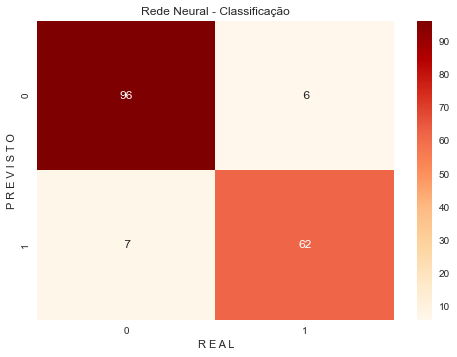

In [81]:
sns.heatmap(confusion_matrix(y_teste, previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Classificação')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Métricas

In [82]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,previsoes)
precisao = precision_score(y_teste,previsoes)
recall = recall_score(y_teste,previsoes)
f1Score = f1_score(y_teste,previsoes)
curva_roc = roc_auc_score(y_teste,previsoes)
kappa = cohen_kappa_score(y_teste,previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(curva_roc,2)}')

Acurácia:0.92
Precisão:0.91
Recall ou Sensibilidade:0.9
F1-Score:0.91
Kappa:0.84
Curva ROC:0.92


### Curva Roc

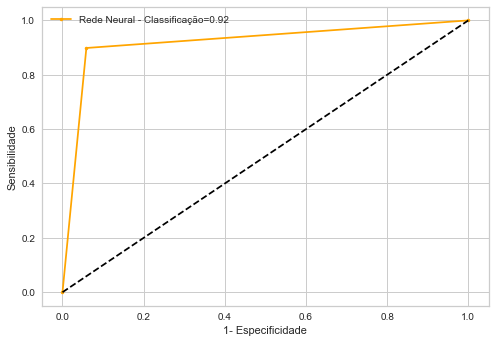

In [83]:
fp,vp,lim1 = roc_curve(y_teste,previsoes)
plt.plot(fp,vp, marker='.', label='Rede Neural - Classificação='+str(round(curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [16]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf 

* O learning rate (taxa de aprendizado) é um hiperparâmetro que determina o tamanho dos passos que o otimizador dá para atualizar os pesos da rede durante o processo de treinamento. É uma taxa que define quão rápido o modelo deve ajustar seus pesos com base no gradiente da função de perda. Um learning rate muito pequeno pode levar a treinamento lento e convergência prematura, enquanto um learning rate muito grande pode fazer com que o treinamento oscile ou não converge. O valor de learning_rate = 0.001 define uma taxa de aprendizado de 0.001, que é uma escolha comum para começar.

* decay = 0.0001:
O decay (decaimento) é outro hiperparâmetro do otimizador que controla a taxa na qual o learning rate diminui à medida que o treinamento progride. Essa técnica é comumente usada para diminuir gradualmente o learning rate, ajudando a melhorar a convergência do treinamento, especialmente em etapas posteriores do treinamento. O valor decay = 0.0001 define uma taxa de decaimento de 0.0001, que especifica o quanto o learning rate diminuirá a cada época (ou atualização de lote).

* clipvalue = 0.5:
O clipvalue é um parâmetro que controla a faixa em que os gradientes dos pesos são limitados durante o treinamento. Especificamente, ele limita o valor dos gradientes para estar dentro do intervalo [-clipvalue, clipvalue]. Essa técnica é conhecida como "clipping de gradientes" e pode ajudar a evitar problemas como o "vanishing gradient" ou "exploding gradient" durante o treinamento. O valor clipvalue = 0.5 define que os gradientes serão limitados no intervalo [-0.5, 0.5].

Note: "Vanishing gradient" (gradiente desaparecente) e "exploding gradient" (gradiente explosivo) são problemas que podem ocorrer durante o treinamento de redes neurais profundas. Eles estão relacionados ao comportamento dos gradientes das funções de ativação em relação aos parâmetros da rede e podem afetar a capacidade de uma rede neural aprender com eficácia. Vamos explorar cada um desses problemas:

    Vanishing Gradient (Gradiente Desaparecente):

    O problema do gradiente desaparecente ocorre quando os gradientes das funções de ativação se tornam muito pequenos à medida que são propagados para trás (retropropagados) através das camadas em uma rede neural profunda. Isso significa que os gradientes se aproximam de zero à medida que retrocedem para as camadas iniciais da rede.

    Causas:
        O uso de funções de ativação que têm derivadas pequenas na maioria dos seus domínios, como a função sigmoid.
        Redes neurais muito profundas, onde a multiplicação sucessiva de gradientes pode torná-los cada vez menores.

    Consequências:
        A rede não aprende bem as representações das camadas iniciais.
        O treinamento pode ser lento ou levar a resultados ruins.

    Soluções:
        Usar funções de ativação que não sofrem tanto com o problema do gradiente desaparecente, como a ReLU (Rectified Linear Unit).
        Inicialização adequada dos pesos da rede.
        Normalização de lotes (batch normalization).

    Exploding Gradient (Gradiente Explosivo):

    O problema do gradiente explosivo ocorre quando os gradientes das funções de ativação se tornam muito grandes à medida que são retropropagados através das camadas em uma rede neural profunda. Isso significa que os gradientes crescem exponencialmente à medida que retrocedem para as camadas iniciais da rede.

    Causas:
        Inicialização inadequada dos pesos da rede, onde os valores iniciais dos pesos são muito grandes.
        Funções de ativação que têm derivadas significativamente grandes em seus domínios, como a tangente hiperbólica (tanh).

    Consequências:
        Os gradientes grandes podem causar oscilações no treinamento e dificultar a convergência do modelo.
        Pode levar a resultados imprevisíveis ou divergentes.

    Soluções:
        Inicialização cuidadosa dos pesos, como a inicialização Xavier (Glorot) ou a inicialização He.
        Uso de funções de ativação que atenuam os gradientes, como a ReLU.
        Limitação dos gradientes usando técnicas como a "clipagem" (clipping) de gradientes.

Em resumo, o gradiente desaparecente e o gradiente explosivo são problemas que podem surgir durante o treinamento de redes neurais profundas devido ao comportamento dos gradientes das funções de ativação e à inicialização inadequada dos pesos. Solucionar esses problemas é essencial para treinar redes neurais profundas de forma eficaz e estável.

* https://keras.io/api/optimizers/
* https://keras.io/api/optimizers/adam/

In [17]:
#dropout: é uma técnica, para reduzir o super treinamento (overfitting), que controla a
#porcentagem de neurônios desativados aleatoriamente durante o treinamento.
#optimizers 
previsores = X
classe = y

def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 30))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    otimizador = tf.optimizers.Adam(learning_rate = 0.001, decay = 0.0001, clipvalue = 0.5)
    classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classificador

In [18]:
classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 100,
                                batch_size = 10)
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.7858 - binary_accuracy: 0.5234
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.6641
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5130 - binary_accuracy: 0.8223
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3962 - binary_accuracy: 0.8750
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3899 - binary_accuracy: 0.8711
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3682 - binary_accuracy: 0.8672
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3085 - binary_accuracy: 0.8984
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3214 - binary_accuracy: 0.8848
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3363 - binary_accuracy: 0.8828
Epoch 10/100
52/52 [==========================

52/52 [==============================] - 0s 2ms/step - loss: 0.2917 - binary_accuracy: 0.9141
Epoch 78/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3077 - binary_accuracy: 0.9238
Epoch 79/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3502 - binary_accuracy: 0.9023
Epoch 80/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3726 - binary_accuracy: 0.9082
Epoch 81/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2579 - binary_accuracy: 0.9277
Epoch 82/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3303 - binary_accuracy: 0.9121
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3260 - binary_accuracy: 0.9082
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2776 - binary_accuracy: 0.9258
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3221 - binary_accuracy: 0.9219
Epoch 86/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.2653 - binary_accuracy: 0.9082
Epoch 54/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2855 - binary_accuracy: 0.9180
Epoch 55/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2746 - binary_accuracy: 0.9082
Epoch 56/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2806 - binary_accuracy: 0.9121
Epoch 57/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2963 - binary_accuracy: 0.8965
Epoch 58/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2490 - binary_accuracy: 0.9160
Epoch 59/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2913 - binary_accuracy: 0.9102
Epoch 60/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2868 - binary_accuracy: 0.9082
Epoch 61/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3047 - binary_accuracy: 0.9004
Epoch 62/100
52/52 [==============================

52/52 [==============================] - 0s 3ms/step - loss: 0.3072 - binary_accuracy: 0.8965
Epoch 30/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2989 - binary_accuracy: 0.8887
Epoch 31/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3091 - binary_accuracy: 0.8984
Epoch 32/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2995 - binary_accuracy: 0.9023
Epoch 33/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2898 - binary_accuracy: 0.9043
Epoch 34/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3076 - binary_accuracy: 0.9199
Epoch 35/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2937 - binary_accuracy: 0.9004
Epoch 36/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3040 - binary_accuracy: 0.9082
Epoch 37/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3105 - binary_accuracy: 0.9004
Epoch 38/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.3170 - binary_accuracy: 0.8828
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 0.8828
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2906 - binary_accuracy: 0.8809
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3308 - binary_accuracy: 0.8730
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3346 - binary_accuracy: 0.8789
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3153 - binary_accuracy: 0.8750
Epoch 11/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 0.8828
Epoch 12/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2724 - binary_accuracy: 0.9062
Epoch 13/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2788 - binary_accuracy: 0.9004
Epoch 14/100
52/52 [==============================] - 

52/52 [==============================] - 0s 2ms/step - loss: 0.2692 - binary_accuracy: 0.9180
Epoch 82/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2670 - binary_accuracy: 0.9062
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3074 - binary_accuracy: 0.9180
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2656 - binary_accuracy: 0.9180
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2755 - binary_accuracy: 0.9180
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2998 - binary_accuracy: 0.9141
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3009 - binary_accuracy: 0.9238
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2916 - binary_accuracy: 0.9238
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2749 - binary_accuracy: 0.9180
Epoch 90/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.2757 - binary_accuracy: 0.9141
Epoch 58/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2628 - binary_accuracy: 0.9082
Epoch 59/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3131 - binary_accuracy: 0.9082
Epoch 60/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3218 - binary_accuracy: 0.9102
Epoch 61/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2828 - binary_accuracy: 0.9180
Epoch 62/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3328 - binary_accuracy: 0.9062
Epoch 63/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3438 - binary_accuracy: 0.8945
Epoch 64/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2570 - binary_accuracy: 0.9043
Epoch 65/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2957 - binary_accuracy: 0.9141
Epoch 66/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.2749 - binary_accuracy: 0.9004
Epoch 27/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2664 - binary_accuracy: 0.9160
Epoch 28/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2575 - binary_accuracy: 0.9102
Epoch 29/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2557 - binary_accuracy: 0.9160
Epoch 30/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3018 - binary_accuracy: 0.9004
Epoch 31/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3153 - binary_accuracy: 0.9043
Epoch 32/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2807 - binary_accuracy: 0.9043
Epoch 33/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2456 - binary_accuracy: 0.9180
Epoch 34/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2829 - binary_accuracy: 0.9062
Epoch 35/100
52/52 [==============================

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.7056 - binary_accuracy: 0.6016
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5684 - binary_accuracy: 0.7324
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4607 - binary_accuracy: 0.8164
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4246 - binary_accuracy: 0.8145
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3458 - binary_accuracy: 0.8535
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3361 - binary_accuracy: 0.8750
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3403 - binary_accuracy: 0.8730
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3456 - binary_accuracy: 0.8633
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2965 - binary_accuracy: 0.8828
Epoch 10/100
52/52 [==========================

52/52 [==============================] - 0s 2ms/step - loss: 0.3127 - binary_accuracy: 0.9043
Epoch 78/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3007 - binary_accuracy: 0.9121
Epoch 79/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2989 - binary_accuracy: 0.9102
Epoch 80/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2883 - binary_accuracy: 0.9102
Epoch 81/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2254 - binary_accuracy: 0.9180
Epoch 82/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2585 - binary_accuracy: 0.9102
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3040 - binary_accuracy: 0.9082
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2788 - binary_accuracy: 0.9199
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2480 - binary_accuracy: 0.9180
Epoch 86/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.3638 - binary_accuracy: 0.8828
Epoch 54/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2888 - binary_accuracy: 0.8848
Epoch 55/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3059 - binary_accuracy: 0.9004
Epoch 56/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2958 - binary_accuracy: 0.9160
Epoch 57/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2914 - binary_accuracy: 0.9043
Epoch 58/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2988 - binary_accuracy: 0.9004
Epoch 59/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3352 - binary_accuracy: 0.8906
Epoch 60/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2943 - binary_accuracy: 0.9082
Epoch 61/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2838 - binary_accuracy: 0.9062
Epoch 62/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.3137 - binary_accuracy: 0.8867
Epoch 30/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3540 - binary_accuracy: 0.8984
Epoch 31/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3082 - binary_accuracy: 0.8984
Epoch 32/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4003 - binary_accuracy: 0.8867
Epoch 33/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3478 - binary_accuracy: 0.9023
Epoch 34/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3939 - binary_accuracy: 0.8750
Epoch 35/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3396 - binary_accuracy: 0.8926
Epoch 36/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3329 - binary_accuracy: 0.8945
Epoch 37/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3165 - binary_accuracy: 0.8965
Epoch 38/100
52/52 [==============================

52/52 [==============================] - 0s 2ms/step - loss: 0.3721 - binary_accuracy: 0.8694
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3303 - binary_accuracy: 0.8772
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3370 - binary_accuracy: 0.8889
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2974 - binary_accuracy: 0.8889
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3042 - binary_accuracy: 0.8889
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3716 - binary_accuracy: 0.8616
Epoch 11/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3037 - binary_accuracy: 0.8850
Epoch 12/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3364 - binary_accuracy: 0.8791
Epoch 13/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3464 - binary_accuracy: 0.8674
Epoch 14/100
52/52 [==============================] - 

52/52 [==============================] - 0s 2ms/step - loss: 0.2636 - binary_accuracy: 0.9181
Epoch 82/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2835 - binary_accuracy: 0.9142
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2486 - binary_accuracy: 0.9103
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2839 - binary_accuracy: 0.9220
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2883 - binary_accuracy: 0.9064
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2528 - binary_accuracy: 0.9142
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2701 - binary_accuracy: 0.9006
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2383 - binary_accuracy: 0.9123
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2818 - binary_accuracy: 0.9045
Epoch 90/100
52/52 [==============================

In [20]:
print(media)
print(desvio)

0.9315162907268169
0.03175653461445817


### Tuning e Overfiting   -> não vou usar mais o GridSearchCV, vou usar o keras turner

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
#Mesma função com coisas a mais
def criarRede(optimizer, loos, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units = neurons, activation = activation, 
                        kernel_initializer = kernel_initializer, input_dim = 30))
    #Dropout utilizado para corrigir ou amanizar o overfiting
    #O ideal é utilizar entre 0.20 e 0.30
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = neurons, activation = activation, 
                        kernel_initializer = kernel_initializer))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    classificador.compile(optimizer = optimizer, loss = loos,
                      metrics = ['binary_accuracy'])
    return classificador

In [28]:
classificador = KerasClassifier(build_fn = criarRede, )
parametros = {'batch_size': [10, 32],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd'],
              'loos': ['binary_crossentropy', 'hinge'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh'],
              'neurons': [16, 8]}

In [31]:
grid_search = GridSearchCV(estimator = classificador,
                           param_grid = parametros,
                           scoring = 'accuracy',
                           cv = 5)

In [32]:
#Treinando com os parâmetros
model = grid_search.fit(X_treinamento,y_treinamento)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.9542 - binary_accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.7027 - binary_accuracy: 0.5440
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6475 - binary_accuracy: 0.7075
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.5834 - binary_accuracy: 0.7547
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5372 - binary_accuracy: 0.8019
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4854 - binary_accuracy: 0.8302
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4647 - binary_accuracy: 0.8176
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4496 - binary_accuracy: 0.8459
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3547 - binary_accuracy: 0.8899
Epoch 10/50
32/32 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 0.2194 - binary_accuracy: 0.9182
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2506 - binary_accuracy: 0.9025
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2615 - binary_accuracy: 0.9088
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2757 - binary_accuracy: 0.8931
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2529 - binary_accuracy: 0.8962
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2010 - binary_accuracy: 0.9277
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2170 - binary_accuracy: 0.9308
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2208 - binary_accuracy: 0.9057
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2063 - binary_accuracy: 0.9245
Epoch 37/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.4080 - binary_accuracy: 0.8401
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3578 - binary_accuracy: 0.8527
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3265 - binary_accuracy: 0.8966
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2911 - binary_accuracy: 0.8871
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3193 - binary_accuracy: 0.8871
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3688 - binary_accuracy: 0.8558
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3121 - binary_accuracy: 0.8871
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2857 - binary_accuracy: 0.8871
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2409 - binary_accuracy: 0.9060
Epoch 14/50
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 0.2713 - binary_accuracy: 0.8966
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2739 - binary_accuracy: 0.9028
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2679 - binary_accuracy: 0.8966
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2481 - binary_accuracy: 0.8997
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2899 - binary_accuracy: 0.8966
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2497 - binary_accuracy: 0.8934
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2523 - binary_accuracy: 0.8997
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2601 - binary_accuracy: 0.8966
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2469 - binary_accuracy: 0.9060
Epoch 41/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6289
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6289
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6289
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6321
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6321
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6569 - binary_accuracy: 0.6321
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.6113
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6113
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.6113
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6113
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6113
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.2896 - binary_accuracy: 0.9057
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2586 - binary_accuracy: 0.9182
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2789 - binary_accuracy: 0.9151
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2667 - binary_accuracy: 0.8931
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2725 - binary_accuracy: 0.9025
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2972 - binary_accuracy: 0.8931
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2913 - binary_accuracy: 0.8868
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3087 - binary_accuracy: 0.8836
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2932 - binary_accuracy: 0.8868
Epoch 49/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3330 - binary_accuracy: 0.8176
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3067 - binary_accuracy: 0.8711
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3313 - binary_accuracy: 0.8333
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3304 - binary_accuracy: 0.8333
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3122 - binary_accuracy: 0.8459
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3177 - binary_accuracy: 0.8302
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3164 - binary_accuracy: 0.8428
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3118 - binary_accuracy: 0.8616
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3448 - binary_accuracy: 0.8333
Epoch 26/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3237 - binary_accuracy: 0.8401
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3102 - binary_accuracy: 0.8339
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3129 - binary_accuracy: 0.8150
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2893 - binary_accuracy: 0.8339
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2881 - binary_accuracy: 0.8652
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2663 - binary_accuracy: 0.8558
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2961 - binary_accuracy: 0.8433
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.7543 - binary_accuracy: 0.5047
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - binary_accuracy: 0.6019
Epoch 3/50
32/32 [==============================] - 0s 2ms/s

32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6289
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.8891 - binary_accuracy: 0.6195
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6321
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6816 - binary_accuracy: 0.6321
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6321
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6751 - binary_accuracy: 0.6321
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 2ms/step 

32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6270
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6592 - binary_accuracy: 0.6270
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6270
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6270
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6270
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6270
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6270
Epoch 34/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0588 - binary_accuracy: 0.6415
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9697 - binary_accuracy: 0.7421
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9462 - binary_accuracy: 0.7579
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8764 - binary_accuracy: 0.8145
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8471 - binary_accuracy: 0.8365
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8058 - binary_accuracy: 0.8868
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8010 - binary_accuracy: 0.8616
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7722 - binary_accuracy: 0.8931
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7503 - binary_accuracy: 0.9119
Epoch 11/50
32/32 [==============================] - 0s 2ms/step 

32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 38/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.9997 - binary_accuracy: 0.6332
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9993 - binary_accuracy: 0.6426
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6301
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9786 - binary_accuracy: 0.6520
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9617 - binary_accuracy: 0.6740
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8551 - binary_accuracy: 0.7900
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7913 - binary_accuracy: 0.8683
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7871 - binary_accuracy: 0.8683
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7831 - binary_accuracy: 0.8715
Epoch 15/50
32/32 [==============================] - 0s 2ms/s

32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - binary_accuracy: 0.8903
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7233 - binary_accuracy: 0.8966
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7357 - binary_accuracy: 0.8777
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7275 - binary_accuracy: 0.8871
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7495 - binary_accuracy: 0.8683
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7121 - binary_accuracy: 0.9028
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7317 - binary_accuracy: 0.8840
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7479 - binary_accuracy: 0.8715
Epoch 41/50
32/32 [==============================] - 0s 3ms/step - loss: 0.7274 - binary_accuracy: 0.8903
Epoch 42/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.9960 - binary_accuracy: 0.6352
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6258
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6289
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9979 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0034 - binary_accuracy: 0.6258
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6321
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6321
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6321
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6321
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9996 - binary_accuracy: 0.6321
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9991 - binary_accuracy: 0.6352
Epoch 46/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6113
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6113
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.8030 - binary_accuracy: 0.8302
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7809 - binary_accuracy: 0.8585
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7947 - binary_accuracy: 0.8491
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8041 - binary_accuracy: 0.8365
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7998 - binary_accuracy: 0.8491
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8092 - binary_accuracy: 0.8302
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8005 - binary_accuracy: 0.8333
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7895 - binary_accuracy: 0.8491
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8126 - binary_accuracy: 0.8302
Epoch 50/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7911 - binary_accuracy: 0.8962
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8219 - binary_accuracy: 0.8868
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7906 - binary_accuracy: 0.8931
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8084 - binary_accuracy: 0.8742
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7897 - binary_accuracy: 0.8994
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8095 - binary_accuracy: 0.8742
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7992 - binary_accuracy: 0.8868
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.8836
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7796 - binary_accuracy: 0.9057
Epoch 27/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7883 - binary_accuracy: 0.8558
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7972 - binary_accuracy: 0.8464
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7749 - binary_accuracy: 0.8683
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7900 - binary_accuracy: 0.8464
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7754 - binary_accuracy: 0.8527
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7744 - binary_accuracy: 0.8558
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.0832 - binary_accuracy: 0.5329
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0471 - binary_accuracy: 0.6301
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0250 - binary_accuracy: 0.6677
Epoch 4/50
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 1.0130 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0185 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0371 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0212 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0195 - binary_accuracy: 0.6289
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6289
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0289 - binary_accuracy: 0.6289
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0250 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0230 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0419 - binary_accuracy: 0.6289
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0398 - binary_accuracy: 0.6289
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.0284 - binary_accuracy: 0.6258
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6352
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0123 - binary_accuracy: 0.6321
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9901 - binary_accuracy: 0.6415
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9993 - binary_accuracy: 0.6415
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0178 - binary_accuracy: 0.6195
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9978 - binary_accuracy: 0.6352
Epoch 8/50
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 2ms/step - loss: 1.0843 - binary_accuracy: 0.6771
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0604 - binary_accuracy: 0.6238
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0615 - binary_accuracy: 0.6489
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0583 - binary_accuracy: 0.6803
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0345 - binary_accuracy: 0.7147
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0594 - binary_accuracy: 0.6552
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0435 - binary_accuracy: 0.7147
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0264 - binary_accuracy: 0.7179
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0453 - binary_accuracy: 0.6897
Epoch 35/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6281 - binary_accuracy: 0.6635
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5910 - binary_accuracy: 0.6792
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5107 - binary_accuracy: 0.7453
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4845 - binary_accuracy: 0.7893
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4550 - binary_accuracy: 0.8208
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4259 - binary_accuracy: 0.8145
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4097 - binary_accuracy: 0.8396
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3850 - binary_accuracy: 0.8585
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3228 - binary_accuracy: 0.8836
Epoch 12/50
32/32 [==============================] - 0s 2ms/step

32/32 [==============================] - 0s 2ms/step - loss: 0.2651 - binary_accuracy: 0.9025
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2572 - binary_accuracy: 0.8994
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2614 - binary_accuracy: 0.9088
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2307 - binary_accuracy: 0.9214
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2118 - binary_accuracy: 0.9277
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2226 - binary_accuracy: 0.9151
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2307 - binary_accuracy: 0.9088
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2255 - binary_accuracy: 0.9088
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2115 - binary_accuracy: 0.9182
Epoch 39/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.5349 - binary_accuracy: 0.7335
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5014 - binary_accuracy: 0.7618
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5244 - binary_accuracy: 0.7461
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4971 - binary_accuracy: 0.7586
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4813 - binary_accuracy: 0.7492
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4433 - binary_accuracy: 0.8119
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4498 - binary_accuracy: 0.7868
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4298 - binary_accuracy: 0.8213
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4153 - binary_accuracy: 0.7806
Epoch 16/50
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: 0.2527 - binary_accuracy: 0.9091
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2308 - binary_accuracy: 0.8966
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2501 - binary_accuracy: 0.8966
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2570 - binary_accuracy: 0.8840
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2403 - binary_accuracy: 0.9091
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2363 - binary_accuracy: 0.9248
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2910 - binary_accuracy: 0.8934
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2506 - binary_accuracy: 0.8997
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2614 - binary_accuracy: 0.8997
Epoch 43/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6289
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6321
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6569 - binary_accuracy: 0.6321
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6321
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6321
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 47/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6113
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.6113
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.6113
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6113
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6113
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6113
Epoch 24/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3562 - binary_accuracy: 0.8616
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3591 - binary_accuracy: 0.8585
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3565 - binary_accuracy: 0.8396
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3391 - binary_accuracy: 0.8648
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3588 - binary_accuracy: 0.8553
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3344 - binary_accuracy: 0.8616
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3571 - binary_accuracy: 0.8491
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3649 - binary_accuracy: 0.8522
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3634 - binary_accuracy: 0.8522
Epoch 1/50
32/32 [==============================] - 1s 2ms

32/32 [==============================] - 0s 2ms/step - loss: 0.3881 - binary_accuracy: 0.7987
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3556 - binary_accuracy: 0.8113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3757 - binary_accuracy: 0.8459
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3856 - binary_accuracy: 0.8145
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3534 - binary_accuracy: 0.8491
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3570 - binary_accuracy: 0.8553
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3547 - binary_accuracy: 0.8270
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8239
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4265 - binary_accuracy: 0.7862
Epoch 28/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.2430 - binary_accuracy: 0.9185
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2293 - binary_accuracy: 0.8903
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2494 - binary_accuracy: 0.9028
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2429 - binary_accuracy: 0.9122
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2150 - binary_accuracy: 0.9216
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.2644 - binary_accuracy: 0.4420
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7492 - binary_accuracy: 0.4828
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6565 - binary_accuracy: 0.5831
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6418 - binary_accuracy: 0.6489
Epoch 5/50
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 3ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.7146 - binary_accuracy: 0.5975
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - binary_accuracy: 0.6321
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - binary_accuracy: 0.6321
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6782 - binary_accuracy: 0.6321
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6752 - binary_accuracy: 0.6321
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6728 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6710 - binary_accuracy: 0.6321
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6321
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6270
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6270
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6270
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 36/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.9972 - binary_accuracy: 0.6352
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6289
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6289
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6289
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6258
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6289
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6258
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6289
Epoch 40/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 17/50
32/32 [==============================] - 0s 2ms

32/32 [==============================] - 0s 2ms/step - loss: 0.9989 - binary_accuracy: 0.6113
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9978 - binary_accuracy: 0.6144
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6082
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6082
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9982 - binary_accuracy: 0.6144
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 44/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0134 - binary_accuracy: 0.6164
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9958 - binary_accuracy: 0.6352
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0012 - binary_accuracy: 0.6258
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6258
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6258
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 21/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.9963 - binary_accuracy: 0.6352
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6289
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9994 - binary_accuracy: 0.6352
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9998 - binary_accuracy: 0.6321
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6258
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0051 - binary_accuracy: 0.6258
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6289
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9992 - binary_accuracy: 0.6321
Epoch 48/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6113
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6113
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6113
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6113
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9999 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 25/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7867 - binary_accuracy: 0.8742
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7706 - binary_accuracy: 0.9088
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7780 - binary_accuracy: 0.8868
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7607 - binary_accuracy: 0.9119
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7622 - binary_accuracy: 0.9025
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7678 - binary_accuracy: 0.8994
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7583 - binary_accuracy: 0.9151
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7712 - binary_accuracy: 0.8899
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.0900 - binary_accuracy: 0.4025
Epoch 2/50
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6352
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9981 - binary_accuracy: 0.6321
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9936 - binary_accuracy: 0.6415
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0030 - binary_accuracy: 0.6321
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6352
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9961 - binary_accuracy: 0.6352
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9947 - binary_accuracy: 0.6384
Epoch 29/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7656 - binary_accuracy: 0.8652
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7598 - binary_accuracy: 0.8715
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7317 - binary_accuracy: 0.9091
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7343 - binary_accuracy: 0.9060
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.1059 - binary_accuracy: 0.5047
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0840 - binary_accuracy: 0.4859
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0798 - binary_accuracy: 0.4577
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0441 - binary_accuracy: 0.5674
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0467 - binary_accuracy: 0.5549
Epoch 6/50
32/32 [==============================] - 0s 2ms/step

32/32 [==============================] - 0s 2ms/step - loss: 0.9775 - binary_accuracy: 0.6730
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9674 - binary_accuracy: 0.7075
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9524 - binary_accuracy: 0.7296
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9413 - binary_accuracy: 0.7296
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9331 - binary_accuracy: 0.7453
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9076 - binary_accuracy: 0.7673
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1717 - binary_accuracy: 0.4748
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1879 - binary_accuracy: 0.4654
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9996 - binary_accuracy: 0.6855
Epoch 33/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 1s 1ms/step - loss: 1.0307 - binary_accuracy: 0.5912
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0250 - binary_accuracy: 0.6195
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0224 - binary_accuracy: 0.6384
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0224 - binary_accuracy: 0.6226
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0127 - binary_accuracy: 0.6321
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0351 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0346 - binary_accuracy: 0.6195
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0326 - binary_accuracy: 0.6415
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0276 - binary_accuracy: 0.6352
Epoch 10/50
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 2ms/step - loss: 1.0080 - binary_accuracy: 0.6113
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0102 - binary_accuracy: 0.6176
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0071 - binary_accuracy: 0.6238
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6238
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9930 - binary_accuracy: 0.6332
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0181 - binary_accuracy: 0.6113
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6238
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0051 - binary_accuracy: 0.6176
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9971 - binary_accuracy: 0.6332
Epoch 37/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.4411 - binary_accuracy: 0.8491
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4169 - binary_accuracy: 0.8522
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4091 - binary_accuracy: 0.8365
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3455 - binary_accuracy: 0.8994
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3188 - binary_accuracy: 0.8774
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3216 - binary_accuracy: 0.8899
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3082 - binary_accuracy: 0.8899
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3155 - binary_accuracy: 0.9088
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3042 - binary_accuracy: 0.8994
Epoch 14/100
32/32 [==============================] - 

32/32 [==============================] - 0s 2ms/step - loss: 0.2205 - binary_accuracy: 0.9308
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2181 - binary_accuracy: 0.9119
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2145 - binary_accuracy: 0.9245
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2195 - binary_accuracy: 0.9151
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2167 - binary_accuracy: 0.9182
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2081 - binary_accuracy: 0.9214
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2038 - binary_accuracy: 0.9308
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1925 - binary_accuracy: 0.9214
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1872 - binary_accuracy: 0.9403
Epoch 90/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2485 - binary_accuracy: 0.9057
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2102 - binary_accuracy: 0.9308
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2042 - binary_accuracy: 0.9277
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2495 - binary_accuracy: 0.9025
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2815 - binary_accuracy: 0.8931
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2384 - binary_accuracy: 0.9151
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2137 - binary_accuracy: 0.9245
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2139 - binary_accuracy: 0.9245
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2099 - binary_accuracy: 0.9308
Epoch 66/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2493 - binary_accuracy: 0.9119
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2611 - binary_accuracy: 0.8868
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2530 - binary_accuracy: 0.9088
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2585 - binary_accuracy: 0.8931
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2434 - binary_accuracy: 0.9025
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2423 - binary_accuracy: 0.9151
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2762 - binary_accuracy: 0.8962
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2392 - binary_accuracy: 0.9057
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2595 - binary_accuracy: 0.9214
Epoch 42/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2932 - binary_accuracy: 0.8966
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2866 - binary_accuracy: 0.9060
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3034 - binary_accuracy: 0.9122
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2963 - binary_accuracy: 0.8903
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2947 - binary_accuracy: 0.8997
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2689 - binary_accuracy: 0.8997
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2796 - binary_accuracy: 0.8934
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3075 - binary_accuracy: 0.8934
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2789 - binary_accuracy: 0.8871
Epoch 18/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.1903 - binary_accuracy: 0.9279
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2259 - binary_accuracy: 0.9091
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1680 - binary_accuracy: 0.9404
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2295 - binary_accuracy: 0.9060
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1895 - binary_accuracy: 0.9310
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2005 - binary_accuracy: 0.9248
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1790 - binary_accuracy: 0.9310
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1782 - binary_accuracy: 0.9342
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1678 - binary_accuracy: 0.9467
Epoch 94/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2261 - binary_accuracy: 0.9185
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2620 - binary_accuracy: 0.8997
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2571 - binary_accuracy: 0.8871
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2371 - binary_accuracy: 0.8966
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2166 - binary_accuracy: 0.9122
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2375 - binary_accuracy: 0.9122
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2136 - binary_accuracy: 0.9091
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2179 - binary_accuracy: 0.9342
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2048 - binary_accuracy: 0.9060
Epoch 70/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 46/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6289
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6289
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 22/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6289
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6289
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 98/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.4690 - binary_accuracy: 0.7925
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4571 - binary_accuracy: 0.7956
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4397 - binary_accuracy: 0.8208
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4296 - binary_accuracy: 0.8333
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4120 - binary_accuracy: 0.8333
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4421 - binary_accuracy: 0.8082
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4673 - binary_accuracy: 0.7987
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5014 - binary_accuracy: 0.7830
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4377 - binary_accuracy: 0.8270
Epoch 74/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6270
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6270
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6270
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6270
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6270
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6270
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6270
Epoch 50/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.6113
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6113
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6113
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6113
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6113
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6113
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6113
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6113
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 26/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7771 - binary_accuracy: 0.5818
Epoch 2/100
32/32 [==============================]

32/32 [==============================] - 0s 2ms/step - loss: 0.2446 - binary_accuracy: 0.9088
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2272 - binary_accuracy: 0.9245
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2408 - binary_accuracy: 0.9214
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2569 - binary_accuracy: 0.8994
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2529 - binary_accuracy: 0.9088
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2249 - binary_accuracy: 0.9182
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2241 - binary_accuracy: 0.9057
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2665 - binary_accuracy: 0.9119
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2081 - binary_accuracy: 0.9182
Epoch 78/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3879 - binary_accuracy: 0.8239
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4116 - binary_accuracy: 0.7956
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4017 - binary_accuracy: 0.8113
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3533 - binary_accuracy: 0.8428
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3891 - binary_accuracy: 0.8208
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3730 - binary_accuracy: 0.8176
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3580 - binary_accuracy: 0.8585
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3785 - binary_accuracy: 0.8365
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4097 - binary_accuracy: 0.8050
Epoch 54/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3377 - binary_accuracy: 0.8648
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3548 - binary_accuracy: 0.8522
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3394 - binary_accuracy: 0.8491
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3378 - binary_accuracy: 0.8616
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3725 - binary_accuracy: 0.8459
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3599 - binary_accuracy: 0.8711
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3579 - binary_accuracy: 0.8270
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3568 - binary_accuracy: 0.8491
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3186 - binary_accuracy: 0.8679
Epoch 30/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3135 - binary_accuracy: 0.8616
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3285 - binary_accuracy: 0.8553
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3067 - binary_accuracy: 0.8553
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2932 - binary_accuracy: 0.8711
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7740 - binary_accuracy: 0.4639
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.4828
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.5329
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.5956
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6228 - binary_accuracy: 0.6865
Epoch 6/100
32/32 [==============================] - 0

32/32 [==============================] - 0s 2ms/step - loss: 0.2257 - binary_accuracy: 0.8997
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2552 - binary_accuracy: 0.9028
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2309 - binary_accuracy: 0.9216
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2182 - binary_accuracy: 0.9342
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2145 - binary_accuracy: 0.9216
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1996 - binary_accuracy: 0.9310
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2246 - binary_accuracy: 0.9279
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2315 - binary_accuracy: 0.8997
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2069 - binary_accuracy: 0.9342
Epoch 82/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.4743 - binary_accuracy: 0.7868
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4737 - binary_accuracy: 0.7931
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4626 - binary_accuracy: 0.7962
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4522 - binary_accuracy: 0.8119
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4547 - binary_accuracy: 0.8119
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4790 - binary_accuracy: 0.7837
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4248 - binary_accuracy: 0.8276
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4680 - binary_accuracy: 0.7994
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4648 - binary_accuracy: 0.8056
Epoch 58/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6289
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6289
Epoch 34/100
32/32 [==============================

32/32 [==============================] - 1s 1ms/step - loss: 0.7068 - binary_accuracy: 0.6289
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6853 - binary_accuracy: 0.6289
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6815 - binary_accuracy: 0.6289
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6783 - binary_accuracy: 0.6289
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - binary_accuracy: 0.6289
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.6289
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.6289
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6289
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.6289
Epoch 10/100
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 86/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6321
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6321
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6321
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6321
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 62/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6270
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6270
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6270
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6270
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6270
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6270
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6270
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 38/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6113
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.6113
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.6113
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - binary_accuracy: 0.6113
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6749 - binary_accuracy: 0.6113
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.6113
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.6113
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 14/100
32/32 [==============================] - 

32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 90/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6258
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7471 - binary_accuracy: 0.8962
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7642 - binary_accuracy: 0.8774
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7475 - binary_accuracy: 0.8899
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7503 - binary_accuracy: 0.8899
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7619 - binary_accuracy: 0.8805
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7385 - binary_accuracy: 0.9057
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7614 - binary_accuracy: 0.8774
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.9025
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7155 - binary_accuracy: 0.9214
Epoch 42/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6321
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 18/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 94/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 70/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6113
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 46/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 22/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9984 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 98/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9964 - binary_accuracy: 0.6352
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0036 - binary_accuracy: 0.6226
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0034 - binary_accuracy: 0.6258
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0054 - binary_accuracy: 0.6289
Epoch 74/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6321
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6321
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9986 - binary_accuracy: 0.6321
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6352
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6352
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.6321
Epoch 50/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6270
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9986 - binary_accuracy: 0.6270
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6270
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0088 - binary_accuracy: 0.6270
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6270
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6301
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9960 - binary_accuracy: 0.6332
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0074 - binary_accuracy: 0.6270
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6238
Epoch 26/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0065 - binary_accuracy: 0.6207
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6238
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9941 - binary_accuracy: 0.6332
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6238
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6176
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6238
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6238
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6270
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0246 - binary_accuracy: 0.5925
Epoch 2/100
32/32 [==============================]

32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9997 - binary_accuracy: 0.6113
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9982 - binary_accuracy: 0.6144
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6113
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6113
Epoch 78/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7761 - binary_accuracy: 0.9088
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7452 - binary_accuracy: 0.9214
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7510 - binary_accuracy: 0.9119
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7648 - binary_accuracy: 0.9057
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7581 - binary_accuracy: 0.9119
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7664 - binary_accuracy: 0.9025
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7605 - binary_accuracy: 0.8994
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7722 - binary_accuracy: 0.8899
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7681 - binary_accuracy: 0.9025
Epoch 54/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6289
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0056 - binary_accuracy: 0.6289
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6289
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9986 - binary_accuracy: 0.6289
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0012 - binary_accuracy: 0.6289
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6289
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0397 - binary_accuracy: 0.6258
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0222 - binary_accuracy: 0.6195
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6384
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6321
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9981 - binary_accuracy: 0.6352
Epoch 6/100
32/32 [==============================] - 0

32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6321
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0036 - binary_accuracy: 0.6321
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6321
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6321
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6321
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6321
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6321
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9975 - binary_accuracy: 0.6321
Epoch 82/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8159 - binary_accuracy: 0.8213
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8339 - binary_accuracy: 0.7994
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7843 - binary_accuracy: 0.8495
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7820 - binary_accuracy: 0.8652
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7845 - binary_accuracy: 0.8495
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7876 - binary_accuracy: 0.8527
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7821 - binary_accuracy: 0.8495
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7676 - binary_accuracy: 0.8746
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7769 - binary_accuracy: 0.8621
Epoch 58/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7943 - binary_accuracy: 0.8840
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8058 - binary_accuracy: 0.8589
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7983 - binary_accuracy: 0.8621
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7854 - binary_accuracy: 0.8997
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7909 - binary_accuracy: 0.8746
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7879 - binary_accuracy: 0.8746
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7681 - binary_accuracy: 0.8903
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7929 - binary_accuracy: 0.8777
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7857 - binary_accuracy: 0.8840
Epoch 34/100
32/32 [==============================

32/32 [==============================] - 1s 2ms/step - loss: 1.1256 - binary_accuracy: 0.4088
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1108 - binary_accuracy: 0.4182
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1132 - binary_accuracy: 0.4623
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1059 - binary_accuracy: 0.4528
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1016 - binary_accuracy: 0.4843
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0818 - binary_accuracy: 0.5597
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0854 - binary_accuracy: 0.6321
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0691 - binary_accuracy: 0.6447
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0911 - binary_accuracy: 0.6164
Epoch 10/100
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 0.8578 - binary_accuracy: 0.7862
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8715 - binary_accuracy: 0.7736
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8513 - binary_accuracy: 0.7925
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8710 - binary_accuracy: 0.7736
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8392 - binary_accuracy: 0.8113
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8389 - binary_accuracy: 0.8113
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8586 - binary_accuracy: 0.7893
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8300 - binary_accuracy: 0.8145
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8693 - binary_accuracy: 0.7736
Epoch 86/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0356 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0401 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0258 - binary_accuracy: 0.6289
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0393 - binary_accuracy: 0.6289
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0349 - binary_accuracy: 0.6289
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0394 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0348 - binary_accuracy: 0.6289
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0384 - binary_accuracy: 0.6289
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0329 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0915 - binary_accuracy: 0.6321
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0907 - binary_accuracy: 0.6321
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0886 - binary_accuracy: 0.6321
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0874 - binary_accuracy: 0.6321
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0869 - binary_accuracy: 0.6321
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0862 - binary_accuracy: 0.6321
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0837 - binary_accuracy: 0.6321
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0826 - binary_accuracy: 0.6321
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0822 - binary_accuracy: 0.6321
Epoch 38/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.1031 - binary_accuracy: 0.6082
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1071 - binary_accuracy: 0.5987
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0930 - binary_accuracy: 0.6176
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0918 - binary_accuracy: 0.6270
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0726 - binary_accuracy: 0.6583
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0553 - binary_accuracy: 0.6959
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0693 - binary_accuracy: 0.6865
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0796 - binary_accuracy: 0.6614
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0490 - binary_accuracy: 0.7085
Epoch 14/100
32/32 [==============================] - 

32/32 [==============================] - 0s 2ms/step - loss: 0.8996 - binary_accuracy: 0.7774
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8742 - binary_accuracy: 0.8025
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8610 - binary_accuracy: 0.8119
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9079 - binary_accuracy: 0.7649
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8843 - binary_accuracy: 0.7837
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8807 - binary_accuracy: 0.7837
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8656 - binary_accuracy: 0.8025
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8948 - binary_accuracy: 0.7680
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9320 - binary_accuracy: 0.7241
Epoch 90/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6113
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6113
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9941 - binary_accuracy: 0.6082
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6113
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0042 - binary_accuracy: 0.6144
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0104 - binary_accuracy: 0.6113
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0089 - binary_accuracy: 0.6113
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0133 - binary_accuracy: 0.6144
Epoch 66/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2523 - binary_accuracy: 0.8994
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2559 - binary_accuracy: 0.9057
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2346 - binary_accuracy: 0.9371
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2352 - binary_accuracy: 0.9025
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2727 - binary_accuracy: 0.8931
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2458 - binary_accuracy: 0.9119
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2688 - binary_accuracy: 0.8742
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2413 - binary_accuracy: 0.9151
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2491 - binary_accuracy: 0.9151
Epoch 42/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2670 - binary_accuracy: 0.9119
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2669 - binary_accuracy: 0.8836
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3042 - binary_accuracy: 0.8742
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2686 - binary_accuracy: 0.8899
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2322 - binary_accuracy: 0.9214
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2819 - binary_accuracy: 0.9182
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2737 - binary_accuracy: 0.9057
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2564 - binary_accuracy: 0.8899
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2956 - binary_accuracy: 0.8994
Epoch 18/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.1682 - binary_accuracy: 0.9403
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1899 - binary_accuracy: 0.9214
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2393 - binary_accuracy: 0.9057
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1951 - binary_accuracy: 0.9245
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1729 - binary_accuracy: 0.9308
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2011 - binary_accuracy: 0.9182
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1888 - binary_accuracy: 0.9371
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1877 - binary_accuracy: 0.9371
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1854 - binary_accuracy: 0.9245
Epoch 94/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2582 - binary_accuracy: 0.8962
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2223 - binary_accuracy: 0.9245
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2250 - binary_accuracy: 0.8994
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2355 - binary_accuracy: 0.9245
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1863 - binary_accuracy: 0.9403
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2054 - binary_accuracy: 0.9182
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2184 - binary_accuracy: 0.9088
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2257 - binary_accuracy: 0.8962
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2201 - binary_accuracy: 0.9245
Epoch 70/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2772 - binary_accuracy: 0.8777
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2746 - binary_accuracy: 0.8840
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2704 - binary_accuracy: 0.9060
Epoch 40/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2387 - binary_accuracy: 0.9060
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2332 - binary_accuracy: 0.9028
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2509 - binary_accuracy: 0.8934
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2476 - binary_accuracy: 0.9028
Epoch 44/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2642 - binary_accuracy: 0.8903
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2120 - binary_accuracy: 0.9091
Epoch 46/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3101 - binary_accuracy: 0.8871
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3057 - binary_accuracy: 0.8871
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2828 - binary_accuracy: 0.8966
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2946 - binary_accuracy: 0.8934
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2762 - binary_accuracy: 0.8934
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2916 - binary_accuracy: 0.8746
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2786 - binary_accuracy: 0.8903
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3137 - binary_accuracy: 0.8934
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2978 - binary_accuracy: 0.8715
Epoch 22/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2224 - binary_accuracy: 0.9091
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1858 - binary_accuracy: 0.9185
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2082 - binary_accuracy: 0.9248
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1910 - binary_accuracy: 0.9248
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2050 - binary_accuracy: 0.9091
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2154 - binary_accuracy: 0.9185
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2031 - binary_accuracy: 0.9154
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2062 - binary_accuracy: 0.9185
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2131 - binary_accuracy: 0.9028
Epoch 98/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 74/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6321
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6321
Epoch 19/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6600 - binary_accuracy: 0.6321
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6321
Epoch 21/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6594 - binary_accuracy: 0.6321
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6592 - binary_accuracy: 0.6321
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 26/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6321
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6321
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6321
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6321
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.5694 - binary_accuracy: 0.5987
Epoch 2/100
32/32 [==============================]

32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6270
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6270
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6270
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6270
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6270
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6270
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6270
Epoch 78/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 54/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3553 - binary_accuracy: 0.8679
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3627 - binary_accuracy: 0.8742
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3484 - binary_accuracy: 0.8836
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3215 - binary_accuracy: 0.9025
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3580 - binary_accuracy: 0.8899
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3294 - binary_accuracy: 0.8962
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3355 - binary_accuracy: 0.8868
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3330 - binary_accuracy: 0.8711
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3236 - binary_accuracy: 0.8836
Epoch 30/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2241 - binary_accuracy: 0.9308
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2224 - binary_accuracy: 0.9119
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2597 - binary_accuracy: 0.9119
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2494 - binary_accuracy: 0.9151
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.9178 - binary_accuracy: 0.5063
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8700 - binary_accuracy: 0.5786
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - binary_accuracy: 0.6478
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6185 - binary_accuracy: 0.7421
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5682 - binary_accuracy: 0.7767
Epoch 6/100
32/32 [==============================] - 0

32/32 [==============================] - 0s 2ms/step - loss: 0.3524 - binary_accuracy: 0.8396
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3417 - binary_accuracy: 0.8522
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3383 - binary_accuracy: 0.8522
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3412 - binary_accuracy: 0.8365
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3080 - binary_accuracy: 0.8553
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3337 - binary_accuracy: 0.8585
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3513 - binary_accuracy: 0.8491
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3454 - binary_accuracy: 0.8553
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3451 - binary_accuracy: 0.8459
Epoch 82/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6321
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6321
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6321
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6321
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6321
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 58/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3308 - binary_accuracy: 0.8683
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3191 - binary_accuracy: 0.8715
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3390 - binary_accuracy: 0.8715
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2786 - binary_accuracy: 0.8903
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2802 - binary_accuracy: 0.8966
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2981 - binary_accuracy: 0.8558
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2851 - binary_accuracy: 0.8809
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3098 - binary_accuracy: 0.8652
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2922 - binary_accuracy: 0.8809
Epoch 34/100
32/32 [==============================

32/32 [==============================] - 1s 2ms/step - loss: 0.7038 - binary_accuracy: 0.5580
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5988 - binary_accuracy: 0.6740
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6064 - binary_accuracy: 0.6677
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5130 - binary_accuracy: 0.7837
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4934 - binary_accuracy: 0.7931
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4308 - binary_accuracy: 0.8150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4393 - binary_accuracy: 0.8339
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4382 - binary_accuracy: 0.8276
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3830 - binary_accuracy: 0.8527
Epoch 10/100
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 0.3226 - binary_accuracy: 0.8307
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3011 - binary_accuracy: 0.8495
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2659 - binary_accuracy: 0.8495
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2723 - binary_accuracy: 0.8683
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3074 - binary_accuracy: 0.8401
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3045 - binary_accuracy: 0.8527
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2953 - binary_accuracy: 0.8245
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2712 - binary_accuracy: 0.8652
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2846 - binary_accuracy: 0.8558
Epoch 86/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 38/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.6321
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6666 - binary_accuracy: 0.6321
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6321
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6321
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6321
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6321
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 14/100
32/32 [==============================] - 

32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6321
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.6321
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6321
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6321
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6321
Epoch 90/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6270
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6270
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6270
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6270
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6270
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6270
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6270
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 66/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6113
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 42/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6226
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6289
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6289
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6258
Epoch 18/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 70/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6321
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 46/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6301
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6270
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6270
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6270
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6301
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9988 - binary_accuracy: 0.6270
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6270
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6270
Epoch 22/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 98/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.9442 - binary_accuracy: 0.6708
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9549 - binary_accuracy: 0.6614
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9489 - binary_accuracy: 0.6677
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8480 - binary_accuracy: 0.7618
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7724 - binary_accuracy: 0.8621
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7406 - binary_accuracy: 0.8871
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7491 - binary_accuracy: 0.8746
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7471 - binary_accuracy: 0.8715
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7544 - binary_accuracy: 0.8746
Epoch 74/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6289
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 26/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6289
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6289
Epoch 2/100
32/32 [==============================]

32/32 [==============================] - 0s 2ms/step - loss: 0.9988 - binary_accuracy: 0.6321
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6321
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 78/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6270
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6270
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0063 - binary_accuracy: 0.6270
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6270
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6270
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6270
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9986 - binary_accuracy: 0.6270
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6270
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0091 - binary_accuracy: 0.6270
Epoch 54/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6113
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6113
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6113
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9996 - binary_accuracy: 0.6113
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6113
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9975 - binary_accuracy: 0.6144
Epoch 30/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6082
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6113
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6113
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6113
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0168 - binary_accuracy: 0.6164
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0100 - binary_accuracy: 0.6258
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0084 - binary_accuracy: 0.6258
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6384
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6258
Epoch 6/100
32/32 [==============================] - 0

32/32 [==============================] - 0s 2ms/step - loss: 0.7485 - binary_accuracy: 0.8899
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7608 - binary_accuracy: 0.8679
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.8836
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7383 - binary_accuracy: 0.8962
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.9088
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7395 - binary_accuracy: 0.8899
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7371 - binary_accuracy: 0.8962
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7442 - binary_accuracy: 0.8899
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7572 - binary_accuracy: 0.8805
Epoch 82/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6289
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6289
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9990 - binary_accuracy: 0.6289
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9976 - binary_accuracy: 0.6289
Epoch 58/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0159 - binary_accuracy: 0.6321
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0263 - binary_accuracy: 0.6321
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0109 - binary_accuracy: 0.6321
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0272 - binary_accuracy: 0.6321
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6321
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0174 - binary_accuracy: 0.6321
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0178 - binary_accuracy: 0.6321
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0139 - binary_accuracy: 0.6321
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0216 - binary_accuracy: 0.6321
Epoch 34/100
32/32 [==============================

32/32 [==============================] - 1s 2ms/step - loss: 1.1478 - binary_accuracy: 0.3793
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0807 - binary_accuracy: 0.5611
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0480 - binary_accuracy: 0.6614
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0284 - binary_accuracy: 0.7461
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0079 - binary_accuracy: 0.7806
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9902 - binary_accuracy: 0.8683
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9887 - binary_accuracy: 0.8307
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9683 - binary_accuracy: 0.8746
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9629 - binary_accuracy: 0.8715
Epoch 10/100
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 0.7374 - binary_accuracy: 0.9091
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7323 - binary_accuracy: 0.9248
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7381 - binary_accuracy: 0.9091
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7245 - binary_accuracy: 0.9248
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7332 - binary_accuracy: 0.9185
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.9154
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7832 - binary_accuracy: 0.8809
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7616 - binary_accuracy: 0.8966
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.9028
Epoch 86/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7201 - binary_accuracy: 0.8966
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7220 - binary_accuracy: 0.8934
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7123 - binary_accuracy: 0.9028
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7231 - binary_accuracy: 0.8871
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7224 - binary_accuracy: 0.8903
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.8683
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7130 - binary_accuracy: 0.9028
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7238 - binary_accuracy: 0.8840
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7264 - binary_accuracy: 0.8840
Epoch 62/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0164 - binary_accuracy: 0.6447
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0233 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0359 - binary_accuracy: 0.6384
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9883 - binary_accuracy: 0.6667
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6572
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0333 - binary_accuracy: 0.6478
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9948 - binary_accuracy: 0.6572
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0190 - binary_accuracy: 0.6447
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0167 - binary_accuracy: 0.6572
Epoch 38/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.9967 - binary_accuracy: 0.6289
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0069 - binary_accuracy: 0.6226
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9993 - binary_accuracy: 0.6321
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0036 - binary_accuracy: 0.6321
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6258
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9980 - binary_accuracy: 0.6321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6258
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6258
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 14/100
32/32 [==============================] - 

32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9954 - binary_accuracy: 0.6289
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6289
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6289
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6289
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6289
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0267 - binary_accuracy: 0.6321
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0419 - binary_accuracy: 0.6321
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0268 - binary_accuracy: 0.6321
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0368 - binary_accuracy: 0.6321
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0358 - binary_accuracy: 0.6321
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0412 - binary_accuracy: 0.6321
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0402 - binary_accuracy: 0.6321
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0305 - binary_accuracy: 0.6321
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0205 - binary_accuracy: 0.6321
Epoch 66/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6207
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0081 - binary_accuracy: 0.6176
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6301
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6270
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - binary_accuracy: 0.6176
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.5956
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0147 - binary_accuracy: 0.5956
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6238
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9971 - binary_accuracy: 0.6301
Epoch 42/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0321 - binary_accuracy: 0.6113
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0321 - binary_accuracy: 0.6113
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0018 - binary_accuracy: 0.6113
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0245 - binary_accuracy: 0.6113
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0363 - binary_accuracy: 0.6113
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0361 - binary_accuracy: 0.6113
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0121 - binary_accuracy: 0.6113
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0256 - binary_accuracy: 0.6113
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0181 - binary_accuracy: 0.6113
Epoch 18/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0131 - binary_accuracy: 0.6113
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0277 - binary_accuracy: 0.6113
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0260 - binary_accuracy: 0.6113
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0191 - binary_accuracy: 0.6113
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0196 - binary_accuracy: 0.6113
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0219 - binary_accuracy: 0.6113
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0180 - binary_accuracy: 0.6113
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0271 - binary_accuracy: 0.6113
Epoch 93/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0185 - binary_accuracy: 0.6113
Epoch 94/100
32/32 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3591 - binary_accuracy: 0.8585
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3753 - binary_accuracy: 0.8742
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3388 - binary_accuracy: 0.9025
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3183 - binary_accuracy: 0.9088
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3020 - binary_accuracy: 0.8836
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2888 - binary_accuracy: 0.9025
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3116 - binary_accuracy: 0.9057
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3137 - binary_accuracy: 0.8742
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2935 - binary_accuracy: 0.9119
Epoch 21/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.2461 - binary_accuracy: 0.9119
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2488 - binary_accuracy: 0.8994
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2472 - binary_accuracy: 0.9119
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2129 - binary_accuracy: 0.9151
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2384 - binary_accuracy: 0.9182
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2564 - binary_accuracy: 0.9057
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2430 - binary_accuracy: 0.9214
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2265 - binary_accuracy: 0.9182
Epoch 47/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2381 - binary_accuracy: 0.9119
Epoch 48/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.3662 - binary_accuracy: 0.8621
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3435 - binary_accuracy: 0.8652
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3345 - binary_accuracy: 0.8840
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3164 - binary_accuracy: 0.8746
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3499 - binary_accuracy: 0.8683
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3317 - binary_accuracy: 0.8840
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3267 - binary_accuracy: 0.9028
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3060 - binary_accuracy: 0.8777
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3005 - binary_accuracy: 0.9060
Epoch 25/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6289
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6289
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.7114 - binary_accuracy: 0.6101
Epoch 2/50
10/10 [==============================] - 0s 2ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.6321
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6321
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6667 - binary_accuracy: 0.6321
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6321
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6321
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6321
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6321
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6321
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6321
Epoch 29/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6270
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6270
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.5098 - binary_accuracy: 0.6082
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6908 - binary_accuracy: 0.6113
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6896 - binary_accuracy: 0.6113
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6885 - binary_accuracy: 0.6113
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6875 - binary_accuracy: 0.6113
Epoch 6/50
10/10 [==============================] - 0s 2ms/step

10/10 [==============================] - 0s 2ms/step - loss: 0.2927 - binary_accuracy: 0.8899
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2694 - binary_accuracy: 0.9025
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3102 - binary_accuracy: 0.8836
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2987 - binary_accuracy: 0.8994
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2838 - binary_accuracy: 0.8962
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2999 - binary_accuracy: 0.8742
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2733 - binary_accuracy: 0.9025
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2704 - binary_accuracy: 0.9025
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2568 - binary_accuracy: 0.8962
Epoch 33/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 1s 2ms/step - loss: 0.8002 - binary_accuracy: 0.6195
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6918
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6150 - binary_accuracy: 0.6918
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5748 - binary_accuracy: 0.7358
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5674 - binary_accuracy: 0.7044
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5498 - binary_accuracy: 0.7736
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4969 - binary_accuracy: 0.8428
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4435 - binary_accuracy: 0.8270
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3859 - binary_accuracy: 0.8711
Epoch 10/50
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 2ms/step - loss: 0.3434 - binary_accuracy: 0.9060
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3551 - binary_accuracy: 0.8777
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3356 - binary_accuracy: 0.8934
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3415 - binary_accuracy: 0.8934
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3089 - binary_accuracy: 0.9060
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3196 - binary_accuracy: 0.8840
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3303 - binary_accuracy: 0.9028
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3241 - binary_accuracy: 0.8966
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3149 - binary_accuracy: 0.9122
Epoch 37/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6867 - binary_accuracy: 0.6289
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6854 - binary_accuracy: 0.6289
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6841 - binary_accuracy: 0.6289
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6830 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6289
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6797 - binary_accuracy: 0.6289
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.6289
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6778 - binary_accuracy: 0.6289
Epoch 14/50
10/10 [==============================] - 0s 2ms/st

10/10 [==============================] - 0s 2ms/step - loss: 0.4991 - binary_accuracy: 0.7987
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5077 - binary_accuracy: 0.7610
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5235 - binary_accuracy: 0.7956
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5525 - binary_accuracy: 0.7579
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4972 - binary_accuracy: 0.7767
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4477 - binary_accuracy: 0.8333
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5295 - binary_accuracy: 0.7642
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4937 - binary_accuracy: 0.8050
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4713 - binary_accuracy: 0.8585
Epoch 41/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.6270
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6270
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6799 - binary_accuracy: 0.6270
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.6270
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6270
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6772 - binary_accuracy: 0.6270
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6764 - binary_accuracy: 0.6270
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6270
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6704 - binary_accuracy: 0.6113
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6113
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6113
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6113
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6706 - binary_accuracy: 0.6113
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6113
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6113
Epoch 45/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6226
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6321
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6258
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6289
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9983 - binary_accuracy: 0.6321
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6258
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6289
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6289
Epoch 22/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.7554 - binary_accuracy: 0.8868
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7768 - binary_accuracy: 0.8648
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7479 - binary_accuracy: 0.8994
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7640 - binary_accuracy: 0.8648
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7501 - binary_accuracy: 0.8994
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7478 - binary_accuracy: 0.8994
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7365 - binary_accuracy: 0.9151
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7350 - binary_accuracy: 0.9057
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7274 - binary_accuracy: 0.9214
Epoch 49/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6113
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0057 - binary_accuracy: 0.6113
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9996 - binary_accuracy: 0.6144
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9980 - binary_accuracy: 0.6176
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9976 - binary_accuracy: 0.6144
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9809 - binary_accuracy: 0.6301
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6113
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0023 - binary_accuracy: 0.6144
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9966 - binary_accuracy: 0.6176
Epoch 26/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0070 - binary_accuracy: 0.6226
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9952 - binary_accuracy: 0.6258
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0073 - binary_accuracy: 0.6164
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9917 - binary_accuracy: 0.6352
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0100 - binary_accuracy: 0.6132
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6226
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0086 - binary_accuracy: 0.6195
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1307 - binary_accuracy: 0.5126
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0189 - binary_accuracy: 0.6195
Epoch 3/50
10/10 [==============================] - 0s 2ms/s

10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6321
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6321
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6321
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6321
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0012 - binary_accuracy: 0.6321
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6321
Epoch 30/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.9959 - binary_accuracy: 0.6270
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9932 - binary_accuracy: 0.6332
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0077 - binary_accuracy: 0.6238
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1017 - binary_accuracy: 0.4890
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1204 - binary_accuracy: 0.3950
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0931 - binary_accuracy: 0.4702
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0683 - binary_accuracy: 0.5141
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1046 - binary_accuracy: 0.5862
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0754 - binary_accuracy: 0.5486
Epoch 7/50
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 0.7715 - binary_accuracy: 0.8836
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7533 - binary_accuracy: 0.8962
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7564 - binary_accuracy: 0.8962
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7658 - binary_accuracy: 0.8931
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7584 - binary_accuracy: 0.8931
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.8994
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7480 - binary_accuracy: 0.8994
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7576 - binary_accuracy: 0.8931
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7640 - binary_accuracy: 0.8868
Epoch 34/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.1135 - binary_accuracy: 0.4528
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0993 - binary_accuracy: 0.4717
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0838 - binary_accuracy: 0.6541
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0661 - binary_accuracy: 0.7358
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0378 - binary_accuracy: 0.7736
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0186 - binary_accuracy: 0.7233
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9592 - binary_accuracy: 0.8082
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9340 - binary_accuracy: 0.8050
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8909 - binary_accuracy: 0.8176
Epoch 11/50
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 0.8759 - binary_accuracy: 0.7618
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8442 - binary_accuracy: 0.8025
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8490 - binary_accuracy: 0.7931
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8484 - binary_accuracy: 0.7931
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8479 - binary_accuracy: 0.7900
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8411 - binary_accuracy: 0.7931
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8329 - binary_accuracy: 0.7931
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8313 - binary_accuracy: 0.7837
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8248 - binary_accuracy: 0.7868
Epoch 38/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6352
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0502 - binary_accuracy: 0.6226
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0343 - binary_accuracy: 0.6321
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0225 - binary_accuracy: 0.6415
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0292 - binary_accuracy: 0.6258
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0256 - binary_accuracy: 0.6132
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0237 - binary_accuracy: 0.6258
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0358 - binary_accuracy: 0.6289
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0278 - binary_accuracy: 0.6321
Epoch 15/50
10/10 [==============================] - 0s 2ms/s

10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6321
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6258
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9992 - binary_accuracy: 0.6289
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0167 - binary_accuracy: 0.6289
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9965 - binary_accuracy: 0.6321
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6289
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0070 - binary_accuracy: 0.6289
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0148 - binary_accuracy: 0.6289
Epoch 42/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0329 - binary_accuracy: 0.6270
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0441 - binary_accuracy: 0.6270
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0380 - binary_accuracy: 0.6270
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0366 - binary_accuracy: 0.6270
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0239 - binary_accuracy: 0.6270
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0435 - binary_accuracy: 0.6270
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0319 - binary_accuracy: 0.6270
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0278 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0192 - binary_accuracy: 0.6270
Epoch 19/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0338 - binary_accuracy: 0.5674
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0286 - binary_accuracy: 0.5925
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6082
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0074 - binary_accuracy: 0.5925
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0220 - binary_accuracy: 0.5831
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9860 - binary_accuracy: 0.6238
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0219 - binary_accuracy: 0.5737
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6019
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0150 - binary_accuracy: 0.5956
Epoch 46/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.3427 - binary_accuracy: 0.8553
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3326 - binary_accuracy: 0.8585
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3710 - binary_accuracy: 0.8553
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3324 - binary_accuracy: 0.8585
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3120 - binary_accuracy: 0.8679
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2967 - binary_accuracy: 0.8742
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3382 - binary_accuracy: 0.8679
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3006 - binary_accuracy: 0.8805
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3028 - binary_accuracy: 0.8836
Epoch 23/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.3068 - binary_accuracy: 0.8962
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3246 - binary_accuracy: 0.8805
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3184 - binary_accuracy: 0.8774
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2909 - binary_accuracy: 0.8994
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3314 - binary_accuracy: 0.8774
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2942 - binary_accuracy: 0.8994
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3134 - binary_accuracy: 0.8899
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3299 - binary_accuracy: 0.8679
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2962 - binary_accuracy: 0.8931
Epoch 50/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.3748 - binary_accuracy: 0.8558
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3273 - binary_accuracy: 0.8903
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3155 - binary_accuracy: 0.8652
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3350 - binary_accuracy: 0.8746
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3173 - binary_accuracy: 0.8903
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3232 - binary_accuracy: 0.8903
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2638 - binary_accuracy: 0.9154
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2849 - binary_accuracy: 0.8934
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3033 - binary_accuracy: 0.8903
Epoch 27/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6289
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6289
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 3.1333 - binary_accuracy: 0.6101
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6900 - binary_accuracy: 0.6289
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6879 - binary_accuracy: 0.6289
Epoch 4/50
10/10 [==============================] - 0s 2ms/st

10/10 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6321
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6321
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6321
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6321
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6321
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6321
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6321
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6321
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6321
Epoch 31/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6270
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6270
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 4.9813 - binary_accuracy: 0.5956
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6914 - binary_accuracy: 0.6113
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6902 - binary_accuracy: 0.6113
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.6113
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6882 - binary_accuracy: 0.6113
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6872 - binary_accuracy: 0.6113
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6863 - binary_accuracy: 0.6113
Epoch 8/50
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 2ms/step - loss: 0.3260 - binary_accuracy: 0.8679
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2699 - binary_accuracy: 0.9057
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2627 - binary_accuracy: 0.9151
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2698 - binary_accuracy: 0.8994
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2750 - binary_accuracy: 0.9025
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2988 - binary_accuracy: 0.8868
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2896 - binary_accuracy: 0.8899
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3059 - binary_accuracy: 0.8805
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2710 - binary_accuracy: 0.9119
Epoch 35/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6532 - binary_accuracy: 0.4969
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6468 - binary_accuracy: 0.6635
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6402 - binary_accuracy: 0.6352
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6222 - binary_accuracy: 0.6667
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6176 - binary_accuracy: 0.7390
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6039 - binary_accuracy: 0.7201
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5886 - binary_accuracy: 0.7484
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5823 - binary_accuracy: 0.7296
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5514 - binary_accuracy: 0.7799
Epoch 12/50
10/10 [==============================] - 0s 2ms/step

10/10 [==============================] - 0s 2ms/step - loss: 0.2799 - binary_accuracy: 0.8527
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3188 - binary_accuracy: 0.8276
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3021 - binary_accuracy: 0.8621
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2948 - binary_accuracy: 0.8589
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2796 - binary_accuracy: 0.8683
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2950 - binary_accuracy: 0.8370
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3180 - binary_accuracy: 0.8339
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3028 - binary_accuracy: 0.8715
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3274 - binary_accuracy: 0.7868
Epoch 39/50
10/10 [==============================] - 0s 3m

10/10 [==============================] - 0s 2ms/step - loss: 0.6838 - binary_accuracy: 0.6289
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6826 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6815 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6805 - binary_accuracy: 0.6289
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6795 - binary_accuracy: 0.6289
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6785 - binary_accuracy: 0.6289
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6776 - binary_accuracy: 0.6289
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6767 - binary_accuracy: 0.6289
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6289
Epoch 16/50
10/10 [==============================] - 0s 2ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6289
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6289
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6289
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 43/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6800 - binary_accuracy: 0.6270
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.6270
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6270
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6773 - binary_accuracy: 0.6270
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6765 - binary_accuracy: 0.6270
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6270
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6743 - binary_accuracy: 0.6270
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.6270
Epoch 20/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6113
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6113
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6113
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6113
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.6113
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6711 - binary_accuracy: 0.6113
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6710 - binary_accuracy: 0.6113
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6113
Epoch 47/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.9944 - binary_accuracy: 0.6352
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9932 - binary_accuracy: 0.6447
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9869 - binary_accuracy: 0.6478
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6321
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9895 - binary_accuracy: 0.6352
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9571 - binary_accuracy: 0.6730
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9896 - binary_accuracy: 0.6352
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9882 - binary_accuracy: 0.6447
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9610 - binary_accuracy: 0.6698
Epoch 24/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.7396 - binary_accuracy: 0.8994
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7454 - binary_accuracy: 0.8962
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7301 - binary_accuracy: 0.9119
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7360 - binary_accuracy: 0.9088
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7364 - binary_accuracy: 0.8994
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7371 - binary_accuracy: 0.8962
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7455 - binary_accuracy: 0.8962
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7404 - binary_accuracy: 0.9057
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.8931
Epoch 1/50
10/10 [==============================] - 1s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6113
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6050
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6113
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9918 - binary_accuracy: 0.6238
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6113
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6082
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9994 - binary_accuracy: 0.6144
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9979 - binary_accuracy: 0.6176
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6050
Epoch 28/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6478
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9878 - binary_accuracy: 0.6667
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9976 - binary_accuracy: 0.6667
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0433 - binary_accuracy: 0.6321
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0174 - binary_accuracy: 0.6509
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.0462 - binary_accuracy: 0.5943
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0220 - binary_accuracy: 0.6069
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0101 - binary_accuracy: 0.6226
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0257 - binary_accuracy: 0.6006
Epoch 5/50
10/10 [==============================] - 0s 2ms/ste

10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6289
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0071 - binary_accuracy: 0.6289
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6321
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6289
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6321
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9972 - binary_accuracy: 0.6352
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0023 - binary_accuracy: 0.6289
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 32/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.9974 - binary_accuracy: 0.6301
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1243 - binary_accuracy: 0.4828
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0101 - binary_accuracy: 0.6019
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0217 - binary_accuracy: 0.5956
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0153 - binary_accuracy: 0.6019
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0138 - binary_accuracy: 0.5925
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6050
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0072 - binary_accuracy: 0.6082
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6082
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.8143 - binary_accuracy: 0.8522
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8086 - binary_accuracy: 0.8648
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8153 - binary_accuracy: 0.8522
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8124 - binary_accuracy: 0.8648
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8104 - binary_accuracy: 0.8836
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7966 - binary_accuracy: 0.8742
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8035 - binary_accuracy: 0.8899
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7992 - binary_accuracy: 0.8868
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8009 - binary_accuracy: 0.8711
Epoch 36/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0796 - binary_accuracy: 0.5346
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0625 - binary_accuracy: 0.7484
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0532 - binary_accuracy: 0.7264
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0257 - binary_accuracy: 0.7044
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0065 - binary_accuracy: 0.7233
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.7296
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9557 - binary_accuracy: 0.7925
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9718 - binary_accuracy: 0.7484
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9306 - binary_accuracy: 0.7610
Epoch 13/50
10/10 [==============================] - 0s 2ms/ste

10/10 [==============================] - 0s 2ms/step - loss: 1.0117 - binary_accuracy: 0.6332
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0255 - binary_accuracy: 0.5956
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0151 - binary_accuracy: 0.6050
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0084 - binary_accuracy: 0.5956
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0249 - binary_accuracy: 0.6207
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0303 - binary_accuracy: 0.6301
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0137 - binary_accuracy: 0.6176
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0182 - binary_accuracy: 0.6301
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9931 - binary_accuracy: 0.6552
Epoch 40/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0152 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0120 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6258
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6321
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9913 - binary_accuracy: 0.6321
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0217 - binary_accuracy: 0.6258
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6289
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0104 - binary_accuracy: 0.6258
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0094 - binary_accuracy: 0.6289
Epoch 17/50
10/10 [==============================] - 0s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 1.0173 - binary_accuracy: 0.6384
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0090 - binary_accuracy: 0.6415
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1087 - binary_accuracy: 0.5503
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1021 - binary_accuracy: 0.5409
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6604
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9945 - binary_accuracy: 0.6667
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6509
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9866 - binary_accuracy: 0.6604
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6541
Epoch 44/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6270
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6270
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0118 - binary_accuracy: 0.6176
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6332
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6207
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0085 - binary_accuracy: 0.6238
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9998 - binary_accuracy: 0.6301
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9953 - binary_accuracy: 0.6270
Epoch 21/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.9995 - binary_accuracy: 0.6113
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6113
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6113
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6113
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9988 - binary_accuracy: 0.6113
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9992 - binary_accuracy: 0.6113
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9997 - binary_accuracy: 0.6113
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6113
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6113
Epoch 48/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.2440 - binary_accuracy: 0.9088
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2531 - binary_accuracy: 0.9182
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2212 - binary_accuracy: 0.9057
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2433 - binary_accuracy: 0.9151
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2428 - binary_accuracy: 0.9151
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2264 - binary_accuracy: 0.8868
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2214 - binary_accuracy: 0.9277
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2514 - binary_accuracy: 0.9119
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2306 - binary_accuracy: 0.9119
Epoch 74/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2396 - binary_accuracy: 0.9245
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2218 - binary_accuracy: 0.9277
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2526 - binary_accuracy: 0.9182
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2331 - binary_accuracy: 0.9340
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2246 - binary_accuracy: 0.9182
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2275 - binary_accuracy: 0.9214
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2282 - binary_accuracy: 0.9151
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2169 - binary_accuracy: 0.9151
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2542 - binary_accuracy: 0.9057
Epoch 50/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3187 - binary_accuracy: 0.8868
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3376 - binary_accuracy: 0.8868
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3397 - binary_accuracy: 0.8868
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2953 - binary_accuracy: 0.9088
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3410 - binary_accuracy: 0.8742
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2958 - binary_accuracy: 0.9025
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2886 - binary_accuracy: 0.8868
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3167 - binary_accuracy: 0.8962
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3287 - binary_accuracy: 0.9025
Epoch 26/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.1857 - binary_accuracy: 0.9308
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1914 - binary_accuracy: 0.9182
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2044 - binary_accuracy: 0.9214
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2206 - binary_accuracy: 0.9182
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1950 - binary_accuracy: 0.9308
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2062 - binary_accuracy: 0.9182
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1925 - binary_accuracy: 0.9277
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1965 - binary_accuracy: 0.9245
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.6895 - binary_accuracy: 0.5392
Epoch 2/100
10/10 [==============================]

10/10 [==============================] - 0s 2ms/step - loss: 0.2289 - binary_accuracy: 0.9091
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1958 - binary_accuracy: 0.9310
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2209 - binary_accuracy: 0.9154
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2244 - binary_accuracy: 0.9091
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2277 - binary_accuracy: 0.9122
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2144 - binary_accuracy: 0.9248
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2101 - binary_accuracy: 0.9279
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2104 - binary_accuracy: 0.9185
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2089 - binary_accuracy: 0.9185
Epoch 78/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2409 - binary_accuracy: 0.9122
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2393 - binary_accuracy: 0.9185
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2599 - binary_accuracy: 0.9028
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2456 - binary_accuracy: 0.9060
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2286 - binary_accuracy: 0.9060
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2512 - binary_accuracy: 0.9028
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2627 - binary_accuracy: 0.8966
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2288 - binary_accuracy: 0.9122
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2470 - binary_accuracy: 0.9122
Epoch 54/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6289
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.6289
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.6289
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.6289
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6289
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6289
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.6289
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6289
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6289
Epoch 30/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6289
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.9374 - binary_accuracy: 0.6132
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6912 - binary_accuracy: 0.6289
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6897 - binary_accuracy: 0.6289
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6882 - binary_accuracy: 0.6289
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6867 - binary_accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 0

10/10 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6289
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 82/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6592 - binary_accuracy: 0.6321
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6321
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6571 - binary_accuracy: 0.6321
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6321
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6571 - binary_accuracy: 0.6321
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 58/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6270
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6270
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6270
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6270
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6270
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6270
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6270
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6270
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6270
Epoch 34/100
10/10 [==============================

10/10 [==============================] - 1s 2ms/step - loss: 0.8439 - binary_accuracy: 0.5110
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6794 - binary_accuracy: 0.3887
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.4232
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6659 - binary_accuracy: 0.4389
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.4232
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.5172
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6659 - binary_accuracy: 0.4357
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6460 - binary_accuracy: 0.5392
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6562 - binary_accuracy: 0.5298
Epoch 10/100
10/10 [==============================] - 0s 2

10/10 [==============================] - 0s 2ms/step - loss: 0.3947 - binary_accuracy: 0.8527
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3695 - binary_accuracy: 0.8871
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4473 - binary_accuracy: 0.8213
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3811 - binary_accuracy: 0.8683
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3626 - binary_accuracy: 0.8871
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3914 - binary_accuracy: 0.8464
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3574 - binary_accuracy: 0.8903
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4242 - binary_accuracy: 0.8370
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3963 - binary_accuracy: 0.8527
Epoch 86/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2684 - binary_accuracy: 0.9025
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2621 - binary_accuracy: 0.9088
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2863 - binary_accuracy: 0.8679
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2618 - binary_accuracy: 0.8931
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2365 - binary_accuracy: 0.8962
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2675 - binary_accuracy: 0.8931
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2341 - binary_accuracy: 0.9214
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2514 - binary_accuracy: 0.8994
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2566 - binary_accuracy: 0.8899
Epoch 62/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3906 - binary_accuracy: 0.8931
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3632 - binary_accuracy: 0.9245
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3864 - binary_accuracy: 0.8836
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3914 - binary_accuracy: 0.8931
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3571 - binary_accuracy: 0.9151
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3650 - binary_accuracy: 0.9025
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3659 - binary_accuracy: 0.8931
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3470 - binary_accuracy: 0.8899
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3504 - binary_accuracy: 0.9057
Epoch 38/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6838 - binary_accuracy: 0.5220
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.4843
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.5000
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6535 - binary_accuracy: 0.5597
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6234 - binary_accuracy: 0.7075
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6127 - binary_accuracy: 0.7453
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5960 - binary_accuracy: 0.7201
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5426 - binary_accuracy: 0.8428
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4902 - binary_accuracy: 0.8648
Epoch 14/100
10/10 [==============================] - 

10/10 [==============================] - 0s 2ms/step - loss: 0.2718 - binary_accuracy: 0.8616
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2897 - binary_accuracy: 0.8459
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2594 - binary_accuracy: 0.8648
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2671 - binary_accuracy: 0.8491
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2449 - binary_accuracy: 0.8836
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2283 - binary_accuracy: 0.8711
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2636 - binary_accuracy: 0.8742
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2659 - binary_accuracy: 0.8428
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2523 - binary_accuracy: 0.8585
Epoch 90/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2535 - binary_accuracy: 0.9122
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2668 - binary_accuracy: 0.9091
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2841 - binary_accuracy: 0.8966
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2671 - binary_accuracy: 0.8871
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2652 - binary_accuracy: 0.9122
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2731 - binary_accuracy: 0.8966
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2520 - binary_accuracy: 0.9091
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2345 - binary_accuracy: 0.9248
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2456 - binary_accuracy: 0.9154
Epoch 66/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4300 - binary_accuracy: 0.8683
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4494 - binary_accuracy: 0.8276
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4416 - binary_accuracy: 0.8464
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4731 - binary_accuracy: 0.7994
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4477 - binary_accuracy: 0.8339
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4813 - binary_accuracy: 0.7994
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4378 - binary_accuracy: 0.8307
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4199 - binary_accuracy: 0.8464
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4275 - binary_accuracy: 0.8527
Epoch 42/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6766 - binary_accuracy: 0.6289
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6755 - binary_accuracy: 0.6289
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6745 - binary_accuracy: 0.6289
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.6289
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6321
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6640 - binary_accuracy: 0.6006
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6299 - binary_accuracy: 0.6761
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_accuracy: 0.6478
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6279 - binary_accuracy: 0.6981
Epoch 18/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4824 - binary_accuracy: 0.7736
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5031 - binary_accuracy: 0.7610
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4454 - binary_accuracy: 0.8050
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4400 - binary_accuracy: 0.8239
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4655 - binary_accuracy: 0.7956
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4806 - binary_accuracy: 0.7799
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5123 - binary_accuracy: 0.7579
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4628 - binary_accuracy: 0.7862
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4558 - binary_accuracy: 0.7987
Epoch 94/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6289
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6289
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6289
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 70/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6321
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6321
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6321
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6321
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6321
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6321
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6321
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6321
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6321
Epoch 46/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6745 - binary_accuracy: 0.6270
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6270
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.6270
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6270
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6270
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.6270
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6704 - binary_accuracy: 0.6270
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6270
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6270
Epoch 22/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6270
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6270
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6270
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6270
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6270
Epoch 98/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6113
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6113
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6113
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.6113
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6113
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6113
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6113
Epoch 74/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0012 - binary_accuracy: 0.6289
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6289
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7324 - binary_accuracy: 0.9182
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7361 - binary_accuracy: 0.9088
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.9057
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7331 - binary_accuracy: 0.9057
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.9088
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7328 - binary_accuracy: 0.9088
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7284 - binary_accuracy: 0.9088
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7246 - binary_accuracy: 0.9214
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7499 - binary_accuracy: 0.8931
Epoch 26/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7180 - binary_accuracy: 0.9088
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7031 - binary_accuracy: 0.9245
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7065 - binary_accuracy: 0.9245
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7164 - binary_accuracy: 0.9151
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7027 - binary_accuracy: 0.9277
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7057 - binary_accuracy: 0.9245
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7164 - binary_accuracy: 0.9119
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7069 - binary_accuracy: 0.9182
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.0863 - binary_accuracy: 0.6069
Epoch 2/100
10/10 [==============================]

10/10 [==============================] - 0s 2ms/step - loss: 0.7726 - binary_accuracy: 0.8711
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7656 - binary_accuracy: 0.8868
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7504 - binary_accuracy: 0.8899
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7619 - binary_accuracy: 0.8774
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7720 - binary_accuracy: 0.8742
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7601 - binary_accuracy: 0.8868
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7519 - binary_accuracy: 0.8931
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7536 - binary_accuracy: 0.8962
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7400 - binary_accuracy: 0.8994
Epoch 78/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7290 - binary_accuracy: 0.8997
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7348 - binary_accuracy: 0.8966
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7155 - binary_accuracy: 0.9216
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7288 - binary_accuracy: 0.9060
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7128 - binary_accuracy: 0.9279
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7162 - binary_accuracy: 0.9185
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7120 - binary_accuracy: 0.9216
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7427 - binary_accuracy: 0.8934
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7438 - binary_accuracy: 0.8871
Epoch 54/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7399 - binary_accuracy: 0.8871
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7247 - binary_accuracy: 0.9060
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7338 - binary_accuracy: 0.8997
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7438 - binary_accuracy: 0.8777
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7390 - binary_accuracy: 0.8934
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7198 - binary_accuracy: 0.9028
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7175 - binary_accuracy: 0.9028
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7224 - binary_accuracy: 0.8997
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7398 - binary_accuracy: 0.8840
Epoch 30/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7014 - binary_accuracy: 0.9091
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7144 - binary_accuracy: 0.8997
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7037 - binary_accuracy: 0.9122
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7325 - binary_accuracy: 0.8777
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.0175 - binary_accuracy: 0.6289
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6289
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 0

10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 82/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6289
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 58/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9998 - binary_accuracy: 0.6321
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6321
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6321
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 34/100
10/10 [==============================

10/10 [==============================] - 1s 2ms/step - loss: 1.0098 - binary_accuracy: 0.6270
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0133 - binary_accuracy: 0.6176
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6238
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6270
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0034 - binary_accuracy: 0.6270
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6270
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6270
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6270
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6270
Epoch 10/100
10/10 [==============================] - 0s 2

10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6270
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6270
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 86/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6113
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6113
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6113
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6113
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9983 - binary_accuracy: 0.6144
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6113
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9991 - binary_accuracy: 0.6113
Epoch 62/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0110 - binary_accuracy: 0.6289
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9963 - binary_accuracy: 0.6415
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9980 - binary_accuracy: 0.6352
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9951 - binary_accuracy: 0.6415
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6289
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9928 - binary_accuracy: 0.6352
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9928 - binary_accuracy: 0.6478
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6226
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9974 - binary_accuracy: 0.6258
Epoch 38/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.7516
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9761 - binary_accuracy: 0.7516
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9459 - binary_accuracy: 0.7830
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9133 - binary_accuracy: 0.7893
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9321 - binary_accuracy: 0.7956
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9279 - binary_accuracy: 0.7704
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9126 - binary_accuracy: 0.8050
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9237 - binary_accuracy: 0.8113
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8633 - binary_accuracy: 0.8459
Epoch 14/100
10/10 [==============================] - 

10/10 [==============================] - 0s 2ms/step - loss: 0.7899 - binary_accuracy: 0.8899
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7605 - binary_accuracy: 0.9214
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7467 - binary_accuracy: 0.9245
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7461 - binary_accuracy: 0.9151
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7565 - binary_accuracy: 0.9214
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7672 - binary_accuracy: 0.8994
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7648 - binary_accuracy: 0.9151
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7641 - binary_accuracy: 0.8994
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7672 - binary_accuracy: 0.8994
Epoch 90/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.8648
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7777 - binary_accuracy: 0.8333
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7748 - binary_accuracy: 0.8553
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7882 - binary_accuracy: 0.8239
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7672 - binary_accuracy: 0.8522
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7634 - binary_accuracy: 0.8491
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7802 - binary_accuracy: 0.8365
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7822 - binary_accuracy: 0.8270
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7750 - binary_accuracy: 0.8428
Epoch 66/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6270
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6270
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6270
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6270
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9988 - binary_accuracy: 0.6270
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9974 - binary_accuracy: 0.6270
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9986 - binary_accuracy: 0.6270
Epoch 42/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8604 - binary_accuracy: 0.8339
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8440 - binary_accuracy: 0.8245
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8664 - binary_accuracy: 0.8276
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8562 - binary_accuracy: 0.8150
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8277 - binary_accuracy: 0.8245
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8316 - binary_accuracy: 0.8370
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7985 - binary_accuracy: 0.8809
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7920 - binary_accuracy: 0.8527
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7858 - binary_accuracy: 0.8746
Epoch 18/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7309 - binary_accuracy: 0.8934
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7094 - binary_accuracy: 0.9091
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7268 - binary_accuracy: 0.8809
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7110 - binary_accuracy: 0.9060
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7163 - binary_accuracy: 0.9060
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7140 - binary_accuracy: 0.9028
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7217 - binary_accuracy: 0.8871
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7227 - binary_accuracy: 0.8934
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7262 - binary_accuracy: 0.8871
Epoch 94/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6258
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0034 - binary_accuracy: 0.6258
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0056 - binary_accuracy: 0.6226
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0094 - binary_accuracy: 0.6226
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6258
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9974 - binary_accuracy: 0.6289
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6352
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0141 - binary_accuracy: 0.6226
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0108 - binary_accuracy: 0.6289
Epoch 70/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0102 - binary_accuracy: 0.6447
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0336 - binary_accuracy: 0.6258
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0277 - binary_accuracy: 0.6289
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0576 - binary_accuracy: 0.6038
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0451 - binary_accuracy: 0.6509
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9904 - binary_accuracy: 0.6572
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0213 - binary_accuracy: 0.6447
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0444 - binary_accuracy: 0.6258
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0505 - binary_accuracy: 0.6415
Epoch 46/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0368 - binary_accuracy: 0.6258
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9961 - binary_accuracy: 0.6478
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0149 - binary_accuracy: 0.6415
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0153 - binary_accuracy: 0.6478
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0444 - binary_accuracy: 0.6289
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0213 - binary_accuracy: 0.6509
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0191 - binary_accuracy: 0.6195
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0361 - binary_accuracy: 0.6384
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0181 - binary_accuracy: 0.6635
Epoch 22/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8186 - binary_accuracy: 0.8491
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8871 - binary_accuracy: 0.7893
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8484 - binary_accuracy: 0.8082
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9012 - binary_accuracy: 0.7327
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8626 - binary_accuracy: 0.7925
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8882 - binary_accuracy: 0.7862
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8493 - binary_accuracy: 0.8145
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8684 - binary_accuracy: 0.7987
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8143 - binary_accuracy: 0.8396
Epoch 98/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9391 - binary_accuracy: 0.8401
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9770 - binary_accuracy: 0.7774
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9603 - binary_accuracy: 0.8088
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9534 - binary_accuracy: 0.8182
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9465 - binary_accuracy: 0.8245
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9970 - binary_accuracy: 0.7492
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9550 - binary_accuracy: 0.7994
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9717 - binary_accuracy: 0.7868
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9462 - binary_accuracy: 0.8182
Epoch 74/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9982 - binary_accuracy: 0.6144
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9988 - binary_accuracy: 0.6113
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6113
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9961 - binary_accuracy: 0.6144
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6113
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6113
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6113
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0088 - binary_accuracy: 0.6082
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6050
Epoch 50/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3221 - binary_accuracy: 0.8931
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3368 - binary_accuracy: 0.8836
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3094 - binary_accuracy: 0.8962
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3133 - binary_accuracy: 0.9088
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3062 - binary_accuracy: 0.8962
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3020 - binary_accuracy: 0.8994
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2724 - binary_accuracy: 0.9057
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2804 - binary_accuracy: 0.8994
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3171 - binary_accuracy: 0.9025
Epoch 26/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2256 - binary_accuracy: 0.9119
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1963 - binary_accuracy: 0.9245
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2137 - binary_accuracy: 0.9214
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - binary_accuracy: 0.9245
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2194 - binary_accuracy: 0.9182
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1926 - binary_accuracy: 0.9245
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1874 - binary_accuracy: 0.9245
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2127 - binary_accuracy: 0.9340
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.8862 - binary_accuracy: 0.4874
Epoch 2/100
10/10 [==============================]

10/10 [==============================] - 0s 2ms/step - loss: 0.2437 - binary_accuracy: 0.9214
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2155 - binary_accuracy: 0.9057
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2131 - binary_accuracy: 0.9371
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2093 - binary_accuracy: 0.9119
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2282 - binary_accuracy: 0.9340
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2148 - binary_accuracy: 0.9277
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2027 - binary_accuracy: 0.9245
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1967 - binary_accuracy: 0.9308
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2057 - binary_accuracy: 0.9277
Epoch 78/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2929 - binary_accuracy: 0.8962
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2707 - binary_accuracy: 0.8962
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2640 - binary_accuracy: 0.9057
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2736 - binary_accuracy: 0.9025
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2691 - binary_accuracy: 0.8994
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2754 - binary_accuracy: 0.9057
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2674 - binary_accuracy: 0.9088
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2561 - binary_accuracy: 0.9088
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2731 - binary_accuracy: 0.9088
Epoch 54/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3198 - binary_accuracy: 0.9122
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2947 - binary_accuracy: 0.8934
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3403 - binary_accuracy: 0.8683
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3388 - binary_accuracy: 0.8997
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3054 - binary_accuracy: 0.8840
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2617 - binary_accuracy: 0.9185
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - binary_accuracy: 0.8934
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3031 - binary_accuracy: 0.8809
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2879 - binary_accuracy: 0.9122
Epoch 30/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2272 - binary_accuracy: 0.9185
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2403 - binary_accuracy: 0.9185
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2006 - binary_accuracy: 0.9216
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2113 - binary_accuracy: 0.9122
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 4.7597 - binary_accuracy: 0.5455
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2666 - binary_accuracy: 0.3950
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6617 - binary_accuracy: 0.4075
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3787 - binary_accuracy: 0.4357
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0626 - binary_accuracy: 0.4263
Epoch 6/100
10/10 [==============================] - 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2935 - binary_accuracy: 0.8997
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3003 - binary_accuracy: 0.8840
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3065 - binary_accuracy: 0.8903
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3143 - binary_accuracy: 0.8809
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2664 - binary_accuracy: 0.9154
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2737 - binary_accuracy: 0.9154
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2785 - binary_accuracy: 0.8934
Epoch 80/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2621 - binary_accuracy: 0.9122
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2893 - binary_accuracy: 0.9060
Epoch 82/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6289
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6289
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6289
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6289
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 58/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - binary_accuracy: 0.6289
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 34/100
10/10 [==============================

10/10 [==============================] - 1s 2ms/step - loss: 1.6863 - binary_accuracy: 0.5786
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6895 - binary_accuracy: 0.6321
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6874 - binary_accuracy: 0.6321
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6853 - binary_accuracy: 0.6321
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6835 - binary_accuracy: 0.6321
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6819 - binary_accuracy: 0.6321
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6803 - binary_accuracy: 0.6321
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6792 - binary_accuracy: 0.6321
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6768 - binary_accuracy: 0.6321
Epoch 10/100
10/10 [==============================] - 0s 2

10/10 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6321
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6555 - binary_accuracy: 0.6321
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_accuracy: 0.6321
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6321
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6568 - binary_accuracy: 0.6321
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6321
Epoch 86/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6270
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6270
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6270
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6270
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6270
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6270
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6270
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6270
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6270
Epoch 62/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.6113
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6113
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6113
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6113
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6113
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6723 - binary_accuracy: 0.6113
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6710 - binary_accuracy: 0.6113
Epoch 38/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6371 - binary_accuracy: 0.7327
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5804 - binary_accuracy: 0.7390
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5579 - binary_accuracy: 0.7201
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5558 - binary_accuracy: 0.7358
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5385 - binary_accuracy: 0.7201
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5065 - binary_accuracy: 0.7642
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5356 - binary_accuracy: 0.7138
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5088 - binary_accuracy: 0.7862
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5130 - binary_accuracy: 0.8302
Epoch 14/100
10/10 [==============================] - 

10/10 [==============================] - 0s 2ms/step - loss: 0.2980 - binary_accuracy: 0.9088
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3107 - binary_accuracy: 0.9025
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2878 - binary_accuracy: 0.9119
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2777 - binary_accuracy: 0.9151
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2862 - binary_accuracy: 0.9119
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2867 - binary_accuracy: 0.8868
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2744 - binary_accuracy: 0.9025
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2776 - binary_accuracy: 0.9151
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2562 - binary_accuracy: 0.9057
Epoch 90/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2929 - binary_accuracy: 0.8742
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2789 - binary_accuracy: 0.8742
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2788 - binary_accuracy: 0.8679
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9057
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2693 - binary_accuracy: 0.9025
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2738 - binary_accuracy: 0.8899
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2725 - binary_accuracy: 0.8774
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2675 - binary_accuracy: 0.8836
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2867 - binary_accuracy: 0.8774
Epoch 66/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3196 - binary_accuracy: 0.8899
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3205 - binary_accuracy: 0.8774
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3257 - binary_accuracy: 0.8836
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2826 - binary_accuracy: 0.9277
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2932 - binary_accuracy: 0.8962
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3015 - binary_accuracy: 0.8962
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3326 - binary_accuracy: 0.8805
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2970 - binary_accuracy: 0.8899
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3231 - binary_accuracy: 0.8931
Epoch 42/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4965 - binary_accuracy: 0.8025
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4402 - binary_accuracy: 0.8621
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4894 - binary_accuracy: 0.7837
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4435 - binary_accuracy: 0.8464
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4174 - binary_accuracy: 0.8464
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4103 - binary_accuracy: 0.8527
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4419 - binary_accuracy: 0.8339
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4648 - binary_accuracy: 0.8370
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4034 - binary_accuracy: 0.8715
Epoch 18/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2695 - binary_accuracy: 0.8903
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2629 - binary_accuracy: 0.8997
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2608 - binary_accuracy: 0.9122
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2641 - binary_accuracy: 0.9122
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2742 - binary_accuracy: 0.8997
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2771 - binary_accuracy: 0.9028
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2710 - binary_accuracy: 0.8966
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2435 - binary_accuracy: 0.9185
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2801 - binary_accuracy: 0.8966
Epoch 94/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3245 - binary_accuracy: 0.8433
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2850 - binary_accuracy: 0.8621
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2914 - binary_accuracy: 0.8589
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2882 - binary_accuracy: 0.8433
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3086 - binary_accuracy: 0.8307
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2825 - binary_accuracy: 0.8746
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3069 - binary_accuracy: 0.8433
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2853 - binary_accuracy: 0.8621
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3039 - binary_accuracy: 0.8433
Epoch 70/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.5218 - binary_accuracy: 0.7830
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5522 - binary_accuracy: 0.7516
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5188 - binary_accuracy: 0.7925
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5161 - binary_accuracy: 0.7736
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5713 - binary_accuracy: 0.7358
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5146 - binary_accuracy: 0.7830
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5508 - binary_accuracy: 0.7516
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5568 - binary_accuracy: 0.7296
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6539 - binary_accuracy: 0.6384
Epoch 46/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6733 - binary_accuracy: 0.6289
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6289
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6728 - binary_accuracy: 0.6289
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6289
Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6706 - binary_accuracy: 0.6289
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6701 - binary_accuracy: 0.6289
Epoch 19/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6687 - binary_accuracy: 0.6289
Epoch 20/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6679 - binary_accuracy: 0.6289
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.6289
Epoch 22/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6289
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6551 - binary_accuracy: 0.6289
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6289
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6289
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6289
Epoch 98/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6321
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6321
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6321
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6321
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6321
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.6321
Epoch 74/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.5010 - binary_accuracy: 0.7900
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5144 - binary_accuracy: 0.7712
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4673 - binary_accuracy: 0.8245
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4739 - binary_accuracy: 0.8119
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4533 - binary_accuracy: 0.8464
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4686 - binary_accuracy: 0.8182
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4704 - binary_accuracy: 0.8182
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5101 - binary_accuracy: 0.7743
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4781 - binary_accuracy: 0.8088
Epoch 50/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6787 - binary_accuracy: 0.6113
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6782 - binary_accuracy: 0.6113
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6777 - binary_accuracy: 0.6113
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6771 - binary_accuracy: 0.6113
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6767 - binary_accuracy: 0.6113
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6761 - binary_accuracy: 0.6113
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6758 - binary_accuracy: 0.6113
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6754 - binary_accuracy: 0.6113
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6752 - binary_accuracy: 0.6113
Epoch 26/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6113
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6686 - binary_accuracy: 0.6113
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6113
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6685 - binary_accuracy: 0.6113
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.1870 - binary_accuracy: 0.4025
Epoch 2/100
10/10 [==============================]

10/10 [==============================] - 0s 2ms/step - loss: 0.7169 - binary_accuracy: 0.9151
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7232 - binary_accuracy: 0.9151
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7190 - binary_accuracy: 0.9182
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7198 - binary_accuracy: 0.9151
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7269 - binary_accuracy: 0.9025
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7329 - binary_accuracy: 0.8994
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7093 - binary_accuracy: 0.9277
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7283 - binary_accuracy: 0.9088
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7208 - binary_accuracy: 0.9151
Epoch 78/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9696 - binary_accuracy: 0.6667
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9629 - binary_accuracy: 0.6761
Epoch 47/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9451 - binary_accuracy: 0.6887
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9496 - binary_accuracy: 0.6792
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9698 - binary_accuracy: 0.6635
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9665 - binary_accuracy: 0.6667
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9480 - binary_accuracy: 0.6981
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9496 - binary_accuracy: 0.6950
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9605 - binary_accuracy: 0.6792
Epoch 54/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6321
Epoch 23/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0001 - binary_accuracy: 0.6321
Epoch 25/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0002 - binary_accuracy: 0.6321
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 27/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0003 - binary_accuracy: 0.6321
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 29/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 30/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6321
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.0149 - binary_accuracy: 0.6176
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0105 - binary_accuracy: 0.6270
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0007 - binary_accuracy: 0.6301
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0040 - binary_accuracy: 0.6270
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0015 - binary_accuracy: 0.6270
Epoch 6/100
10/10 [==============================] - 0

10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 76/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 77/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 78/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9999 - binary_accuracy: 0.6270
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6270
Epoch 82/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9535 - binary_accuracy: 0.6677
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9687 - binary_accuracy: 0.6489
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9516 - binary_accuracy: 0.6677
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9746 - binary_accuracy: 0.6426
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9897 - binary_accuracy: 0.6270
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9574 - binary_accuracy: 0.6614
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9496 - binary_accuracy: 0.6677
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9632 - binary_accuracy: 0.6552
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9549 - binary_accuracy: 0.6583
Epoch 58/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0018 - binary_accuracy: 0.6258
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9995 - binary_accuracy: 0.6321
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6258
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0097 - binary_accuracy: 0.6164
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0052 - binary_accuracy: 0.6226
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0058 - binary_accuracy: 0.6258
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9994 - binary_accuracy: 0.6321
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6226
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9996 - binary_accuracy: 0.6321
Epoch 34/100
10/10 [==============================

10/10 [==============================] - 1s 3ms/step - loss: 1.0208 - binary_accuracy: 0.6258
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0020 - binary_accuracy: 0.6352
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6321
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9985 - binary_accuracy: 0.6321
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.6258
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6258
Epoch 10/100
10/10 [==============================] - 0s 2

10/10 [==============================] - 0s 2ms/step - loss: 0.9999 - binary_accuracy: 0.6289
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9990 - binary_accuracy: 0.6289
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6289
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6289
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0018 - binary_accuracy: 0.6289
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6289
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 86/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6352
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1218 - binary_accuracy: 0.5094
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9158 - binary_accuracy: 0.7170
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9667 - binary_accuracy: 0.6572
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8838 - binary_accuracy: 0.7610
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9759 - binary_accuracy: 0.6730
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1876 - binary_accuracy: 0.4403
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9798 - binary_accuracy: 0.6604
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9845 - binary_accuracy: 0.6509
Epoch 62/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6270
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9995 - binary_accuracy: 0.6301
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6270
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6270
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6270
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6270
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0023 - binary_accuracy: 0.6238
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0023 - binary_accuracy: 0.6270
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6270
Epoch 38/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0737 - binary_accuracy: 0.5204
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0628 - binary_accuracy: 0.5549
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0714 - binary_accuracy: 0.5862
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0747 - binary_accuracy: 0.5643
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0505 - binary_accuracy: 0.6019
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0594 - binary_accuracy: 0.6332
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0376 - binary_accuracy: 0.6489
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0742 - binary_accuracy: 0.6364
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0743 - binary_accuracy: 0.6489
Epoch 14/100
10/10 [==============================] - 

10/10 [==============================] - 0s 2ms/step - loss: 0.8950 - binary_accuracy: 0.8307
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8868 - binary_accuracy: 0.8433
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8966 - binary_accuracy: 0.8245
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8951 - binary_accuracy: 0.8307
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8754 - binary_accuracy: 0.8433
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8967 - binary_accuracy: 0.8245
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8876 - binary_accuracy: 0.8307
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9502 - binary_accuracy: 0.7367
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9248 - binary_accuracy: 0.7837
Epoch 90/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7676 - binary_accuracy: 0.8868
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7438 - binary_accuracy: 0.9088
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7581 - binary_accuracy: 0.8836
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7484 - binary_accuracy: 0.9025
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7540 - binary_accuracy: 0.8868
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7504 - binary_accuracy: 0.8931
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7513 - binary_accuracy: 0.8962
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7473 - binary_accuracy: 0.8994
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7404 - binary_accuracy: 0.9025
Epoch 66/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6289
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6258
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6289
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9998 - binary_accuracy: 0.6321
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6258
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6258
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6289
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 42/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 1.0697 - binary_accuracy: 0.7453
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0506 - binary_accuracy: 0.7925
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0405 - binary_accuracy: 0.7925
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0235 - binary_accuracy: 0.7925
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0321 - binary_accuracy: 0.7453
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0133 - binary_accuracy: 0.8145
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.8082
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0100 - binary_accuracy: 0.7799
Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0032 - binary_accuracy: 0.7736
Epoch 18/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7786 - binary_accuracy: 0.8491
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7547 - binary_accuracy: 0.8742
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7700 - binary_accuracy: 0.8585
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7540 - binary_accuracy: 0.8742
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7649 - binary_accuracy: 0.8648
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7678 - binary_accuracy: 0.8648
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7757 - binary_accuracy: 0.8459
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7787 - binary_accuracy: 0.8396
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7711 - binary_accuracy: 0.8428
Epoch 94/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9938 - binary_accuracy: 0.6332
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0001 - binary_accuracy: 0.6270
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9991 - binary_accuracy: 0.6270
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6207
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9971 - binary_accuracy: 0.6301
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6270
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9963 - binary_accuracy: 0.6301
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6238
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6176
Epoch 70/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7627 - binary_accuracy: 0.8997
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7736 - binary_accuracy: 0.8809
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.8715
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7995 - binary_accuracy: 0.8746
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7937 - binary_accuracy: 0.8809
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7883 - binary_accuracy: 0.8652
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7767 - binary_accuracy: 0.8809
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7820 - binary_accuracy: 0.8621
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7833 - binary_accuracy: 0.8903
Epoch 46/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0075 - binary_accuracy: 0.6226
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9935 - binary_accuracy: 0.6415
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0109 - binary_accuracy: 0.6226
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9978 - binary_accuracy: 0.6352
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0054 - binary_accuracy: 0.6195
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0093 - binary_accuracy: 0.6164
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6258
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0085 - binary_accuracy: 0.6258
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 22/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0107 - binary_accuracy: 0.6289
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6352
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0173 - binary_accuracy: 0.6289
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6258
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6321
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0018 - binary_accuracy: 0.6384
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0036 - binary_accuracy: 0.6289
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9967 - binary_accuracy: 0.6447
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0222 - binary_accuracy: 0.6164
Epoch 98/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6289
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6289
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6258
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - binary_accuracy: 0.6289
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9985 - binary_accuracy: 0.6289
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6321
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0002 - binary_accuracy: 0.6887
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9772 - binary_accuracy: 0.7547
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9008 - binary_accuracy: 0.7987
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8742 - binary_accuracy: 0.8145
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9398 - binary_accuracy: 0.7704
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8468 - binary_accuracy: 0.8396
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0033 - binary_accuracy: 0.6698
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9341 - binary_accuracy: 0.7421
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8700 - binary_accuracy: 0.8176
Epoch 50/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0235 - binary_accuracy: 0.6019
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9835 - binary_accuracy: 0.6332
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0209 - binary_accuracy: 0.5956
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0224 - binary_accuracy: 0.6270
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0257 - binary_accuracy: 0.6176
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0300 - binary_accuracy: 0.6270
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0370 - binary_accuracy: 0.6207
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9943 - binary_accuracy: 0.6583
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0270 - binary_accuracy: 0.6019
Epoch 26/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6552
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9927 - binary_accuracy: 0.6646
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.6458
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9875 - binary_accuracy: 0.6677
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0117 - binary_accuracy: 0.6740
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9786 - binary_accuracy: 0.6834
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0086 - binary_accuracy: 0.6458
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6740
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.0296 - binary_accuracy: 0.6113
Epoch 2/100
10/10 [==============================]

10/10 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6082
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0083 - binary_accuracy: 0.6082
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6082
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0088 - binary_accuracy: 0.6050
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6113
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9944 - binary_accuracy: 0.6144
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9961 - binary_accuracy: 0.6144
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6113
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6050
Epoch 78/100
10/10 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3904 - binary_accuracy: 0.8365
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4226 - binary_accuracy: 0.8239
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3692 - binary_accuracy: 0.8553
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3574 - binary_accuracy: 0.8553
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3298 - binary_accuracy: 0.8616
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6352
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6171 - binary_accuracy: 0.6415
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5893 - binary_accuracy: 0.6792
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5131 - binary_accuracy: 0.8302
Epoch 5/50
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.3309 - binary_accuracy: 0.8585
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3142 - binary_accuracy: 0.9025
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2745 - binary_accuracy: 0.8899
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3451 - binary_accuracy: 0.8522
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3386 - binary_accuracy: 0.8553
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3343 - binary_accuracy: 0.8899
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3121 - binary_accuracy: 0.8679
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3215 - binary_accuracy: 0.8836
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3482 - binary_accuracy: 0.8711
Epoch 32/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.2511 - binary_accuracy: 0.9060
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6649 - binary_accuracy: 0.5987
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_accuracy: 0.6614
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5843 - binary_accuracy: 0.7398
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5330 - binary_accuracy: 0.8088
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5207 - binary_accuracy: 0.8370
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4611 - binary_accuracy: 0.7994
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4999 - binary_accuracy: 0.7962
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4516 - binary_accuracy: 0.7962
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6289
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6289
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6258
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6751 - binary_accuracy: 0.6226
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6321
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6321
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6635 - binary_accuracy: 0.6321
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6599 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6577 - binary_accuracy: 0.6321
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6646 - binary_accuracy: 0.6321
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6647 - binary_accuracy: 0.6321
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6321
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6321
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 13/50
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6270
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6270
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6270
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6270
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6270
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6270
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6270
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6270
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 40/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6289
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6289
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6550 - binary_accuracy: 0.6289
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6289
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6289
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6569 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms

32/32 [==============================] - 0s 2ms/step - loss: 0.3731 - binary_accuracy: 0.8616
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3773 - binary_accuracy: 0.8459
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3799 - binary_accuracy: 0.8491
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3909 - binary_accuracy: 0.8616
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3153 - binary_accuracy: 0.8585
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3789 - binary_accuracy: 0.8239
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4134 - binary_accuracy: 0.8459
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4300 - binary_accuracy: 0.7830
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3909 - binary_accuracy: 0.8553
Epoch 44/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6270
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6270
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6270
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6270
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6270
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6270
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6270
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6270
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6270
Epoch 21/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6113
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6113
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.6113
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6113
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6113
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6113
Epoch 48/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6289
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6321
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6558 - binary_accuracy: 0.6321
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6113
Epoch 2/50
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.6113
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6723 - binary_accuracy: 0.6113
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.6113
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6113
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6113
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.6113
Epoch 29/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7339 - binary_accuracy: 0.9025
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7362 - binary_accuracy: 0.8994
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.9057
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7437 - binary_accuracy: 0.8836
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.0935 - binary_accuracy: 0.5943
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0351 - binary_accuracy: 0.6289
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6289
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0057 - binary_accuracy: 0.6289
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 6/50
32/32 [==============================] - 0s 2ms/step

32/32 [==============================] - 0s 2ms/step - loss: 0.7416 - binary_accuracy: 0.9025
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7908 - binary_accuracy: 0.8491
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7637 - binary_accuracy: 0.8742
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7478 - binary_accuracy: 0.8962
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7867 - binary_accuracy: 0.8459
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7646 - binary_accuracy: 0.8711
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7459 - binary_accuracy: 0.8962
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7495 - binary_accuracy: 0.8868
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7439 - binary_accuracy: 0.8899
Epoch 33/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 1s 2ms/step - loss: 1.0639 - binary_accuracy: 0.6082
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0269 - binary_accuracy: 0.6113
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0120 - binary_accuracy: 0.6113
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0080 - binary_accuracy: 0.6113
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6113
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6113
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.6113
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0030 - binary_accuracy: 0.6113
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6113
Epoch 10/50
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 2ms/step - loss: 1.0068 - binary_accuracy: 0.6289
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - binary_accuracy: 0.6289
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0068 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6289
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0057 - binary_accuracy: 0.6289
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0079 - binary_accuracy: 0.6289
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0071 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6289
Epoch 37/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0324 - binary_accuracy: 0.6321
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0272 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0197 - binary_accuracy: 0.6321
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0204 - binary_accuracy: 0.6321
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0187 - binary_accuracy: 0.6321
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0188 - binary_accuracy: 0.6321
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0128 - binary_accuracy: 0.6321
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0179 - binary_accuracy: 0.6321
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0127 - binary_accuracy: 0.6321
Epoch 14/50
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 1.0074 - binary_accuracy: 0.6270
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0073 - binary_accuracy: 0.6270
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6270
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0058 - binary_accuracy: 0.6270
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6270
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0054 - binary_accuracy: 0.6270
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6270
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0052 - binary_accuracy: 0.6270
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6270
Epoch 41/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.8536 - binary_accuracy: 0.8742
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8723 - binary_accuracy: 0.8302
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8189 - binary_accuracy: 0.8774
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8062 - binary_accuracy: 0.8774
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8035 - binary_accuracy: 0.8805
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8087 - binary_accuracy: 0.8616
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7832 - binary_accuracy: 0.8868
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8116 - binary_accuracy: 0.8333
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7722 - binary_accuracy: 0.9057
Epoch 18/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7574 - binary_accuracy: 0.8994
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7306 - binary_accuracy: 0.9088
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7606 - binary_accuracy: 0.8774
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7631 - binary_accuracy: 0.8648
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7254 - binary_accuracy: 0.9057
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7221 - binary_accuracy: 0.9182
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7230 - binary_accuracy: 0.9151
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7442 - binary_accuracy: 0.8836
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7231 - binary_accuracy: 0.9088
Epoch 45/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0072 - binary_accuracy: 0.6270
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0087 - binary_accuracy: 0.6270
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6270
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0075 - binary_accuracy: 0.6270
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6270
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0065 - binary_accuracy: 0.6270
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6270
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6270
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6270
Epoch 22/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6113
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6113
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6113
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6113
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0008 - binary_accuracy: 0.6113
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0017 - binary_accuracy: 0.6113
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6113
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6113
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6113
Epoch 49/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0245 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0249 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0244 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0222 - binary_accuracy: 0.6289
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0222 - binary_accuracy: 0.6289
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0192 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0163 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0191 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0204 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0104 - binary_accuracy: 0.6321
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0123 - binary_accuracy: 0.6321
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6321
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0111 - binary_accuracy: 0.6321
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0094 - binary_accuracy: 0.6321
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0122 - binary_accuracy: 0.6321
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0095 - binary_accuracy: 0.6321
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.1314 - binary_accuracy: 0.4451
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1130 - binary_accuracy: 0.6082
Epoch 3/50
32/32 [==============================] - 0s 2ms/s

32/32 [==============================] - 0s 2ms/step - loss: 1.0210 - binary_accuracy: 0.6113
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0192 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0167 - binary_accuracy: 0.6113
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0149 - binary_accuracy: 0.6113
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6113
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6113
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0141 - binary_accuracy: 0.6113
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.6113
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - binary_accuracy: 0.6113
Epoch 30/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3362 - binary_accuracy: 0.8522
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3662 - binary_accuracy: 0.8585
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4125 - binary_accuracy: 0.8553
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6704 - binary_accuracy: 0.5849
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6114 - binary_accuracy: 0.6509
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6014 - binary_accuracy: 0.6604
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5809 - binary_accuracy: 0.6981
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5005 - binary_accuracy: 0.8491
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4670 - binary_accuracy: 0.8585
Epoch 7/50
32/32 [==============================] - 0s 2ms/step 

32/32 [==============================] - 0s 2ms/step - loss: 0.3449 - binary_accuracy: 0.8333
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3515 - binary_accuracy: 0.8459
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8491
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3344 - binary_accuracy: 0.8836
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3245 - binary_accuracy: 0.8931
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3286 - binary_accuracy: 0.9025
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3278 - binary_accuracy: 0.8899
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3379 - binary_accuracy: 0.8491
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2967 - binary_accuracy: 0.8868
Epoch 34/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.5607 - binary_accuracy: 0.7210
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4575 - binary_accuracy: 0.8683
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4180 - binary_accuracy: 0.8621
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3896 - binary_accuracy: 0.8495
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3689 - binary_accuracy: 0.8621
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3656 - binary_accuracy: 0.8464
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3816 - binary_accuracy: 0.8401
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3254 - binary_accuracy: 0.8809
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3586 - binary_accuracy: 0.8401
Epoch 11/50
32/32 [==============================] - 0s 2ms/step 

32/32 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6258
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6289
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6289
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 38/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6321
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6321
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6321
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6321
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6321
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6321
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6321
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6321
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 15/50
32/32 [==============================] - 0s 2ms/s

32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6270
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6301
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6238
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6238
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6301
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6270
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6270
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6207
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6748 - binary_accuracy: 0.6301
Epoch 42/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.5008 - binary_accuracy: 0.8270
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5202 - binary_accuracy: 0.7893
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4537 - binary_accuracy: 0.8082
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4090 - binary_accuracy: 0.8522
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4200 - binary_accuracy: 0.8333
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4147 - binary_accuracy: 0.8113
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4187 - binary_accuracy: 0.8459
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4302 - binary_accuracy: 0.8270
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3664 - binary_accuracy: 0.8428
Epoch 19/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3894 - binary_accuracy: 0.8585
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4698 - binary_accuracy: 0.8050
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3835 - binary_accuracy: 0.8553
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3958 - binary_accuracy: 0.8365
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5210 - binary_accuracy: 0.7799
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3625 - binary_accuracy: 0.8239
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3682 - binary_accuracy: 0.8522
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3391 - binary_accuracy: 0.8616
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3922 - binary_accuracy: 0.8082
Epoch 46/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6270
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6270
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6270
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6270
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6270
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6270
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6270
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6270
Epoch 23/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.3835 - binary_accuracy: 0.8589
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4145 - binary_accuracy: 0.8213
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3895 - binary_accuracy: 0.8464
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3747 - binary_accuracy: 0.8589
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3679 - binary_accuracy: 0.8621
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3971 - binary_accuracy: 0.8433
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3722 - binary_accuracy: 0.8652
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3848 - binary_accuracy: 0.8433
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3732 - binary_accuracy: 0.8621
Epoch 50/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6667 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 27/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6321
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6321
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6321
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6321
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6321
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6764 - binary_accuracy: 0.5987
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6270
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6731 - binary_accuracy: 0.6238
Epoch 4/50
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6113
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - binary_accuracy: 0.6050
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6113
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6113
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6113
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6113
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6113
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6113
Epoch 31/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7710 - binary_accuracy: 0.8553
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7465 - binary_accuracy: 0.8899
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.0958 - binary_accuracy: 0.5786
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0281 - binary_accuracy: 0.6289
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9964 - binary_accuracy: 0.6289
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9484 - binary_accuracy: 0.6792
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8881 - binary_accuracy: 0.8239
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8385 - binary_accuracy: 0.8522
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7958 - binary_accuracy: 0.8962
Epoch 8/50
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.9088
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7403 - binary_accuracy: 0.8962
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7379 - binary_accuracy: 0.8994
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8066 - binary_accuracy: 0.8208
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7486 - binary_accuracy: 0.8931
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7662 - binary_accuracy: 0.8931
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7819 - binary_accuracy: 0.8616
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7728 - binary_accuracy: 0.8711
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7623 - binary_accuracy: 0.8711
Epoch 35/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.9691 - binary_accuracy: 0.6458
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8940 - binary_accuracy: 0.8025
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8402 - binary_accuracy: 0.8715
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8616 - binary_accuracy: 0.8119
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7942 - binary_accuracy: 0.8903
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.8683
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7744 - binary_accuracy: 0.8777
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7893 - binary_accuracy: 0.8589
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7610 - binary_accuracy: 0.8777
Epoch 12/50
32/32 [==============================] - 0s 2ms/step

32/32 [==============================] - 0s 2ms/step - loss: 1.0069 - binary_accuracy: 0.6289
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0077 - binary_accuracy: 0.6289
Epoch 32/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6289
Epoch 33/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6289
Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0087 - binary_accuracy: 0.6289
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6289
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6289
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6289
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0074 - binary_accuracy: 0.6289
Epoch 39/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0295 - binary_accuracy: 0.6321
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0234 - binary_accuracy: 0.6321
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0210 - binary_accuracy: 0.6321
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0165 - binary_accuracy: 0.6321
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6321
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6321
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0148 - binary_accuracy: 0.6321
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0143 - binary_accuracy: 0.6321
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0099 - binary_accuracy: 0.6321
Epoch 16/50
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6270
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.6270
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6270
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6270
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0054 - binary_accuracy: 0.6270
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6270
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0033 - binary_accuracy: 0.6270
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6270
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0036 - binary_accuracy: 0.6270
Epoch 43/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0084 - binary_accuracy: 0.6289
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6289
Epoch 13/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6289
Epoch 14/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6289
Epoch 15/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6289
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6289
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6289
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6289
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.8651 - binary_accuracy: 0.7704
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8009 - binary_accuracy: 0.8428
Epoch 40/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7963 - binary_accuracy: 0.8396
Epoch 41/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8125 - binary_accuracy: 0.8239
Epoch 42/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9659 - binary_accuracy: 0.6667
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8033 - binary_accuracy: 0.8396
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7863 - binary_accuracy: 0.8491
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8179 - binary_accuracy: 0.8239
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8000 - binary_accuracy: 0.8396
Epoch 47/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.8588 - binary_accuracy: 0.8213
Epoch 16/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8425 - binary_accuracy: 0.8339
Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8375 - binary_accuracy: 0.8339
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8532 - binary_accuracy: 0.8088
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8524 - binary_accuracy: 0.8182
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8789 - binary_accuracy: 0.7837
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8517 - binary_accuracy: 0.8088
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8285 - binary_accuracy: 0.8213
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8281 - binary_accuracy: 0.8245
Epoch 24/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.7851 - binary_accuracy: 0.8401
Epoch 43/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7952 - binary_accuracy: 0.8245
Epoch 44/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7728 - binary_accuracy: 0.8527
Epoch 45/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7650 - binary_accuracy: 0.8621
Epoch 46/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7773 - binary_accuracy: 0.8433
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7852 - binary_accuracy: 0.8339
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7762 - binary_accuracy: 0.8464
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7758 - binary_accuracy: 0.8464
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8177 - binary_accuracy: 0.7994
Epoch 1/50
32/32 [==============================] - 1s 2ms

32/32 [==============================] - 0s 2ms/step - loss: 1.0344 - binary_accuracy: 0.6289
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0315 - binary_accuracy: 0.6289
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0270 - binary_accuracy: 0.6289
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0294 - binary_accuracy: 0.6289
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0303 - binary_accuracy: 0.6289
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0231 - binary_accuracy: 0.6289
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0313 - binary_accuracy: 0.6289
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0236 - binary_accuracy: 0.6289
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0281 - binary_accuracy: 0.6289
Epoch 28/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1.0081 - binary_accuracy: 0.6321
Epoch 47/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0102 - binary_accuracy: 0.6321
Epoch 48/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0083 - binary_accuracy: 0.6321
Epoch 49/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0087 - binary_accuracy: 0.6321
Epoch 50/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0056 - binary_accuracy: 0.6321
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 1.1241 - binary_accuracy: 0.5674
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1127 - binary_accuracy: 0.6332
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1003 - binary_accuracy: 0.6270
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0937 - binary_accuracy: 0.6270
Epoch 5/50
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6113
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0124 - binary_accuracy: 0.6113
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0148 - binary_accuracy: 0.6113
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0101 - binary_accuracy: 0.6113
Epoch 27/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0175 - binary_accuracy: 0.6113
Epoch 28/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0093 - binary_accuracy: 0.6113
Epoch 29/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0135 - binary_accuracy: 0.6113
Epoch 30/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0111 - binary_accuracy: 0.6113
Epoch 31/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0127 - binary_accuracy: 0.6113
Epoch 32/50
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 0.2652 - binary_accuracy: 0.9057
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2954 - binary_accuracy: 0.8899
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2831 - binary_accuracy: 0.8994
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2815 - binary_accuracy: 0.8931
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2980 - binary_accuracy: 0.8931
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3383 - binary_accuracy: 0.8742
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3103 - binary_accuracy: 0.8868
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2885 - binary_accuracy: 0.8994
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3163 - binary_accuracy: 0.8711
Epoch 59/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2821 - binary_accuracy: 0.8994
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3236 - binary_accuracy: 0.8805
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3422 - binary_accuracy: 0.8711
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3136 - binary_accuracy: 0.8616
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3036 - binary_accuracy: 0.8899
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3846 - binary_accuracy: 0.8679
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2846 - binary_accuracy: 0.8868
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3253 - binary_accuracy: 0.8585
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3152 - binary_accuracy: 0.8931
Epoch 35/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6106 - binary_accuracy: 0.6321
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5469 - binary_accuracy: 0.7704
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4866 - binary_accuracy: 0.8428
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4181 - binary_accuracy: 0.8774
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4293 - binary_accuracy: 0.8333
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4598 - binary_accuracy: 0.7893
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3791 - binary_accuracy: 0.8774
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3385 - binary_accuracy: 0.8711
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3631 - binary_accuracy: 0.8553
Epoch 11/100
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 2ms/step - loss: 0.2832 - binary_accuracy: 0.9025
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3068 - binary_accuracy: 0.8868
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2566 - binary_accuracy: 0.9214
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2943 - binary_accuracy: 0.8931
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3203 - binary_accuracy: 0.8931
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2576 - binary_accuracy: 0.9057
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3312 - binary_accuracy: 0.8742
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2773 - binary_accuracy: 0.8962
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3007 - binary_accuracy: 0.9025
Epoch 87/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2443 - binary_accuracy: 0.9091
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2587 - binary_accuracy: 0.8997
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2413 - binary_accuracy: 0.9216
Epoch 57/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2572 - binary_accuracy: 0.8903
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2477 - binary_accuracy: 0.9122
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2471 - binary_accuracy: 0.9091
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2303 - binary_accuracy: 0.9248
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2465 - binary_accuracy: 0.9028
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3026 - binary_accuracy: 0.8934
Epoch 63/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3198 - binary_accuracy: 0.8809
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3242 - binary_accuracy: 0.8777
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3575 - binary_accuracy: 0.8715
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3461 - binary_accuracy: 0.8558
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3198 - binary_accuracy: 0.8777
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2918 - binary_accuracy: 0.8840
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2992 - binary_accuracy: 0.8903
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2957 - binary_accuracy: 0.9122
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3326 - binary_accuracy: 0.8934
Epoch 39/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6578 - binary_accuracy: 0.6384
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6289
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6666 - binary_accuracy: 0.6289
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6289
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6289
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6226
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6258
Epoch 15/100
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6289
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6289
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6289
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6685 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================

32/32 [==============================] - 0s 1ms/step - loss: 0.6639 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6657 - binary_accuracy: 0.6289
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6666 - binary_accuracy: 0.6289
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6289
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6321
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6321
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6321
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6321
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_accuracy: 0.6321
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6321
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6321
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6321
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6686 - binary_accuracy: 0.6270
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6332
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6270
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - binary_accuracy: 0.6270
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6270
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6270
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6270
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6270
Epoch 19/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6270
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6270
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6270
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6238
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6270
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6238
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6270
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6270
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6270
Epoch 95/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6113
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6659 - binary_accuracy: 0.6113
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6717 - binary_accuracy: 0.6113
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6765 - binary_accuracy: 0.6082
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - binary_accuracy: 0.6113
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6113
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - binary_accuracy: 0.6113
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6665 - binary_accuracy: 0.5987
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6738 - binary_accuracy: 0.6113
Epoch 71/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3798 - binary_accuracy: 0.8459
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3736 - binary_accuracy: 0.8616
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3703 - binary_accuracy: 0.8648
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4158 - binary_accuracy: 0.8491
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3767 - binary_accuracy: 0.8396
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3914 - binary_accuracy: 0.8428
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3498 - binary_accuracy: 0.8711
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3963 - binary_accuracy: 0.8365
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3767 - binary_accuracy: 0.8774
Epoch 47/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2909 - binary_accuracy: 0.9088
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2737 - binary_accuracy: 0.8994
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3615 - binary_accuracy: 0.8553
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2827 - binary_accuracy: 0.8899
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3124 - binary_accuracy: 0.8742
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2581 - binary_accuracy: 0.9245
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2768 - binary_accuracy: 0.9057
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2594 - binary_accuracy: 0.9182
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2971 - binary_accuracy: 0.8742
Epoch 23/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.2103 - binary_accuracy: 0.9119
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2693 - binary_accuracy: 0.9025
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2417 - binary_accuracy: 0.9151
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2472 - binary_accuracy: 0.9025
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2648 - binary_accuracy: 0.8836
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2369 - binary_accuracy: 0.9088
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2733 - binary_accuracy: 0.9151
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2367 - binary_accuracy: 0.9308
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2364 - binary_accuracy: 0.9182
Epoch 99/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3746 - binary_accuracy: 0.8113
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3810 - binary_accuracy: 0.8553
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3671 - binary_accuracy: 0.8679
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3641 - binary_accuracy: 0.8553
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3734 - binary_accuracy: 0.8491
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3628 - binary_accuracy: 0.8396
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4024 - binary_accuracy: 0.7925
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3592 - binary_accuracy: 0.8491
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3738 - binary_accuracy: 0.8616
Epoch 75/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6270
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6270
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6270
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6270
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6656 - binary_accuracy: 0.6270
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6270
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6270
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6270
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 51/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3984 - binary_accuracy: 0.8276
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3860 - binary_accuracy: 0.8464
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4139 - binary_accuracy: 0.8245
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4032 - binary_accuracy: 0.8245
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4218 - binary_accuracy: 0.8433
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4028 - binary_accuracy: 0.8088
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3937 - binary_accuracy: 0.8307
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3953 - binary_accuracy: 0.8339
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4639 - binary_accuracy: 0.8276
Epoch 27/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3796 - binary_accuracy: 0.8370
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3891 - binary_accuracy: 0.8276
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3695 - binary_accuracy: 0.8558
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3554 - binary_accuracy: 0.8558
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3729 - binary_accuracy: 0.8401
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4308 - binary_accuracy: 0.8276
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4066 - binary_accuracy: 0.8339
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6875 - binary_accuracy: 0.5818
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6289
Epoch 3/100
32/32 [==============================] 

32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6289
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6289
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6289
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6289
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6289
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6289
Epoch 79/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6289
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6289
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6665 - binary_accuracy: 0.6289
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6321
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6572 - binary_accuracy: 0.6321
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6321
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6557 - binary_accuracy: 0.6321
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6321
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6321
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6321
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6560 - binary_accuracy: 0.6321
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6321
Epoch 31/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6321
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6321
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6713 - binary_accuracy: 0.6238
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6749 - binary_accuracy: 0.6270
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6270
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6270
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6270
Epoch 7/100
32/32 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6270
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6270
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6270
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6270
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6270
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6270
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6270
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6270
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6270
Epoch 83/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.6113
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - binary_accuracy: 0.6113
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6113
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6113
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6113
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6113
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6113
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6113
Epoch 59/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6289
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6289
Epoch 35/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.9187 - binary_accuracy: 0.8176
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8507 - binary_accuracy: 0.8522
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7768 - binary_accuracy: 0.9119
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7579 - binary_accuracy: 0.9057
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7623 - binary_accuracy: 0.9057
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7579 - binary_accuracy: 0.8931
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7899 - binary_accuracy: 0.8585
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7341 - binary_accuracy: 0.9119
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7439 - binary_accuracy: 0.9088
Epoch 11/100
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 2ms/step - loss: 0.7719 - binary_accuracy: 0.8648
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7405 - binary_accuracy: 0.8994
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7355 - binary_accuracy: 0.8899
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7288 - binary_accuracy: 0.8994
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7336 - binary_accuracy: 0.8931
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7173 - binary_accuracy: 0.9151
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7171 - binary_accuracy: 0.9119
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7130 - binary_accuracy: 0.9182
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7358 - binary_accuracy: 0.8931
Epoch 87/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7329 - binary_accuracy: 0.9057
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7470 - binary_accuracy: 0.8931
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8320 - binary_accuracy: 0.8019
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7482 - binary_accuracy: 0.8868
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7617 - binary_accuracy: 0.8774
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7383 - binary_accuracy: 0.8994
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8003 - binary_accuracy: 0.8365
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7373 - binary_accuracy: 0.8994
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7241 - binary_accuracy: 0.9151
Epoch 63/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7998 - binary_accuracy: 0.8464
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7776 - binary_accuracy: 0.8558
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7502 - binary_accuracy: 0.8746
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7247 - binary_accuracy: 0.9060
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7568 - binary_accuracy: 0.8777
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8139 - binary_accuracy: 0.8025
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7366 - binary_accuracy: 0.8934
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7553 - binary_accuracy: 0.8652
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7879 - binary_accuracy: 0.8307
Epoch 39/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7529 - binary_accuracy: 0.8997
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7435 - binary_accuracy: 0.8966
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7822 - binary_accuracy: 0.8495
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7587 - binary_accuracy: 0.8934
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8080 - binary_accuracy: 0.8401
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.8997
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7502 - binary_accuracy: 0.8903
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7310 - binary_accuracy: 0.9091
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7505 - binary_accuracy: 0.8683
Epoch 15/100
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.7435 - binary_accuracy: 0.8683
Epoch 83/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7232 - binary_accuracy: 0.8903
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7403 - binary_accuracy: 0.8746
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7042 - binary_accuracy: 0.9122
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7367 - binary_accuracy: 0.8840
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8111 - binary_accuracy: 0.7994
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8110 - binary_accuracy: 0.8056
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7415 - binary_accuracy: 0.8746
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7252 - binary_accuracy: 0.8840
Epoch 91/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6289
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6289
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6289
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.6289
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6289
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.6289
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0023 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0090 - binary_accuracy: 0.6289
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0072 - binary_accuracy: 0.6289
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6289
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6289
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6289
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6289
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6289
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.6289
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0052 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0193 - binary_accuracy: 0.6321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0194 - binary_accuracy: 0.6321
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0159 - binary_accuracy: 0.6321
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0117 - binary_accuracy: 0.6321
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6321
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.6321
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6321
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0109 - binary_accuracy: 0.6321
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0118 - binary_accuracy: 0.6321
Epoch 19/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6321
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6321
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6321
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6321
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6321
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6321
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6321
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6321
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6321
Epoch 95/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.6270
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6270
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6270
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0044 - binary_accuracy: 0.6270
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.6270
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6270
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6270
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6270
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.6270
Epoch 71/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - binary_accuracy: 0.6113
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6113
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0051 - binary_accuracy: 0.6113
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0041 - binary_accuracy: 0.6113
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6113
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.6113
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.6113
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6113
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0074 - binary_accuracy: 0.6113
Epoch 47/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8623 - binary_accuracy: 0.8396
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8565 - binary_accuracy: 0.8428
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8234 - binary_accuracy: 0.8616
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8310 - binary_accuracy: 0.8522
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8242 - binary_accuracy: 0.8522
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8432 - binary_accuracy: 0.8333
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8207 - binary_accuracy: 0.8491
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8631 - binary_accuracy: 0.7987
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8113 - binary_accuracy: 0.8522
Epoch 23/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7913 - binary_accuracy: 0.8396
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7809 - binary_accuracy: 0.8491
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8133 - binary_accuracy: 0.8208
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7851 - binary_accuracy: 0.8459
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7603 - binary_accuracy: 0.8679
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7725 - binary_accuracy: 0.8585
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7725 - binary_accuracy: 0.8585
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8042 - binary_accuracy: 0.8239
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7858 - binary_accuracy: 0.8459
Epoch 99/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6289
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6289
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6289
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6289
Epoch 75/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7562 - binary_accuracy: 0.8962
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.8899
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7952 - binary_accuracy: 0.8491
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7375 - binary_accuracy: 0.9119
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7316 - binary_accuracy: 0.9088
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7448 - binary_accuracy: 0.8931
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7266 - binary_accuracy: 0.9119
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7321 - binary_accuracy: 0.9119
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7268 - binary_accuracy: 0.9119
Epoch 51/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8167 - binary_accuracy: 0.8527
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8235 - binary_accuracy: 0.8401
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8055 - binary_accuracy: 0.8495
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8002 - binary_accuracy: 0.8558
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9565 - binary_accuracy: 0.6771
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1941 - binary_accuracy: 0.4295
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1591 - binary_accuracy: 0.4483
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1013 - binary_accuracy: 0.5266
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0268 - binary_accuracy: 0.6144
Epoch 27/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8943 - binary_accuracy: 0.7304
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8878 - binary_accuracy: 0.7461
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8258 - binary_accuracy: 0.8150
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7927 - binary_accuracy: 0.8589
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7935 - binary_accuracy: 0.8495
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8224 - binary_accuracy: 0.8150
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8142 - binary_accuracy: 0.8182
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0800 - binary_accuracy: 0.6113
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0545 - binary_accuracy: 0.6113
Epoch 3/100
32/32 [==============================] 

32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6113
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6113
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6113
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6113
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6113
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6113
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6113
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6113
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6113
Epoch 79/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0187 - binary_accuracy: 0.6289
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0205 - binary_accuracy: 0.6289
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0155 - binary_accuracy: 0.6289
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0162 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0152 - binary_accuracy: 0.6289
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6289
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0185 - binary_accuracy: 0.6289
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0201 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0223 - binary_accuracy: 0.6289
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0309 - binary_accuracy: 0.6289
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0281 - binary_accuracy: 0.6289
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0257 - binary_accuracy: 0.6289
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0239 - binary_accuracy: 0.6289
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6289
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0194 - binary_accuracy: 0.6289
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0249 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0173 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0068 - binary_accuracy: 0.6289
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6289
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0065 - binary_accuracy: 0.6289
Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.1224 - binary_accuracy: 0.6069
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1078 - binary_accuracy: 0.6321
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0925 - binary_accuracy: 0.6321
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0746 - binary_accuracy: 0.6321
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0710 - binary_accuracy: 0.6321
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0583 - binary_accuracy: 0.6321
Epoch 7/100
32/32 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 1.0076 - binary_accuracy: 0.6321
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0104 - binary_accuracy: 0.6321
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6321
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6321
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0051 - binary_accuracy: 0.6321
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6321
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0067 - binary_accuracy: 0.6321
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6321
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0080 - binary_accuracy: 0.6321
Epoch 83/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0149 - binary_accuracy: 0.6270
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0095 - binary_accuracy: 0.6270
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0150 - binary_accuracy: 0.6270
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0115 - binary_accuracy: 0.6270
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0113 - binary_accuracy: 0.6270
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0097 - binary_accuracy: 0.6270
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0096 - binary_accuracy: 0.6270
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6270
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0126 - binary_accuracy: 0.6270
Epoch 59/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0154 - binary_accuracy: 0.6113
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0147 - binary_accuracy: 0.6113
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0157 - binary_accuracy: 0.6113
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0148 - binary_accuracy: 0.6113
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0131 - binary_accuracy: 0.6113
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6113
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0124 - binary_accuracy: 0.6113
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0093 - binary_accuracy: 0.6113
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0137 - binary_accuracy: 0.6113
Epoch 35/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.6195
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6289
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6289
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6289
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6164
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6289
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6289
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6289
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 11/100
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6289
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6289
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6289
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6685 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3146 - binary_accuracy: 0.8962
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3156 - binary_accuracy: 0.8899
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2710 - binary_accuracy: 0.9088
Epoch 57/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3263 - binary_accuracy: 0.8648
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3287 - binary_accuracy: 0.8679
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2988 - binary_accuracy: 0.8868
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2736 - binary_accuracy: 0.8994
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3156 - binary_accuracy: 0.8805
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2877 - binary_accuracy: 0.8868
Epoch 63/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3484 - binary_accuracy: 0.8553
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3822 - binary_accuracy: 0.8836
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3276 - binary_accuracy: 0.8836
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3453 - binary_accuracy: 0.8648
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3157 - binary_accuracy: 0.8868
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3429 - binary_accuracy: 0.8585
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3313 - binary_accuracy: 0.8774
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4115 - binary_accuracy: 0.8428
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4146 - binary_accuracy: 0.8145
Epoch 39/100
32/32 [==============================

32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - binary_accuracy: 0.6238
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6748 - binary_accuracy: 0.6270
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6270
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6619 - binary_accuracy: 0.6364
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6622 - binary_accuracy: 0.6270
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6665 - binary_accuracy: 0.6270
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6670 - binary_accuracy: 0.6301
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6666 - binary_accuracy: 0.6238
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6270
Epoch 15/100
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6270
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6270
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6270
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6270
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6270
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6270
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6270
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6270
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6270
Epoch 91/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3122 - binary_accuracy: 0.8966
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3091 - binary_accuracy: 0.8809
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3221 - binary_accuracy: 0.8777
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3183 - binary_accuracy: 0.8903
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3076 - binary_accuracy: 0.8871
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3154 - binary_accuracy: 0.9060
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2859 - binary_accuracy: 0.8871
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 0.8683
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3137 - binary_accuracy: 0.9028
Epoch 67/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6289
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6258
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6289
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6679 - binary_accuracy: 0.6289
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6258
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6289
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6258
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6258
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6226
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6321
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6258
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6226
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6226
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.6258
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6258
Epoch 19/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6640 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6289
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6289
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6289
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6289
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6289
Epoch 95/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6321
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6258
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6321
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6352
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6321
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6321
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6352
Epoch 71/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6270
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6270
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6670 - binary_accuracy: 0.6270
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6270
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - binary_accuracy: 0.6238
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6270
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6270
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6270
Epoch 47/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6733 - binary_accuracy: 0.6082
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6743 - binary_accuracy: 0.6082
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6113
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.6144
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6749 - binary_accuracy: 0.6144
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6113
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6746 - binary_accuracy: 0.6113
Epoch 23/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6113
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6113
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - binary_accuracy: 0.6113
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6113
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - binary_accuracy: 0.6113
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - binary_accuracy: 0.6113
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6113
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6656 - binary_accuracy: 0.6113
Epoch 99/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6565 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6289
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6289
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6289
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6289
Epoch 75/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3435 - binary_accuracy: 0.8774
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3628 - binary_accuracy: 0.8585
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3712 - binary_accuracy: 0.8585
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3728 - binary_accuracy: 0.8553
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2974 - binary_accuracy: 0.8648
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3499 - binary_accuracy: 0.8585
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3996 - binary_accuracy: 0.8145
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3889 - binary_accuracy: 0.8333
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3925 - binary_accuracy: 0.8491
Epoch 51/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.4099 - binary_accuracy: 0.8459
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4068 - binary_accuracy: 0.8459
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3816 - binary_accuracy: 0.8459
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4191 - binary_accuracy: 0.8302
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5095 - binary_accuracy: 0.7673
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4728 - binary_accuracy: 0.7956
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4178 - binary_accuracy: 0.8208
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4216 - binary_accuracy: 0.8113
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3546 - binary_accuracy: 0.8616
Epoch 27/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3089 - binary_accuracy: 0.8742
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3302 - binary_accuracy: 0.8836
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3168 - binary_accuracy: 0.8899
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3577 - binary_accuracy: 0.8616
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3372 - binary_accuracy: 0.8491
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3167 - binary_accuracy: 0.8428
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4086 - binary_accuracy: 0.8459
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6994 - binary_accuracy: 0.5141
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6409 - binary_accuracy: 0.6364
Epoch 3/100
32/32 [==============================] 

32/32 [==============================] - 0s 2ms/step - loss: 0.3351 - binary_accuracy: 0.8683
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3536 - binary_accuracy: 0.8495
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3830 - binary_accuracy: 0.8464
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3242 - binary_accuracy: 0.8777
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3479 - binary_accuracy: 0.8809
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3472 - binary_accuracy: 0.8589
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4093 - binary_accuracy: 0.8495
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3753 - binary_accuracy: 0.8495
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3236 - binary_accuracy: 0.8715
Epoch 79/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3901 - binary_accuracy: 0.8088
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4375 - binary_accuracy: 0.7900
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4135 - binary_accuracy: 0.8245
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3755 - binary_accuracy: 0.8495
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3543 - binary_accuracy: 0.8652
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3959 - binary_accuracy: 0.8370
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3873 - binary_accuracy: 0.8464
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3873 - binary_accuracy: 0.8339
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3602 - binary_accuracy: 0.8464
Epoch 55/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6289
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6289
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6289
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6289
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.6289
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 31/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6813 - binary_accuracy: 0.5535
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6226
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6533 - binary_accuracy: 0.6289
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6258
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6258
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6258
Epoch 7/100
32/32 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 75/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6634 - binary_accuracy: 0.6289
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6289
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 81/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6658 - binary_accuracy: 0.6289
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6321
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6559 - binary_accuracy: 0.6321
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6559 - binary_accuracy: 0.6321
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6321
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6321
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6321
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6321
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6321
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6321
Epoch 59/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6270
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6270
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6270
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6270
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - binary_accuracy: 0.6270
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6270
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6270
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6685 - binary_accuracy: 0.6270
Epoch 35/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6144
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6704 - binary_accuracy: 0.6113
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6144
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6082
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6754 - binary_accuracy: 0.6113
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - binary_accuracy: 0.6113
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - binary_accuracy: 0.6113
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6764 - binary_accuracy: 0.6113
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6113
Epoch 11/100
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6113
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6113
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6754 - binary_accuracy: 0.6113
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6113
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6113
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6113
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6113
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6770 - binary_accuracy: 0.6113
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6113
Epoch 87/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7591 - binary_accuracy: 0.8805
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7293 - binary_accuracy: 0.9025
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7903 - binary_accuracy: 0.8365
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7331 - binary_accuracy: 0.9025
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7527 - binary_accuracy: 0.8742
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7683 - binary_accuracy: 0.8648
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7293 - binary_accuracy: 0.9025
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7511 - binary_accuracy: 0.8899
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7437 - binary_accuracy: 0.8962
Epoch 63/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.9025
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7748 - binary_accuracy: 0.8585
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7363 - binary_accuracy: 0.9182
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7847 - binary_accuracy: 0.8522
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7269 - binary_accuracy: 0.9088
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7448 - binary_accuracy: 0.8899
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7505 - binary_accuracy: 0.8836
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7307 - binary_accuracy: 0.9025
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7121 - binary_accuracy: 0.9245
Epoch 39/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.9015 - binary_accuracy: 0.8302
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8625 - binary_accuracy: 0.8616
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8258 - binary_accuracy: 0.8648
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8174 - binary_accuracy: 0.8805
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7938 - binary_accuracy: 0.8679
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7752 - binary_accuracy: 0.9025
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8137 - binary_accuracy: 0.8491
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7876 - binary_accuracy: 0.8742
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.8899
Epoch 15/100
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.7405 - binary_accuracy: 0.8931
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.8868
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.8994
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7507 - binary_accuracy: 0.8805
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7434 - binary_accuracy: 0.8899
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7268 - binary_accuracy: 0.9057
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7534 - binary_accuracy: 0.8774
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7568 - binary_accuracy: 0.8774
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7465 - binary_accuracy: 0.8868
Epoch 91/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7819 - binary_accuracy: 0.8464
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7517 - binary_accuracy: 0.8809
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7936 - binary_accuracy: 0.8370
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7517 - binary_accuracy: 0.8809
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7301 - binary_accuracy: 0.8966
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7382 - binary_accuracy: 0.8934
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7580 - binary_accuracy: 0.8715
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7350 - binary_accuracy: 0.8934
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7497 - binary_accuracy: 0.8840
Epoch 67/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8148 - binary_accuracy: 0.7994
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7855 - binary_accuracy: 0.8339
Epoch 36/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7832 - binary_accuracy: 0.8370
Epoch 37/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7782 - binary_accuracy: 0.8370
Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7855 - binary_accuracy: 0.8307
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7636 - binary_accuracy: 0.8558
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8065 - binary_accuracy: 0.8119
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7777 - binary_accuracy: 0.8401
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7881 - binary_accuracy: 0.8276
Epoch 43/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0211 - binary_accuracy: 0.6289
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0161 - binary_accuracy: 0.6289
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0159 - binary_accuracy: 0.6289
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0150 - binary_accuracy: 0.6289
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0149 - binary_accuracy: 0.6289
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6289
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0116 - binary_accuracy: 0.6289
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0096 - binary_accuracy: 0.6289
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0107 - binary_accuracy: 0.6289
Epoch 19/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6289
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6289
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6289
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6289
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6289
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0034 - binary_accuracy: 0.6289
Epoch 95/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6289
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6289
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6289
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0014 - binary_accuracy: 0.6289
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6289
Epoch 71/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - binary_accuracy: 0.6321
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6321
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0040 - binary_accuracy: 0.6321
Epoch 41/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0040 - binary_accuracy: 0.6321
Epoch 42/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0034 - binary_accuracy: 0.6321
Epoch 43/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0053 - binary_accuracy: 0.6321
Epoch 44/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0042 - binary_accuracy: 0.6321
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6321
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6321
Epoch 47/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6270
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0128 - binary_accuracy: 0.6270
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0130 - binary_accuracy: 0.6270
Epoch 17/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0087 - binary_accuracy: 0.6270
Epoch 18/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0128 - binary_accuracy: 0.6270
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0089 - binary_accuracy: 0.6270
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0079 - binary_accuracy: 0.6270
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0105 - binary_accuracy: 0.6270
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0079 - binary_accuracy: 0.6270
Epoch 23/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0033 - binary_accuracy: 0.6270
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6270
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6270
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0032 - binary_accuracy: 0.6270
Epoch 94/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0024 - binary_accuracy: 0.6270
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6270
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6270
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6270
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6270
Epoch 99/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6113
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6113
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6113
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0046 - binary_accuracy: 0.6113
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6113
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6113
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - binary_accuracy: 0.6113
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6113
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0028 - binary_accuracy: 0.6113
Epoch 75/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6289
Epoch 43/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6289
Epoch 44/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0013 - binary_accuracy: 0.6289
Epoch 45/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0018 - binary_accuracy: 0.6289
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6289
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6289
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0016 - binary_accuracy: 0.6289
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6289
Epoch 51/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8276 - binary_accuracy: 0.8585
Epoch 19/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8380 - binary_accuracy: 0.8553
Epoch 20/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8190 - binary_accuracy: 0.8491
Epoch 21/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8133 - binary_accuracy: 0.8459
Epoch 22/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8245 - binary_accuracy: 0.8396
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8408 - binary_accuracy: 0.8302
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8572 - binary_accuracy: 0.7925
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8189 - binary_accuracy: 0.8491
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8337 - binary_accuracy: 0.8145
Epoch 27/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7718 - binary_accuracy: 0.8585
Epoch 95/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7696 - binary_accuracy: 0.8585
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8261 - binary_accuracy: 0.8050
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8700 - binary_accuracy: 0.7610
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8213 - binary_accuracy: 0.8050
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7607 - binary_accuracy: 0.8711
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7737 - binary_accuracy: 0.8585
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1088 - binary_accuracy: 0.5755
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0765 - binary_accuracy: 0.6321
Epoch 3/100
32/32 [==============================] 

32/32 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6321
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0007 - binary_accuracy: 0.6321
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0004 - binary_accuracy: 0.6321
Epoch 74/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0012 - binary_accuracy: 0.6321
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6321
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0009 - binary_accuracy: 0.6321
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0010 - binary_accuracy: 0.6321
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6321
Epoch 79/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.8502 - binary_accuracy: 0.7868
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7699 - binary_accuracy: 0.8652
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7925 - binary_accuracy: 0.8401
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7969 - binary_accuracy: 0.8339
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8212 - binary_accuracy: 0.8088
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7852 - binary_accuracy: 0.8464
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7946 - binary_accuracy: 0.8370
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7638 - binary_accuracy: 0.8715
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7841 - binary_accuracy: 0.8495
Epoch 55/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7977 - binary_accuracy: 0.8464
Epoch 23/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8339 - binary_accuracy: 0.8088
Epoch 24/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9018 - binary_accuracy: 0.7241
Epoch 25/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8110 - binary_accuracy: 0.8245
Epoch 26/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8081 - binary_accuracy: 0.8213
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7973 - binary_accuracy: 0.8276
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7994 - binary_accuracy: 0.8370
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7881 - binary_accuracy: 0.8464
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7932 - binary_accuracy: 0.8307
Epoch 31/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 0.7605 - binary_accuracy: 0.8527
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7523 - binary_accuracy: 0.8621
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9120 - binary_accuracy: 0.6991
Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.1096 - binary_accuracy: 0.5975
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0854 - binary_accuracy: 0.6289
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0636 - binary_accuracy: 0.6289
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0549 - binary_accuracy: 0.6289
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0443 - binary_accuracy: 0.6289
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0341 - binary_accuracy: 0.6289
Epoch 7/100
32/32 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 1.0063 - binary_accuracy: 0.6289
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0049 - binary_accuracy: 0.6289
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6289
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0048 - binary_accuracy: 0.6289
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0051 - binary_accuracy: 0.6289
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6289
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6289
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6289
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6289
Epoch 83/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0175 - binary_accuracy: 0.6289
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0128 - binary_accuracy: 0.6289
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0172 - binary_accuracy: 0.6289
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0109 - binary_accuracy: 0.6289
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0170 - binary_accuracy: 0.6289
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0158 - binary_accuracy: 0.6289
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6289
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0174 - binary_accuracy: 0.6289
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6289
Epoch 59/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0145 - binary_accuracy: 0.6321
Epoch 27/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0177 - binary_accuracy: 0.6321
Epoch 28/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0176 - binary_accuracy: 0.6321
Epoch 29/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0174 - binary_accuracy: 0.6321
Epoch 30/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0133 - binary_accuracy: 0.6321
Epoch 31/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0135 - binary_accuracy: 0.6321
Epoch 32/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0176 - binary_accuracy: 0.6321
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0151 - binary_accuracy: 0.6321
Epoch 34/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0147 - binary_accuracy: 0.6321
Epoch 35/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0834 - binary_accuracy: 0.6270
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0605 - binary_accuracy: 0.6270
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0537 - binary_accuracy: 0.6270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0451 - binary_accuracy: 0.6270
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0403 - binary_accuracy: 0.6270
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0380 - binary_accuracy: 0.6270
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0384 - binary_accuracy: 0.6270
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0369 - binary_accuracy: 0.6270
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0284 - binary_accuracy: 0.6270
Epoch 11/100
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6270
Epoch 79/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6270
Epoch 80/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0052 - binary_accuracy: 0.6270
Epoch 81/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0056 - binary_accuracy: 0.6270
Epoch 82/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0075 - binary_accuracy: 0.6270
Epoch 83/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0056 - binary_accuracy: 0.6270
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0077 - binary_accuracy: 0.6270
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0059 - binary_accuracy: 0.6270
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6270
Epoch 87/100
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1.0113 - binary_accuracy: 0.6113
Epoch 55/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0108 - binary_accuracy: 0.6113
Epoch 56/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0135 - binary_accuracy: 0.6113
Epoch 57/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0090 - binary_accuracy: 0.6113
Epoch 58/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0145 - binary_accuracy: 0.6113
Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0114 - binary_accuracy: 0.6113
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0094 - binary_accuracy: 0.6113
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0106 - binary_accuracy: 0.6113
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0070 - binary_accuracy: 0.6113
Epoch 63/100
32/32 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2744 - binary_accuracy: 0.9025
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3012 - binary_accuracy: 0.8931
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2810 - binary_accuracy: 0.8774
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2663 - binary_accuracy: 0.9057
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2685 - binary_accuracy: 0.9182
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2836 - binary_accuracy: 0.8994
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2801 - binary_accuracy: 0.8868
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3092 - binary_accuracy: 0.9119
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2759 - binary_accuracy: 0.8836
Epoch 40/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.4657 - binary_accuracy: 0.8365
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4554 - binary_accuracy: 0.8616
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4531 - binary_accuracy: 0.8553
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4064 - binary_accuracy: 0.8836
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3842 - binary_accuracy: 0.8868
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3923 - binary_accuracy: 0.8836
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3745 - binary_accuracy: 0.8868
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3606 - binary_accuracy: 0.8836
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3628 - binary_accuracy: 0.8931
Epoch 17/50
10/10 [==============================] - 0s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.2682 - binary_accuracy: 0.8840
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2978 - binary_accuracy: 0.8809
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2838 - binary_accuracy: 0.9091
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2901 - binary_accuracy: 0.8840
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3087 - binary_accuracy: 0.8871
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2897 - binary_accuracy: 0.8683
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2791 - binary_accuracy: 0.8871
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2867 - binary_accuracy: 0.8966
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2842 - binary_accuracy: 0.8871
Epoch 44/50
10/10 [==============================] - 0s 3m

10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6289
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6258
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6289
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6711 - binary_accuracy: 0.6289
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6640 - binary_accuracy: 0.6289
Epoch 21/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6289
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6289
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6289
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6289
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6534 - binary_accuracy: 0.6289
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6289
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6289
Epoch 48/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6270
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6270
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6270
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6270
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6270
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6270
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 25/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6144
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6113
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6113
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.6113
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6113
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6113
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6113
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6113
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6783 - binary_accuracy: 0.6069
Epoch 2/50
10/10 [==============================] - 0s 2ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.3526 - binary_accuracy: 0.9057
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3615 - binary_accuracy: 0.8679
Epoch 22/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3815 - binary_accuracy: 0.8428
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3766 - binary_accuracy: 0.8459
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3358 - binary_accuracy: 0.9025
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3204 - binary_accuracy: 0.9057
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3124 - binary_accuracy: 0.8899
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3386 - binary_accuracy: 0.8868
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3152 - binary_accuracy: 0.9088
Epoch 29/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6321
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6321
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6321
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6321
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6842 - binary_accuracy: 0.5893
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6679 - binary_accuracy: 0.6270
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6270
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6270
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6477 - binary_accuracy: 0.6270
Epoch 6/50
10/10 [==============================] - 0s 2ms/step

10/10 [==============================] - 0s 2ms/step - loss: 0.3533 - binary_accuracy: 0.8589
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3295 - binary_accuracy: 0.8934
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3070 - binary_accuracy: 0.8966
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3080 - binary_accuracy: 0.8934
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3255 - binary_accuracy: 0.8652
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3167 - binary_accuracy: 0.9028
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3129 - binary_accuracy: 0.8997
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3175 - binary_accuracy: 0.8777
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3331 - binary_accuracy: 0.8809
Epoch 33/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 1s 2ms/step - loss: 0.6820 - binary_accuracy: 0.6006
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.6226
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6258
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6289
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6714 - binary_accuracy: 0.6258
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6289
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6289
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6321
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6321
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6321
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6321
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6566 - binary_accuracy: 0.6321
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6321
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6321
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6321
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.6321
Epoch 37/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6737 - binary_accuracy: 0.6113
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6113
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.6113
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.6113
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6741 - binary_accuracy: 0.6113
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6113
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6113
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6113
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6113
Epoch 14/50
10/10 [==============================] - 0s 2ms/st

10/10 [==============================] - 0s 2ms/step - loss: 0.7621 - binary_accuracy: 0.8899
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7729 - binary_accuracy: 0.8836
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7564 - binary_accuracy: 0.8994
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7672 - binary_accuracy: 0.8836
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7864 - binary_accuracy: 0.8616
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7445 - binary_accuracy: 0.9088
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7517 - binary_accuracy: 0.8994
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7695 - binary_accuracy: 0.8899
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7634 - binary_accuracy: 0.8805
Epoch 41/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6321
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0050 - binary_accuracy: 0.6321
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0061 - binary_accuracy: 0.6321
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0054 - binary_accuracy: 0.6321
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0033 - binary_accuracy: 0.6321
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0025 - binary_accuracy: 0.6321
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 1.0021 - binary_accuracy: 0.6321
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0005 - binary_accuracy: 0.6321
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9992 - binary_accuracy: 0.6321
Epoch 18/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.7492 - binary_accuracy: 0.8871
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7369 - binary_accuracy: 0.9028
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.9154
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7341 - binary_accuracy: 0.8997
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7341 - binary_accuracy: 0.9122
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7262 - binary_accuracy: 0.9154
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7331 - binary_accuracy: 0.9091
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7284 - binary_accuracy: 0.9091
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7243 - binary_accuracy: 0.9185
Epoch 45/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0414 - binary_accuracy: 0.6289
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0343 - binary_accuracy: 0.6289
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0302 - binary_accuracy: 0.6289
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0331 - binary_accuracy: 0.6289
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0306 - binary_accuracy: 0.6289
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0231 - binary_accuracy: 0.6289
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0240 - binary_accuracy: 0.6289
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0252 - binary_accuracy: 0.6289
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0265 - binary_accuracy: 0.6289
Epoch 22/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0179 - binary_accuracy: 0.6289
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0169 - binary_accuracy: 0.6289
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0192 - binary_accuracy: 0.6289
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0167 - binary_accuracy: 0.6289
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0189 - binary_accuracy: 0.6289
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0195 - binary_accuracy: 0.6289
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6289
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0173 - binary_accuracy: 0.6289
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0131 - binary_accuracy: 0.6289
Epoch 49/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0357 - binary_accuracy: 0.6270
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0349 - binary_accuracy: 0.6270
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0340 - binary_accuracy: 0.6270
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0346 - binary_accuracy: 0.6270
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0313 - binary_accuracy: 0.6270
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0316 - binary_accuracy: 0.6270
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0292 - binary_accuracy: 0.6270
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0267 - binary_accuracy: 0.6270
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0224 - binary_accuracy: 0.6270
Epoch 26/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0199 - binary_accuracy: 0.6113
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0134 - binary_accuracy: 0.6113
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0145 - binary_accuracy: 0.6113
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6113
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6113
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0123 - binary_accuracy: 0.6113
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0124 - binary_accuracy: 0.6113
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1239 - binary_accuracy: 0.6101
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1061 - binary_accuracy: 0.6478
Epoch 3/50
10/10 [==============================] - 0s 2ms/s

10/10 [==============================] - 0s 2ms/step - loss: 0.9549 - binary_accuracy: 0.6761
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9391 - binary_accuracy: 0.7610
Epoch 23/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9385 - binary_accuracy: 0.8333
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9220 - binary_accuracy: 0.8333
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9039 - binary_accuracy: 0.8585
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9281 - binary_accuracy: 0.7956
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9243 - binary_accuracy: 0.8113
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9009 - binary_accuracy: 0.8491
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8747 - binary_accuracy: 0.8711
Epoch 30/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6321
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6321
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6321
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1212 - binary_accuracy: 0.5799
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1063 - binary_accuracy: 0.6270
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0951 - binary_accuracy: 0.6270
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0793 - binary_accuracy: 0.6270
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0692 - binary_accuracy: 0.6270
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 1.0544 - binary_accuracy: 0.6270
Epoch 7/50
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.8809
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7872 - binary_accuracy: 0.8997
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7598 - binary_accuracy: 0.9185
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7698 - binary_accuracy: 0.8966
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7754 - binary_accuracy: 0.8966
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7640 - binary_accuracy: 0.9185
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7736 - binary_accuracy: 0.8966
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7772 - binary_accuracy: 0.8966
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7579 - binary_accuracy: 0.8934
Epoch 34/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.1201 - binary_accuracy: 0.6164
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1172 - binary_accuracy: 0.6258
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1126 - binary_accuracy: 0.6289
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1124 - binary_accuracy: 0.6289
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1048 - binary_accuracy: 0.6289
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1092 - binary_accuracy: 0.6289
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0972 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0914 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0940 - binary_accuracy: 0.6289
Epoch 11/50
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 1.0267 - binary_accuracy: 0.6321
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0292 - binary_accuracy: 0.6321
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0213 - binary_accuracy: 0.6321
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0272 - binary_accuracy: 0.6321
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0302 - binary_accuracy: 0.6321
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0285 - binary_accuracy: 0.6321
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0230 - binary_accuracy: 0.6321
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0254 - binary_accuracy: 0.6321
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0247 - binary_accuracy: 0.6321
Epoch 38/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0807 - binary_accuracy: 0.6113
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0745 - binary_accuracy: 0.6113
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0756 - binary_accuracy: 0.6113
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0719 - binary_accuracy: 0.6113
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0677 - binary_accuracy: 0.6113
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0621 - binary_accuracy: 0.6113
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0607 - binary_accuracy: 0.6113
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0600 - binary_accuracy: 0.6113
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0544 - binary_accuracy: 0.6113
Epoch 15/50
10/10 [==============================] - 0s 2ms/s

10/10 [==============================] - 0s 2ms/step - loss: 0.3472 - binary_accuracy: 0.8711
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3726 - binary_accuracy: 0.8742
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3561 - binary_accuracy: 0.8459
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3032 - binary_accuracy: 0.8931
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3277 - binary_accuracy: 0.8931
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3107 - binary_accuracy: 0.8742
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3320 - binary_accuracy: 0.8899
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3287 - binary_accuracy: 0.8836
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3160 - binary_accuracy: 0.9025
Epoch 42/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8522
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4479 - binary_accuracy: 0.8302
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.8836
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3838 - binary_accuracy: 0.8899
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3926 - binary_accuracy: 0.8585
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3266 - binary_accuracy: 0.8805
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3146 - binary_accuracy: 0.9057
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3045 - binary_accuracy: 0.9025
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3361 - binary_accuracy: 0.8742
Epoch 19/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6270
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6301
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6270
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6270
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6270
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6270
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6270
Epoch 46/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6289
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6289
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6321
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6289
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6289
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6289
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_accuracy: 0.6321
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.6289
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6289
Epoch 23/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6164
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6289
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6778 - binary_accuracy: 0.6321
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6258
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6321
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6258
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.6258
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6258
Epoch 50/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6301
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6176
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6301
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6497 - binary_accuracy: 0.6301
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6176
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6238
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6706 - binary_accuracy: 0.6238
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_accuracy: 0.6238
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6238
Epoch 27/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.6050
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6144
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6755 - binary_accuracy: 0.6082
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6144
Epoch 49/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6806 - binary_accuracy: 0.6113
Epoch 50/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6670 - binary_accuracy: 0.6082
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6132
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6195
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6289
Epoch 4/50
10/10 [==============================] - 0s 2ms/st

10/10 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6289
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6289
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6289
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6289
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6289
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6641 - binary_accuracy: 0.6289
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6289
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6289
Epoch 31/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.3657 - binary_accuracy: 0.8553
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3686 - binary_accuracy: 0.8648
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6019
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6270
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6667 - binary_accuracy: 0.6270
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6301
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6238
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6238
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6238
Epoch 8/50
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6176
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6144
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6050
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6717 - binary_accuracy: 0.6082
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.6113
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.6113
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6113
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6686 - binary_accuracy: 0.6144
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.6113
Epoch 35/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6778 - binary_accuracy: 0.5629
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6132
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6132
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6226
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6258
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6226
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6258
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6226
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6258
Epoch 12/50
10/10 [==============================] - 0s 2ms/step

10/10 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6321
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6321
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6321
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6321
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6517 - binary_accuracy: 0.6321
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6321
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.6321
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6321
Epoch 39/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.6144
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.6113
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6082
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6706 - binary_accuracy: 0.6113
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6723 - binary_accuracy: 0.6144
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6113
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6113
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6113
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6758 - binary_accuracy: 0.6144
Epoch 16/50
10/10 [==============================] - 0s 2ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.7381 - binary_accuracy: 0.9088
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7413 - binary_accuracy: 0.9057
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7304 - binary_accuracy: 0.9182
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7503 - binary_accuracy: 0.9057
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7584 - binary_accuracy: 0.9025
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7515 - binary_accuracy: 0.8836
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7496 - binary_accuracy: 0.8962
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7311 - binary_accuracy: 0.9182
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7360 - binary_accuracy: 0.8962
Epoch 43/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.8984 - binary_accuracy: 0.8522
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8672 - binary_accuracy: 0.8836
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8538 - binary_accuracy: 0.8742
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8336 - binary_accuracy: 0.9088
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8283 - binary_accuracy: 0.8836
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8211 - binary_accuracy: 0.8836
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8277 - binary_accuracy: 0.8836
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7996 - binary_accuracy: 0.8962
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7821 - binary_accuracy: 0.9057
Epoch 20/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.8279 - binary_accuracy: 0.8339
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8462 - binary_accuracy: 0.8245
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8239 - binary_accuracy: 0.8495
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8379 - binary_accuracy: 0.8245
Epoch 42/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8037 - binary_accuracy: 0.8558
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7998 - binary_accuracy: 0.8777
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7995 - binary_accuracy: 0.8558
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7804 - binary_accuracy: 0.8809
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8122 - binary_accuracy: 0.8370
Epoch 47/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0349 - binary_accuracy: 0.6289
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0365 - binary_accuracy: 0.6289
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0344 - binary_accuracy: 0.6289
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0277 - binary_accuracy: 0.6289
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0323 - binary_accuracy: 0.6289
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0314 - binary_accuracy: 0.6289
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0246 - binary_accuracy: 0.6289
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0239 - binary_accuracy: 0.6289
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0269 - binary_accuracy: 0.6289
Epoch 24/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6289
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0141 - binary_accuracy: 0.6289
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6289
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0115 - binary_accuracy: 0.6289
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0142 - binary_accuracy: 0.6289
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0121 - binary_accuracy: 0.6289
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0102 - binary_accuracy: 0.6289
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0122 - binary_accuracy: 0.6289
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0096 - binary_accuracy: 0.6289
Epoch 1/50
10/10 [==============================] - 1s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 1.0221 - binary_accuracy: 0.6270
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0236 - binary_accuracy: 0.6270
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0226 - binary_accuracy: 0.6270
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0254 - binary_accuracy: 0.6270
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0235 - binary_accuracy: 0.6270
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0184 - binary_accuracy: 0.6270
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6270
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0178 - binary_accuracy: 0.6270
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0161 - binary_accuracy: 0.6270
Epoch 28/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.0107 - binary_accuracy: 0.6113
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0126 - binary_accuracy: 0.6113
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0123 - binary_accuracy: 0.6113
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0143 - binary_accuracy: 0.6113
Epoch 50/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0124 - binary_accuracy: 0.6113
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1139 - binary_accuracy: 0.6195
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0953 - binary_accuracy: 0.6321
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0842 - binary_accuracy: 0.6289
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0668 - binary_accuracy: 0.6289
Epoch 5/50
10/10 [==============================] - 0s 2ms/ste

10/10 [==============================] - 0s 2ms/step - loss: 1.0153 - binary_accuracy: 0.6289
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0161 - binary_accuracy: 0.6289
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0085 - binary_accuracy: 0.6289
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0103 - binary_accuracy: 0.6289
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0113 - binary_accuracy: 0.6289
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0072 - binary_accuracy: 0.6289
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0091 - binary_accuracy: 0.6289
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0063 - binary_accuracy: 0.6289
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0094 - binary_accuracy: 0.6289
Epoch 32/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 0.7892 - binary_accuracy: 0.8962
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.0997 - binary_accuracy: 0.6144
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0801 - binary_accuracy: 0.6301
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0642 - binary_accuracy: 0.6270
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0524 - binary_accuracy: 0.6270
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0461 - binary_accuracy: 0.6270
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0344 - binary_accuracy: 0.6270
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0284 - binary_accuracy: 0.6270
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0312 - binary_accuracy: 0.6270
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.8868 - binary_accuracy: 0.8182
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8740 - binary_accuracy: 0.8339
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8600 - binary_accuracy: 0.8339
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8520 - binary_accuracy: 0.8464
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8540 - binary_accuracy: 0.8401
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8348 - binary_accuracy: 0.8589
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8259 - binary_accuracy: 0.8589
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8401 - binary_accuracy: 0.8213
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8361 - binary_accuracy: 0.8495
Epoch 36/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.1048 - binary_accuracy: 0.6195
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1023 - binary_accuracy: 0.6289
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0929 - binary_accuracy: 0.6258
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0946 - binary_accuracy: 0.6289
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0860 - binary_accuracy: 0.6289
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0833 - binary_accuracy: 0.6289
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0829 - binary_accuracy: 0.6289
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0752 - binary_accuracy: 0.6289
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0714 - binary_accuracy: 0.6289
Epoch 13/50
10/10 [==============================] - 0s 2ms/ste

10/10 [==============================] - 0s 2ms/step - loss: 1.0414 - binary_accuracy: 0.6321
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0369 - binary_accuracy: 0.6321
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0395 - binary_accuracy: 0.6321
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0393 - binary_accuracy: 0.6321
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0332 - binary_accuracy: 0.6321
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0339 - binary_accuracy: 0.6321
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0298 - binary_accuracy: 0.6321
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0365 - binary_accuracy: 0.6321
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0354 - binary_accuracy: 0.6321
Epoch 40/50
10/10 [==============================] - 0s 2m

10/10 [==============================] - 0s 2ms/step - loss: 1.1003 - binary_accuracy: 0.6113
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0996 - binary_accuracy: 0.6113
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0973 - binary_accuracy: 0.6113
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0942 - binary_accuracy: 0.6113
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0959 - binary_accuracy: 0.6113
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0943 - binary_accuracy: 0.6113
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0915 - binary_accuracy: 0.6113
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0934 - binary_accuracy: 0.6113
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0936 - binary_accuracy: 0.6113
Epoch 17/50
10/10 [==============================] - 0s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.3477 - binary_accuracy: 0.8616
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3008 - binary_accuracy: 0.8931
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3196 - binary_accuracy: 0.8742
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2906 - binary_accuracy: 0.8931
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2960 - binary_accuracy: 0.8931
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3197 - binary_accuracy: 0.8742
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2938 - binary_accuracy: 0.8899
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2554 - binary_accuracy: 0.9119
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2943 - binary_accuracy: 0.9088
Epoch 44/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 0.4762 - binary_accuracy: 0.8522
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4629 - binary_accuracy: 0.8522
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4538 - binary_accuracy: 0.8459
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4562 - binary_accuracy: 0.8208
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4293 - binary_accuracy: 0.8459
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4095 - binary_accuracy: 0.8553
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4052 - binary_accuracy: 0.8616
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3964 - binary_accuracy: 0.8742
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3770 - binary_accuracy: 0.8648
Epoch 20/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3122 - binary_accuracy: 0.8616
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2930 - binary_accuracy: 0.8868
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3136 - binary_accuracy: 0.8679
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3147 - binary_accuracy: 0.8616
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3250 - binary_accuracy: 0.8679
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3056 - binary_accuracy: 0.8711
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3222 - binary_accuracy: 0.8585
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2877 - binary_accuracy: 0.8774
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2807 - binary_accuracy: 0.8836
Epoch 96/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2272 - binary_accuracy: 0.9182
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2327 - binary_accuracy: 0.9308
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2780 - binary_accuracy: 0.9119
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3182 - binary_accuracy: 0.8711
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2762 - binary_accuracy: 0.8994
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2411 - binary_accuracy: 0.9119
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2965 - binary_accuracy: 0.8994
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2480 - binary_accuracy: 0.9088
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2845 - binary_accuracy: 0.8774
Epoch 72/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2593 - binary_accuracy: 0.9248
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2413 - binary_accuracy: 0.9216
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2529 - binary_accuracy: 0.8871
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2503 - binary_accuracy: 0.8934
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2483 - binary_accuracy: 0.9091
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2527 - binary_accuracy: 0.8966
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2330 - binary_accuracy: 0.9091
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2196 - binary_accuracy: 0.9185
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2637 - binary_accuracy: 0.8903
Epoch 48/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3299 - binary_accuracy: 0.8746
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3107 - binary_accuracy: 0.9122
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3142 - binary_accuracy: 0.8871
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2956 - binary_accuracy: 0.9028
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2760 - binary_accuracy: 0.9028
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2926 - binary_accuracy: 0.8903
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2861 - binary_accuracy: 0.8966
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2769 - binary_accuracy: 0.9060
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2770 - binary_accuracy: 0.9060
Epoch 24/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2582 - binary_accuracy: 0.9122
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2751 - binary_accuracy: 0.8809
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2712 - binary_accuracy: 0.9028
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2929 - binary_accuracy: 0.8746
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2507 - binary_accuracy: 0.9154
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2315 - binary_accuracy: 0.9091
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2501 - binary_accuracy: 0.8997
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2727 - binary_accuracy: 0.8809
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9122
Epoch 100/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6289
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6565 - binary_accuracy: 0.6289
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6289
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6289
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6289
Epoch 76/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6289
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6289
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6289
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6289
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6289
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6289
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6289
Epoch 52/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6562 - binary_accuracy: 0.6321
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6321
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6321
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6321
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6321
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6321
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6321
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6321
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6321
Epoch 28/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6321
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6321
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6321
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6321
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.6321
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6321
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6771 - binary_accuracy: 0.6144
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6238
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6270
Epoch 4/100
10/10 [==============================] -

10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6270
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6270
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6270
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6270
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6270
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6270
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6270
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6270
Epoch 80/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.6113
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6113
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6113
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6113
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.6113
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6113
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6113
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6782 - binary_accuracy: 0.6113
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.6113
Epoch 56/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4333 - binary_accuracy: 0.8365
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3983 - binary_accuracy: 0.8616
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4085 - binary_accuracy: 0.8522
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4043 - binary_accuracy: 0.8585
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3771 - binary_accuracy: 0.8679
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4049 - binary_accuracy: 0.8365
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3883 - binary_accuracy: 0.8711
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3727 - binary_accuracy: 0.8805
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3989 - binary_accuracy: 0.8365
Epoch 32/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4495 - binary_accuracy: 0.8396
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3321 - binary_accuracy: 0.8459
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6905 - binary_accuracy: 0.5472
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6384
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6437 - binary_accuracy: 0.6321
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6392 - binary_accuracy: 0.6289
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6166 - binary_accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6157 - binary_accuracy: 0.6289
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5978 - binary_accuracy: 0.6352
Epoch 8/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 2ms/step - loss: 0.3544 - binary_accuracy: 0.8491
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3545 - binary_accuracy: 0.8459
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3523 - binary_accuracy: 0.8742
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3292 - binary_accuracy: 0.8805
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3221 - binary_accuracy: 0.8805
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3524 - binary_accuracy: 0.8239
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3346 - binary_accuracy: 0.8585
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3292 - binary_accuracy: 0.8679
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3197 - binary_accuracy: 0.8679
Epoch 84/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3752 - binary_accuracy: 0.8648
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3458 - binary_accuracy: 0.8711
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3567 - binary_accuracy: 0.8616
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3737 - binary_accuracy: 0.8302
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3440 - binary_accuracy: 0.8522
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3371 - binary_accuracy: 0.8616
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3350 - binary_accuracy: 0.8648
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3651 - binary_accuracy: 0.8616
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3641 - binary_accuracy: 0.8459
Epoch 60/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3715 - binary_accuracy: 0.8589
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3638 - binary_accuracy: 0.8621
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3796 - binary_accuracy: 0.8464
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4078 - binary_accuracy: 0.8370
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3868 - binary_accuracy: 0.8464
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3298 - binary_accuracy: 0.8840
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3599 - binary_accuracy: 0.8464
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3241 - binary_accuracy: 0.8777
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3232 - binary_accuracy: 0.8683
Epoch 36/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6082 - binary_accuracy: 0.6176
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5909 - binary_accuracy: 0.6552
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5714 - binary_accuracy: 0.7022
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5453 - binary_accuracy: 0.7618
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5140 - binary_accuracy: 0.8339
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4999 - binary_accuracy: 0.8652
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4743 - binary_accuracy: 0.8777
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4707 - binary_accuracy: 0.8903
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4470 - binary_accuracy: 0.8840
Epoch 12/100
10/10 [==============================] - 0s

10/10 [==============================] - 0s 2ms/step - loss: 0.2299 - binary_accuracy: 0.9154
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2753 - binary_accuracy: 0.8809
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3136 - binary_accuracy: 0.8934
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2817 - binary_accuracy: 0.8934
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2890 - binary_accuracy: 0.8966
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2823 - binary_accuracy: 0.8871
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2507 - binary_accuracy: 0.9154
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2524 - binary_accuracy: 0.8934
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3195 - binary_accuracy: 0.9028
Epoch 88/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6535 - binary_accuracy: 0.6289
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.6289
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.6289
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6557 - binary_accuracy: 0.6289
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6289
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6289
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6289
Epoch 64/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6641 - binary_accuracy: 0.6289
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6289
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6289
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6557 - binary_accuracy: 0.6289
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6289
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6289
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6289
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6289
Epoch 40/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - binary_accuracy: 0.6321
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6321
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6321
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6321
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6679 - binary_accuracy: 0.6321
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6321
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6321
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_accuracy: 0.6321
Epoch 16/100
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6321
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6321
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6321
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6321
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6321
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6321
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6321
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6321
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6321
Epoch 92/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6640 - binary_accuracy: 0.6270
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6270
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - binary_accuracy: 0.6270
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6270
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6270
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6270
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6270
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6270
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6270
Epoch 68/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6113
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6113
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6711 - binary_accuracy: 0.6113
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6113
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6113
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6113
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6763 - binary_accuracy: 0.6113
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6113
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.6113
Epoch 44/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9997 - binary_accuracy: 0.6289
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0039 - binary_accuracy: 0.6289
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0030 - binary_accuracy: 0.6289
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0003 - binary_accuracy: 0.6289
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0022 - binary_accuracy: 0.6289
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0020 - binary_accuracy: 0.6289
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9987 - binary_accuracy: 0.6289
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9961 - binary_accuracy: 0.6289
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9921 - binary_accuracy: 0.6289
Epoch 20/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7801 - binary_accuracy: 0.8585
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7968 - binary_accuracy: 0.8333
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7642 - binary_accuracy: 0.8679
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7987 - binary_accuracy: 0.8365
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.8428
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7946 - binary_accuracy: 0.8428
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7886 - binary_accuracy: 0.8491
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7810 - binary_accuracy: 0.8553
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7882 - binary_accuracy: 0.8428
Epoch 96/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7102 - binary_accuracy: 0.9277
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7278 - binary_accuracy: 0.9088
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7261 - binary_accuracy: 0.9119
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7157 - binary_accuracy: 0.9245
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7151 - binary_accuracy: 0.9245
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7200 - binary_accuracy: 0.9119
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7183 - binary_accuracy: 0.9214
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7257 - binary_accuracy: 0.9119
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7525 - binary_accuracy: 0.8868
Epoch 72/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7434 - binary_accuracy: 0.8994
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7399 - binary_accuracy: 0.9119
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7381 - binary_accuracy: 0.9088
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7313 - binary_accuracy: 0.9119
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.9119
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7364 - binary_accuracy: 0.9151
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7363 - binary_accuracy: 0.9088
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7247 - binary_accuracy: 0.9182
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7325 - binary_accuracy: 0.9119
Epoch 48/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8075 - binary_accuracy: 0.8934
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7965 - binary_accuracy: 0.8966
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7816 - binary_accuracy: 0.9091
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7641 - binary_accuracy: 0.9091
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7646 - binary_accuracy: 0.9091
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7746 - binary_accuracy: 0.8840
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7646 - binary_accuracy: 0.8997
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7622 - binary_accuracy: 0.8966
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7516 - binary_accuracy: 0.9060
Epoch 24/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7082 - binary_accuracy: 0.9279
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7283 - binary_accuracy: 0.8997
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7330 - binary_accuracy: 0.8903
Epoch 94/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7198 - binary_accuracy: 0.9154
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7614 - binary_accuracy: 0.8809
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7400 - binary_accuracy: 0.8934
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7484 - binary_accuracy: 0.8871
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7432 - binary_accuracy: 0.8934
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7097 - binary_accuracy: 0.9279
Epoch 100/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7451 - binary_accuracy: 0.8746
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7217 - binary_accuracy: 0.9028
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7294 - binary_accuracy: 0.8997
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7377 - binary_accuracy: 0.8871
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7181 - binary_accuracy: 0.9028
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7306 - binary_accuracy: 0.8903
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7218 - binary_accuracy: 0.8934
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7238 - binary_accuracy: 0.8997
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7198 - binary_accuracy: 0.8997
Epoch 76/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0138 - binary_accuracy: 0.6289
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0138 - binary_accuracy: 0.6289
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0127 - binary_accuracy: 0.6289
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0125 - binary_accuracy: 0.6289
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0109 - binary_accuracy: 0.6289
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0081 - binary_accuracy: 0.6289
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0104 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0113 - binary_accuracy: 0.6289
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0112 - binary_accuracy: 0.6289
Epoch 52/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0243 - binary_accuracy: 0.6289
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0270 - binary_accuracy: 0.6289
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0244 - binary_accuracy: 0.6289
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0269 - binary_accuracy: 0.6289
Epoch 23/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0241 - binary_accuracy: 0.6289
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0234 - binary_accuracy: 0.6289
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0203 - binary_accuracy: 0.6289
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0210 - binary_accuracy: 0.6289
Epoch 27/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0223 - binary_accuracy: 0.6289
Epoch 28/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0070 - binary_accuracy: 0.6289
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0063 - binary_accuracy: 0.6289
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0068 - binary_accuracy: 0.6289
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0063 - binary_accuracy: 0.6289
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0053 - binary_accuracy: 0.6289
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6289
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.1278 - binary_accuracy: 0.6132
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1238 - binary_accuracy: 0.6321
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1207 - binary_accuracy: 0.6321
Epoch 4/100
10/10 [==============================] -

10/10 [==============================] - 0s 2ms/step - loss: 1.0244 - binary_accuracy: 0.6321
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0276 - binary_accuracy: 0.6321
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6321
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0240 - binary_accuracy: 0.6321
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0221 - binary_accuracy: 0.6321
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0222 - binary_accuracy: 0.6321
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0199 - binary_accuracy: 0.6321
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0179 - binary_accuracy: 0.6321
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0221 - binary_accuracy: 0.6321
Epoch 80/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6270
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0143 - binary_accuracy: 0.6270
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6270
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6270
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0145 - binary_accuracy: 0.6270
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0122 - binary_accuracy: 0.6270
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0121 - binary_accuracy: 0.6270
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.6270
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0132 - binary_accuracy: 0.6270
Epoch 56/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0323 - binary_accuracy: 0.6113
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0249 - binary_accuracy: 0.6113
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0313 - binary_accuracy: 0.6113
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0263 - binary_accuracy: 0.6113
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0248 - binary_accuracy: 0.6113
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0245 - binary_accuracy: 0.6113
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0220 - binary_accuracy: 0.6113
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0226 - binary_accuracy: 0.6113
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0194 - binary_accuracy: 0.6113
Epoch 32/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6113
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0064 - binary_accuracy: 0.6113
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.1184 - binary_accuracy: 0.6101
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1035 - binary_accuracy: 0.6289
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0793 - binary_accuracy: 0.6289
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0653 - binary_accuracy: 0.6289
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0532 - binary_accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0339 - binary_accuracy: 0.6289
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0179 - binary_accuracy: 0.6289
Epoch 8/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 2ms/step - loss: 0.7607 - binary_accuracy: 0.8899
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7589 - binary_accuracy: 0.8899
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7424 - binary_accuracy: 0.9025
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7347 - binary_accuracy: 0.9119
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7293 - binary_accuracy: 0.9151
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7445 - binary_accuracy: 0.8962
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7488 - binary_accuracy: 0.8931
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.9025
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7537 - binary_accuracy: 0.8899
Epoch 84/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7695 - binary_accuracy: 0.9088
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8087 - binary_accuracy: 0.8585
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7961 - binary_accuracy: 0.8774
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7897 - binary_accuracy: 0.8805
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8069 - binary_accuracy: 0.8585
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8045 - binary_accuracy: 0.8585
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8174 - binary_accuracy: 0.8522
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8677 - binary_accuracy: 0.7862
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8167 - binary_accuracy: 0.8333
Epoch 60/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.9198 - binary_accuracy: 0.8459
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9071 - binary_accuracy: 0.8333
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8890 - binary_accuracy: 0.8616
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8840 - binary_accuracy: 0.8428
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8824 - binary_accuracy: 0.8428
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8631 - binary_accuracy: 0.8585
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8941 - binary_accuracy: 0.8145
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8708 - binary_accuracy: 0.8239
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8576 - binary_accuracy: 0.8522
Epoch 36/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0577 - binary_accuracy: 0.6301
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0356 - binary_accuracy: 0.6301
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0197 - binary_accuracy: 0.6301
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0043 - binary_accuracy: 0.6270
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9970 - binary_accuracy: 0.6301
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9882 - binary_accuracy: 0.6270
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9779 - binary_accuracy: 0.6332
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9595 - binary_accuracy: 0.6614
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9591 - binary_accuracy: 0.6897
Epoch 12/100
10/10 [==============================] - 0s

10/10 [==============================] - 0s 2ms/step - loss: 0.7399 - binary_accuracy: 0.9091
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7539 - binary_accuracy: 0.8934
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7526 - binary_accuracy: 0.8934
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7626 - binary_accuracy: 0.8809
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7322 - binary_accuracy: 0.9060
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7481 - binary_accuracy: 0.8871
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7437 - binary_accuracy: 0.8934
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7493 - binary_accuracy: 0.8903
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.8934
Epoch 88/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 1.0035 - binary_accuracy: 0.6113
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6113
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0042 - binary_accuracy: 0.6113
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6113
Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0025 - binary_accuracy: 0.6113
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6113
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0023 - binary_accuracy: 0.6113
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - binary_accuracy: 0.6113
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0035 - binary_accuracy: 0.6113
Epoch 64/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0370 - binary_accuracy: 0.6289
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0327 - binary_accuracy: 0.6289
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0340 - binary_accuracy: 0.6289
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0297 - binary_accuracy: 0.6289
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0263 - binary_accuracy: 0.6289
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0340 - binary_accuracy: 0.6289
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0300 - binary_accuracy: 0.6289
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0206 - binary_accuracy: 0.6289
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0236 - binary_accuracy: 0.6289
Epoch 40/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0953 - binary_accuracy: 0.6289
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0857 - binary_accuracy: 0.6289
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0842 - binary_accuracy: 0.6289
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0790 - binary_accuracy: 0.6289
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0809 - binary_accuracy: 0.6289
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0746 - binary_accuracy: 0.6289
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0669 - binary_accuracy: 0.6289
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0708 - binary_accuracy: 0.6289
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0618 - binary_accuracy: 0.6289
Epoch 16/100
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 1.0177 - binary_accuracy: 0.6289
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0177 - binary_accuracy: 0.6289
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0256 - binary_accuracy: 0.6289
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0169 - binary_accuracy: 0.6289
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.6289
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0194 - binary_accuracy: 0.6289
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0206 - binary_accuracy: 0.6289
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0189 - binary_accuracy: 0.6289
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0177 - binary_accuracy: 0.6289
Epoch 92/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0174 - binary_accuracy: 0.6321
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0301 - binary_accuracy: 0.6321
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6321
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0205 - binary_accuracy: 0.6321
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0223 - binary_accuracy: 0.6321
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6321
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0209 - binary_accuracy: 0.6321
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0227 - binary_accuracy: 0.6321
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0216 - binary_accuracy: 0.6321
Epoch 68/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 1.0371 - binary_accuracy: 0.6270
Epoch 36/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0404 - binary_accuracy: 0.6270
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0371 - binary_accuracy: 0.6270
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0363 - binary_accuracy: 0.6270
Epoch 39/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0350 - binary_accuracy: 0.6270
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0310 - binary_accuracy: 0.6270
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0342 - binary_accuracy: 0.6270
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0353 - binary_accuracy: 0.6270
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0311 - binary_accuracy: 0.6270
Epoch 44/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0806 - binary_accuracy: 0.6113
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0791 - binary_accuracy: 0.6113
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0766 - binary_accuracy: 0.6113
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0778 - binary_accuracy: 0.6113
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0721 - binary_accuracy: 0.6113
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0629 - binary_accuracy: 0.6113
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0686 - binary_accuracy: 0.6113
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0573 - binary_accuracy: 0.6113
Epoch 19/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0617 - binary_accuracy: 0.6113
Epoch 20/100
10/10 [==============================

10/10 [==============================] - 0s 7ms/step - loss: 1.0174 - binary_accuracy: 0.6113
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0177 - binary_accuracy: 0.6113
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0203 - binary_accuracy: 0.6113
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0195 - binary_accuracy: 0.6113
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0155 - binary_accuracy: 0.6113
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0204 - binary_accuracy: 0.6113
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0201 - binary_accuracy: 0.6113
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0187 - binary_accuracy: 0.6113
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0200 - binary_accuracy: 0.6113
Epoch 96/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3203 - binary_accuracy: 0.8931
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3395 - binary_accuracy: 0.8931
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3110 - binary_accuracy: 0.8962
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3193 - binary_accuracy: 0.8774
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2764 - binary_accuracy: 0.9025
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3519 - binary_accuracy: 0.8742
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3549 - binary_accuracy: 0.8742
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3342 - binary_accuracy: 0.8868
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3052 - binary_accuracy: 0.8962
Epoch 72/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2442 - binary_accuracy: 0.9057
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2507 - binary_accuracy: 0.9182
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2952 - binary_accuracy: 0.8836
Epoch 42/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2422 - binary_accuracy: 0.9119
Epoch 43/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2886 - binary_accuracy: 0.8931
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2385 - binary_accuracy: 0.9151
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2365 - binary_accuracy: 0.9214
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2435 - binary_accuracy: 0.9182
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2528 - binary_accuracy: 0.9214
Epoch 48/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4676 - binary_accuracy: 0.8208
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4794 - binary_accuracy: 0.8050
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4537 - binary_accuracy: 0.8522
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4301 - binary_accuracy: 0.8302
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4221 - binary_accuracy: 0.8459
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4159 - binary_accuracy: 0.8648
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4202 - binary_accuracy: 0.8585
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4195 - binary_accuracy: 0.8396
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4009 - binary_accuracy: 0.8459
Epoch 24/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3562 - binary_accuracy: 0.8491
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3327 - binary_accuracy: 0.8522
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3901 - binary_accuracy: 0.8365
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3575 - binary_accuracy: 0.8333
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3779 - binary_accuracy: 0.8333
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3727 - binary_accuracy: 0.8491
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4195 - binary_accuracy: 0.7767
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3900 - binary_accuracy: 0.8270
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.8522
Epoch 100/100
10/10 [=============================

10/10 [==============================] - 0s 3ms/step - loss: 0.3789 - binary_accuracy: 0.8495
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3631 - binary_accuracy: 0.8558
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3860 - binary_accuracy: 0.8433
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3845 - binary_accuracy: 0.8213
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3628 - binary_accuracy: 0.8621
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3648 - binary_accuracy: 0.8527
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3653 - binary_accuracy: 0.8495
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4065 - binary_accuracy: 0.8182
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3729 - binary_accuracy: 0.8715
Epoch 76/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2891 - binary_accuracy: 0.8809
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3019 - binary_accuracy: 0.9154
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3142 - binary_accuracy: 0.8777
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2799 - binary_accuracy: 0.8903
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2675 - binary_accuracy: 0.9091
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3020 - binary_accuracy: 0.8997
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3159 - binary_accuracy: 0.8777
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2587 - binary_accuracy: 0.9154
Epoch 51/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2849 - binary_accuracy: 0.8840
Epoch 52/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6258
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6289
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6289
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6289
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6289
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6289
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6289
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6289
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6289
Epoch 28/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6289
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6656 - binary_accuracy: 0.6289
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6289
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6289
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6659 - binary_accuracy: 0.6289
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6804 - binary_accuracy: 0.5943
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6289
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.6195
Epoch 4/100
10/10 [==============================] -

10/10 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.6289
Epoch 72/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6559 - binary_accuracy: 0.6289
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================] - ETA: 0s - loss: 0.6660 - binary_accuracy: 0.656 - 0s 3ms/step - loss: 0.6575 - binary_accuracy: 0.6289
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6289
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6289
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6289
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6289
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6289


10/10 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6321
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6352
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6321
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6321
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6321
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6321
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6352
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6321
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6321
Epoch 56/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6301
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6238
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6743 - binary_accuracy: 0.6270
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6176
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6207
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.6207
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6270
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - binary_accuracy: 0.6270
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6270
Epoch 32/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6270
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6270
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6782 - binary_accuracy: 0.6019
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6745 - binary_accuracy: 0.5925
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6082
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.5956
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6846 - binary_accuracy: 0.5862
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6796 - binary_accuracy: 0.6113
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6832 - binary_accuracy: 0.5862
Epoch 8/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6113
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6714 - binary_accuracy: 0.6113
Epoch 77/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6677 - binary_accuracy: 0.6113
Epoch 78/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6676 - binary_accuracy: 0.6113
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6676 - binary_accuracy: 0.6113
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.6113
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6113
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6082
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.6113
Epoch 84/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3132 - binary_accuracy: 0.8711
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3106 - binary_accuracy: 0.8742
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3408 - binary_accuracy: 0.8899
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3436 - binary_accuracy: 0.8742
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2824 - binary_accuracy: 0.9151
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2664 - binary_accuracy: 0.9245
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2957 - binary_accuracy: 0.9057
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3089 - binary_accuracy: 0.8931
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2836 - binary_accuracy: 0.8868
Epoch 60/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3939 - binary_accuracy: 0.8836
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4114 - binary_accuracy: 0.8428
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3965 - binary_accuracy: 0.8616
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3833 - binary_accuracy: 0.8585
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3627 - binary_accuracy: 0.8679
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3910 - binary_accuracy: 0.8333
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3947 - binary_accuracy: 0.8491
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4014 - binary_accuracy: 0.8302
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3477 - binary_accuracy: 0.8616
Epoch 36/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6021 - binary_accuracy: 0.6761
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5640 - binary_accuracy: 0.6950
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5456 - binary_accuracy: 0.7704
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5271 - binary_accuracy: 0.7610
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5235 - binary_accuracy: 0.7925
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5218 - binary_accuracy: 0.7956
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4827 - binary_accuracy: 0.8491
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4680 - binary_accuracy: 0.8553
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4427 - binary_accuracy: 0.8836
Epoch 12/100
10/10 [==============================] - 0s

10/10 [==============================] - 0s 2ms/step - loss: 0.2583 - binary_accuracy: 0.9151
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2509 - binary_accuracy: 0.9057
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2423 - binary_accuracy: 0.9182
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2530 - binary_accuracy: 0.8962
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2614 - binary_accuracy: 0.9245
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2523 - binary_accuracy: 0.9182
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2485 - binary_accuracy: 0.9025
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2221 - binary_accuracy: 0.9151
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2826 - binary_accuracy: 0.9057
Epoch 88/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6547 - binary_accuracy: 0.6270
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6270
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6270
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6641 - binary_accuracy: 0.6270
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6270
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6270
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6270
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6270
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.6270
Epoch 64/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4261 - binary_accuracy: 0.8307
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4839 - binary_accuracy: 0.7806
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8558
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4118 - binary_accuracy: 0.8433
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3878 - binary_accuracy: 0.8307
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4216 - binary_accuracy: 0.8276
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4214 - binary_accuracy: 0.8150
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3849 - binary_accuracy: 0.8464
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3984 - binary_accuracy: 0.8464
Epoch 40/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6226
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.6321
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6289
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6321
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6289
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6289
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6258
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6258
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6289
Epoch 16/100
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.6552 - binary_accuracy: 0.6289
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6289
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6289
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6544 - binary_accuracy: 0.6289
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6289
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6289
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6531 - binary_accuracy: 0.6289
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.6289
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6289
Epoch 92/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.6289
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6289
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - binary_accuracy: 0.6289
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6289
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6289
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6289
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6540 - binary_accuracy: 0.6289
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6289
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6289
Epoch 68/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.6321
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6321
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6557 - binary_accuracy: 0.6321
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.6321
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6321
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - binary_accuracy: 0.6321
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6321
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6538 - binary_accuracy: 0.6321
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6321
Epoch 44/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6270
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.6270
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6270
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6270
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6270
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6270
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6270
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6270
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.6270
Epoch 20/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6270
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6270
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6270
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6270
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6270
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6270
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6270
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6270
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6270
Epoch 96/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6113
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6770 - binary_accuracy: 0.6082
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6113
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6730 - binary_accuracy: 0.6082
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6765 - binary_accuracy: 0.6113
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6082
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6113
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6704 - binary_accuracy: 0.6113
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.6113
Epoch 72/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 0.8175 - binary_accuracy: 0.8459
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8022 - binary_accuracy: 0.8679
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8283 - binary_accuracy: 0.8396
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8519 - binary_accuracy: 0.8082
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8464 - binary_accuracy: 0.8145
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8297 - binary_accuracy: 0.8365
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8624 - binary_accuracy: 0.7925
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8083 - binary_accuracy: 0.8491
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8120 - binary_accuracy: 0.8396
Epoch 48/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8282 - binary_accuracy: 0.8868
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8003 - binary_accuracy: 0.9088
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8009 - binary_accuracy: 0.9088
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8041 - binary_accuracy: 0.8868
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7887 - binary_accuracy: 0.8931
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7921 - binary_accuracy: 0.8868
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7797 - binary_accuracy: 0.8962
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7744 - binary_accuracy: 0.8994
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7618 - binary_accuracy: 0.9151
Epoch 24/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7134 - binary_accuracy: 0.9182
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7209 - binary_accuracy: 0.9151
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7306 - binary_accuracy: 0.9025
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7367 - binary_accuracy: 0.8962
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7346 - binary_accuracy: 0.8994
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7167 - binary_accuracy: 0.9182
Epoch 97/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7382 - binary_accuracy: 0.8899
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7353 - binary_accuracy: 0.9025
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7235 - binary_accuracy: 0.9057
Epoch 100/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7374 - binary_accuracy: 0.9025
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7265 - binary_accuracy: 0.9088
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7527 - binary_accuracy: 0.8899
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7564 - binary_accuracy: 0.8868
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7312 - binary_accuracy: 0.9119
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7763 - binary_accuracy: 0.8616
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7542 - binary_accuracy: 0.8774
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7295 - binary_accuracy: 0.9088
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7204 - binary_accuracy: 0.9182
Epoch 76/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 0.7528 - binary_accuracy: 0.8871
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7328 - binary_accuracy: 0.9091
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7392 - binary_accuracy: 0.9060
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7451 - binary_accuracy: 0.8997
Epoch 47/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7576 - binary_accuracy: 0.8934
Epoch 48/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7528 - binary_accuracy: 0.8966
Epoch 49/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7392 - binary_accuracy: 0.9060
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7436 - binary_accuracy: 0.8966
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7410 - binary_accuracy: 0.9028
Epoch 52/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7718 - binary_accuracy: 0.8934
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7602 - binary_accuracy: 0.9028
Epoch 21/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7476 - binary_accuracy: 0.9091
Epoch 22/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7543 - binary_accuracy: 0.9028
Epoch 23/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7439 - binary_accuracy: 0.9091
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7527 - binary_accuracy: 0.8871
Epoch 25/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7480 - binary_accuracy: 0.9028
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7620 - binary_accuracy: 0.8777
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7635 - binary_accuracy: 0.8715
Epoch 28/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.7105 - binary_accuracy: 0.9060
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7092 - binary_accuracy: 0.9028
Epoch 97/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7510 - binary_accuracy: 0.8621
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7280 - binary_accuracy: 0.8934
Epoch 99/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7993 - binary_accuracy: 0.8182
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7563 - binary_accuracy: 0.8558
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.1245 - binary_accuracy: 0.5189
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1068 - binary_accuracy: 0.6132
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0904 - binary_accuracy: 0.6226
Epoch 4/100
10/10 [==============================] -

10/10 [==============================] - 0s 2ms/step - loss: 1.0065 - binary_accuracy: 0.6289
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0066 - binary_accuracy: 0.6289
Epoch 73/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0079 - binary_accuracy: 0.6289
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0071 - binary_accuracy: 0.6289
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0060 - binary_accuracy: 0.6289
Epoch 76/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0075 - binary_accuracy: 0.6289
Epoch 77/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0061 - binary_accuracy: 0.6289
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0045 - binary_accuracy: 0.6289
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0062 - binary_accuracy: 0.6289
Epoch 80/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0152 - binary_accuracy: 0.6289
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0161 - binary_accuracy: 0.6289
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6289
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0156 - binary_accuracy: 0.6289
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0169 - binary_accuracy: 0.6289
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0152 - binary_accuracy: 0.6289
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6289
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0136 - binary_accuracy: 0.6289
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0131 - binary_accuracy: 0.6289
Epoch 56/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0226 - binary_accuracy: 0.6321
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0210 - binary_accuracy: 0.6321
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0198 - binary_accuracy: 0.6321
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0175 - binary_accuracy: 0.6321
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0196 - binary_accuracy: 0.6321
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0172 - binary_accuracy: 0.6321
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0144 - binary_accuracy: 0.6321
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0176 - binary_accuracy: 0.6321
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0134 - binary_accuracy: 0.6321
Epoch 32/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0031 - binary_accuracy: 0.6321
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.6321
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.1235 - binary_accuracy: 0.5172
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1111 - binary_accuracy: 0.5611
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1062 - binary_accuracy: 0.6332
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0984 - binary_accuracy: 0.6301
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0850 - binary_accuracy: 0.6270
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0717 - binary_accuracy: 0.6270
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0658 - binary_accuracy: 0.6270
Epoch 8/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 3ms/step - loss: 1.0088 - binary_accuracy: 0.6270
Epoch 76/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0086 - binary_accuracy: 0.6270
Epoch 77/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0110 - binary_accuracy: 0.6270
Epoch 78/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0091 - binary_accuracy: 0.6270
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0083 - binary_accuracy: 0.6270
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0091 - binary_accuracy: 0.6270
Epoch 81/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0089 - binary_accuracy: 0.6270
Epoch 82/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0070 - binary_accuracy: 0.6270
Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0083 - binary_accuracy: 0.6270
Epoch 84/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0121 - binary_accuracy: 0.6113
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0137 - binary_accuracy: 0.6113
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0148 - binary_accuracy: 0.6113
Epoch 54/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0100 - binary_accuracy: 0.6113
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0128 - binary_accuracy: 0.6113
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0076 - binary_accuracy: 0.6113
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0111 - binary_accuracy: 0.6113
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0111 - binary_accuracy: 0.6113
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0096 - binary_accuracy: 0.6113
Epoch 60/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8067 - binary_accuracy: 0.8868
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8185 - binary_accuracy: 0.8774
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8157 - binary_accuracy: 0.8805
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8023 - binary_accuracy: 0.8836
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7985 - binary_accuracy: 0.8994
Epoch 32/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8095 - binary_accuracy: 0.8836
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7956 - binary_accuracy: 0.8868
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7799 - binary_accuracy: 0.9025
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7964 - binary_accuracy: 0.8899
Epoch 36/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0870 - binary_accuracy: 0.6635
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0652 - binary_accuracy: 0.6635
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0486 - binary_accuracy: 0.6384
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0335 - binary_accuracy: 0.6478
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0158 - binary_accuracy: 0.6415
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0030 - binary_accuracy: 0.6478
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9978 - binary_accuracy: 0.6352
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9972 - binary_accuracy: 0.6447
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9796 - binary_accuracy: 0.6698
Epoch 11/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 3ms/step - loss: 0.7431 - binary_accuracy: 0.9057
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7396 - binary_accuracy: 0.9025
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7486 - binary_accuracy: 0.8899
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7275 - binary_accuracy: 0.9151
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7417 - binary_accuracy: 0.9119
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7358 - binary_accuracy: 0.9214
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7354 - binary_accuracy: 0.9057
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7361 - binary_accuracy: 0.9088
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7154 - binary_accuracy: 0.9277
Epoch 87/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0024 - binary_accuracy: 0.6321
Epoch 55/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0037 - binary_accuracy: 0.6321
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6321
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0019 - binary_accuracy: 0.6321
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0038 - binary_accuracy: 0.6321
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.6321
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0027 - binary_accuracy: 0.6321
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0015 - binary_accuracy: 0.6321
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6321
Epoch 63/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 0.8751 - binary_accuracy: 0.8464
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8711 - binary_accuracy: 0.8401
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8456 - binary_accuracy: 0.8652
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8532 - binary_accuracy: 0.8558
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8677 - binary_accuracy: 0.8370
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8722 - binary_accuracy: 0.8088
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8632 - binary_accuracy: 0.8339
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8523 - binary_accuracy: 0.8339
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8434 - binary_accuracy: 0.8495
Epoch 39/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0412 - binary_accuracy: 0.6113
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0468 - binary_accuracy: 0.6113
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0339 - binary_accuracy: 0.6113
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0270 - binary_accuracy: 0.6113
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0245 - binary_accuracy: 0.6113
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0289 - binary_accuracy: 0.6113
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0195 - binary_accuracy: 0.6113
Epoch 13/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0143 - binary_accuracy: 0.6113
Epoch 14/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0159 - binary_accuracy: 0.6113
Epoch 15/100
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 1.0012 - binary_accuracy: 0.6113
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0006 - binary_accuracy: 0.6113
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0015 - binary_accuracy: 0.6113
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0014 - binary_accuracy: 0.6113
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0012 - binary_accuracy: 0.6113
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0021 - binary_accuracy: 0.6113
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0012 - binary_accuracy: 0.6113
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0011 - binary_accuracy: 0.6113
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0029 - binary_accuracy: 0.6113
Epoch 91/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0228 - binary_accuracy: 0.6289
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0295 - binary_accuracy: 0.6289
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0254 - binary_accuracy: 0.6289
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0252 - binary_accuracy: 0.6289
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0210 - binary_accuracy: 0.6289
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0190 - binary_accuracy: 0.6289
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0208 - binary_accuracy: 0.6289
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0171 - binary_accuracy: 0.6289
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0250 - binary_accuracy: 0.6289
Epoch 67/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0226 - binary_accuracy: 0.6289
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0250 - binary_accuracy: 0.6289
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0219 - binary_accuracy: 0.6289
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0221 - binary_accuracy: 0.6289
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0241 - binary_accuracy: 0.6289
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0196 - binary_accuracy: 0.6289
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0226 - binary_accuracy: 0.6289
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0236 - binary_accuracy: 0.6289
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0184 - binary_accuracy: 0.6289
Epoch 43/100
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 1.0826 - binary_accuracy: 0.6321
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0798 - binary_accuracy: 0.6321
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0832 - binary_accuracy: 0.6321
Epoch 13/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0698 - binary_accuracy: 0.6321
Epoch 14/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0719 - binary_accuracy: 0.6321
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0727 - binary_accuracy: 0.6321
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0660 - binary_accuracy: 0.6321
Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0648 - binary_accuracy: 0.6321
Epoch 18/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0622 - binary_accuracy: 0.6321
Epoch 19/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0181 - binary_accuracy: 0.6321
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0173 - binary_accuracy: 0.6321
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0189 - binary_accuracy: 0.6321
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0206 - binary_accuracy: 0.6321
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0200 - binary_accuracy: 0.6321
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0182 - binary_accuracy: 0.6321
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0162 - binary_accuracy: 0.6321
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0170 - binary_accuracy: 0.6321
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0170 - binary_accuracy: 0.6321
Epoch 95/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0169 - binary_accuracy: 0.6270
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0235 - binary_accuracy: 0.6270
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0234 - binary_accuracy: 0.6270
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0219 - binary_accuracy: 0.6270
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0202 - binary_accuracy: 0.6270
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0197 - binary_accuracy: 0.6270
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0209 - binary_accuracy: 0.6270
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0179 - binary_accuracy: 0.6270
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0248 - binary_accuracy: 0.6270
Epoch 71/100
10/10 [==============================

10/10 [==============================] - 0s 2ms/step - loss: 1.0231 - binary_accuracy: 0.6113
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0254 - binary_accuracy: 0.6113
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0232 - binary_accuracy: 0.6113
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0236 - binary_accuracy: 0.6113
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0259 - binary_accuracy: 0.6113
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0220 - binary_accuracy: 0.6113
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0200 - binary_accuracy: 0.6113
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0241 - binary_accuracy: 0.6113
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0255 - binary_accuracy: 0.6113
Epoch 47/100
10/10 [==============================

13/13 [==============================] - 0s 2ms/step - loss: 0.3215 - binary_accuracy: 0.8920
Epoch 15/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2772 - binary_accuracy: 0.8970
Epoch 16/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2751 - binary_accuracy: 0.9095
Epoch 17/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2996 - binary_accuracy: 0.8869
Epoch 18/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2942 - binary_accuracy: 0.8995
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2932 - binary_accuracy: 0.8844
Epoch 20/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2849 - binary_accuracy: 0.8769
Epoch 21/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3181 - binary_accuracy: 0.8693
Epoch 22/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2772 - binary_accuracy: 0.9095
Epoch 23/100
13/13 [==============================

13/13 [==============================] - 0s 2ms/step - loss: 0.2184 - binary_accuracy: 0.9070
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1838 - binary_accuracy: 0.9347
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2068 - binary_accuracy: 0.9221
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2424 - binary_accuracy: 0.9095
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2683 - binary_accuracy: 0.8894
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2472 - binary_accuracy: 0.9070
Epoch 96/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2331 - binary_accuracy: 0.9070
Epoch 97/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2021 - binary_accuracy: 0.9246
Epoch 98/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2077 - binary_accuracy: 0.9322
Epoch 99/100
13/13 [==============================

In [33]:
# Acessar os melhores parâmetros e precisão
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_
print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Precisão:", melhor_precisao)

Melhores Parâmetros: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'kernel_initializer': 'random_uniform', 'loos': 'binary_crossentropy', 'neurons': 16, 'optimizer': 'adam'}
Melhor Precisão: 0.9347468354430382


In [36]:
# Acessar o melhor modelo treinado
best_model = grid_search.best_estimator_

In [37]:
previsoes = best_model.predict(X_teste)

### Matriz de Confusão 

In [41]:
matriz = confusion_matrix(y_teste, previsoes)

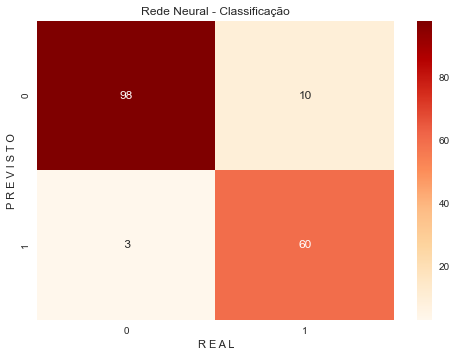

In [42]:
sns.heatmap(confusion_matrix(y_teste, previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Classificação')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Métricas

In [43]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,previsoes)
precisao = precision_score(y_teste,previsoes)
recall = recall_score(y_teste,previsoes)
f1Score = f1_score(y_teste,previsoes)
curva_roc = roc_auc_score(y_teste,previsoes)
kappa = cohen_kappa_score(y_teste,previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(curva_roc,2)}')

Acurácia:0.92
Precisão:0.86
Recall ou Sensibilidade:0.95
F1-Score:0.9
Kappa:0.84
Curva ROC:0.93


### Curva Roc

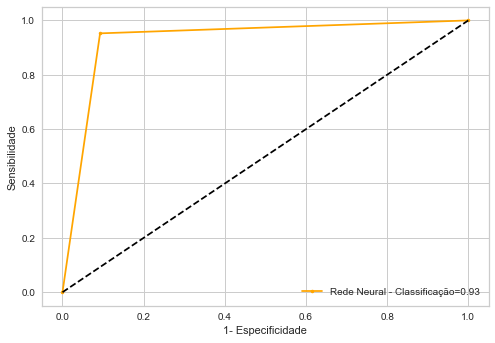

In [44]:
fp,vp,lim1 = roc_curve(y_teste,previsoes)
plt.plot(fp,vp, marker='.', label='Rede Neural - Classificação='+str(round(curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Classificar apenas um registro

In [45]:
import  numpy as np

In [46]:
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = best_model.predict(novo)
previsao = (previsao > 0.5)
print(previsao)

[[ True]]


### Recompilar a rede

O que acontece ao recompilar?
Pesos do modelo permanecem os mesmos:

A recompilação não altera os pesos aprendidos durante o treinamento anterior. Os pesos permanecem como estavam antes da recompilação.
Isso significa que o modelo mantém o que já aprendeu.
Perda e métricas podem ser alteradas:

A função de perda (loss), o otimizador (optimizer) e as métricas (metrics) podem ser redefinidos.
Por exemplo, você pode mudar de binary_crossentropy para outra função de perda ou adicionar métricas extras para avaliar o modelo de forma diferente.
Estado do otimizador é resetado:

Quando você recompila, o otimizador perde seu estado interno, como o momento, as taxas de aprendizagem ajustadas dinamicamente e outras informações acumuladas.
Se você treinar o modelo novamente após recompilar, ele pode não convergir tão bem quanto antes, dependendo do otimizador usado.


In [55]:
#Usando outros parâmetros
classificador.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
resultado = classificador.evaluate(X_treinamento, y_treinamento)
print(resultado)

13/13 [==============================] - 0s 2ms/step - loss: 0.1211 - binary_accuracy: 0.9422
[0.12111751735210419, 0.9422110319137573]


In [56]:
#previsoes em probabilidade
previsoes = classificador.predict(X_teste)
print(previsoes)

[[3.7914813e-03]
 [1.6584128e-02]
 [9.9950069e-01]
 [3.1509101e-03]
 [3.3283520e-01]
 [2.7648419e-02]
 [5.5245531e-01]
 [6.9011450e-03]
 [6.7289174e-03]
 [6.3262880e-03]
 [3.2675922e-02]
 [4.4473916e-02]
 [1.3911697e-01]
 [8.1236154e-02]
 [9.9180317e-01]
 [3.9538145e-03]
 [2.5558412e-02]
 [3.2826185e-02]
 [1.2773514e-02]
 [8.4404933e-01]
 [2.5839835e-02]
 [3.3255517e-03]
 [2.4037361e-03]
 [1.9913405e-02]
 [1.5334725e-02]
 [2.8752112e-01]
 [2.1413267e-03]
 [5.5109084e-02]
 [1.6544849e-01]
 [8.3731592e-02]
 [1.2963533e-02]
 [3.4169853e-03]
 [9.9061340e-01]
 [6.1566114e-01]
 [6.5166950e-03]
 [3.7975192e-02]
 [3.1197786e-02]
 [1.0000000e+00]
 [9.6455216e-04]
 [7.6078475e-03]
 [5.3474218e-02]
 [8.3811176e-01]
 [1.0000000e+00]
 [5.7132244e-03]
 [1.7803168e-01]
 [1.5188217e-02]
 [3.8053095e-03]
 [1.4946163e-03]
 [1.1219144e-02]
 [3.4062266e-03]
 [1.0000000e+00]
 [9.9973261e-01]
 [1.0000000e+00]
 [9.9999213e-01]
 [6.7595631e-02]
 [1.7286447e-01]
 [3.5941005e-03]
 [3.2093668e-01]
 [9.9996561e-0

In [57]:
#Posso fazer as previsões
previsoes = (previsoes > 0.5)
print(previsoes)

[[False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [58]:
matriz = confusion_matrix(y_teste, previsoes)

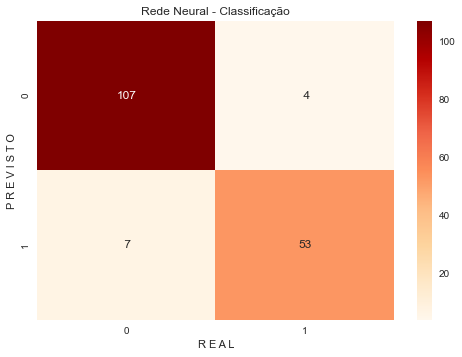

In [59]:
sns.heatmap(confusion_matrix(y_teste, previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Classificação')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Métricas

In [60]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,previsoes)
precisao = precision_score(y_teste,previsoes)
recall = recall_score(y_teste,previsoes)
f1Score = f1_score(y_teste,previsoes)
curva_roc = roc_auc_score(y_teste,previsoes)
kappa = cohen_kappa_score(y_teste,previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(curva_roc,2)}')

Acurácia:0.94
Precisão:0.93
Recall ou Sensibilidade:0.88
F1-Score:0.91
Kappa:0.86
Curva ROC:0.92


### Curva Roc

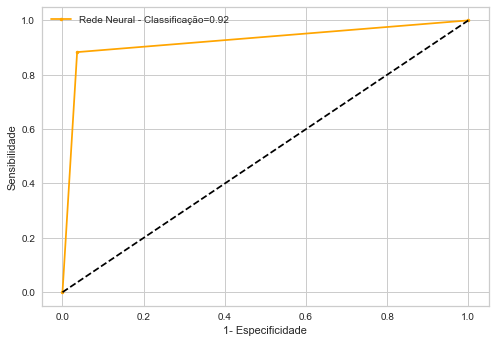

In [61]:
fp,vp,lim1 = roc_curve(y_teste,previsoes)
plt.plot(fp,vp, marker='.', label='Rede Neural - Classificação='+str(round(curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Referências
* Perceptron. Disponível em: https://www.deeplearningbook.com.br/?s=Perceptron. Acesso em 31/10/2022.
* Formação Cientista de Dados com Python e R. Disponível em:< https://www.udemy.com/course/cientista-de-dados/>. Acesso em 01/02/2020;
* Deep Learning com Python de A a Z - O Curso Completo. Disponível em:https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10715306?start=57#overview. Acesso em 31/10/2022.
* UCI - machine learning repositor. Disponível em:https://archive.ics.uci.edu/ml/index.php. Acesso em 31/10/2022.
* Keras. Disponível em: https://keras.io/. Acesso em 31/10/2022.